<a href="https://www.kaggle.com/code/farukal/datathon-altunta-s?scriptVersionId=228887858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎯 GOALS OF THE PROJECT 🎯 #

* Analyzing of 9 datasets from the company E-Corp to get insights about some fixes and upgrades for the customer satisfaction and company's profit policy.
* Recommending some solutions to company by using these insights and some scientific correlations.


----

# ⬇️ IMPORTING SOME LIBRARIES AND BASIC PRELIMINARY ANALYSIS OF 9 DATASETS ⬇️ # 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

## CSAT_Survey_Data ##

✅ This data includes 3 different survey results which are organized at first 3 quarters in 2022.This survey basically talks about customer satisfaction on the platform with different metrics.

In [2]:
Survey = pd.read_csv("/kaggle/input/d/farukal/datathon/CSAT_Survey_Data.csv")
Survey.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   

  Please rate your understanding of our reporting capabilities in the panel  
0  I need someone from Insider team to provide me...                         
1                               I don't use it often                         
2  I need someone from Insider team to provide me...                         
3       I tried but could not find everything I need                         
4  I need someone from Insider team to provide me...

In [3]:
Survey.describe()

Year      Quarter  \
count  1989.0  1989.000000   
mean   2022.0     2.088487   
std       0.0     0.832086   
min    2022.0     1.000000   
25%    2022.0     1.000000   
50%    2022.0     2.000000   
75%    2022.0     3.000000   
max    2022.0     3.000000   

       How likely are you to recommend insider to a friend or colleague   \
count                                        1989.000000                   
mean                                            8.301156                   
std                                             1.634729                   
min                                             0.000000                   
25%                                             8.000000                   
50%                                             8.000000                   
75%                                            10.000000                   
max                                            10.000000                   

       How would you rate the value you gain from our company  \
count                                         1989.00000        
mean                                             4.27099        
std                                              0.77269        
min                                              1.00000        
25%                                              4.00000        
50%                                              4.00000        
75%                                              5.00000        
max                                              5.00000        

       Please rate the overall quality of our products  \
count                                      1989.000000   
mean                                          4.123680   
std                                           0.821484   
min                                           0.000000   
25%                                           4.000000   
50%                                           4.000000   
75%                                           5.000000   
max                                           5.000000   

       Please rate the usability of the panel  
count                             1925.000000  
mean                                 4.036364  
std                                  0.837484  
min                                  1.000000  
25%                                  4.000000  
50%                                  4.000000  
75%                                  5.000000  
max                                  5.000000

## Customer_Age_Data ##

✅This dataset contains information on how long users have been using the platform in months.


In [4]:
Age = pd.read_csv("/kaggle/input/d/farukal/datathon/Customer_Age_Data.csv") 
Age.head()


CRM ID  Customer Age (Months)
0  CRM-1471650                     24
1  CRM-1516050                     13
2  CRM-1087300                     25
3  CRM-1467150                     12
4   CRM-230550                     12

In [5]:
Age.describe()

Customer Age (Months)
count            2651.000000
mean               20.077707
std                16.427542
min                 1.000000
25%                 7.000000
50%                15.000000
75%                27.000000
max                72.000000

## Customer_MRR_Data ##

✅ This dataset contains information about MRR of users in other words the money the users paid monthly to our company.

In [6]:
MRR = pd.read_csv("/kaggle/input/d/farukal/datathon/Customer_MRR_Data.csv")
MRR.head()

Customer ID     MRR
0  CRM-5454800  $8,212
1  CRM-5479950  $2,026
2  CRM-5494800  $2,100
3  CRM-5598450  $2,900
4  CRM-5602550  $1,898

In [7]:
MRR.describe()

Customer ID     MRR
count          1380    1380
unique         1380    1015
top     CRM-5454800  $2,000
freq              1      13

## Customer_Revenue_Data ##

✅ This datasets provides information about the total revenue that users gained from the platform.

In [8]:
Revenue= pd.read_csv("/kaggle/input/d/farukal/datathon/Customer_Revenue_Data.csv")
Revenue.head()

Customer ID Total Revenue
0  CRM-1470950      $732,199
1  CRM-1526100            $0
2  CRM-1506400      $375,135
3  CRM-1430550            $0
4  CRM-1485600      $116,732

In [9]:
Revenue.describe()

Customer ID Total Revenue
count           901           901
unique          901           717
top     CRM-1470950            $0
freq              1           178

## Help_Ticket_Data ##

✅This dataset provides information about number of Help_ticket that users submitted and their lead time to get a solution.

In [10]:
Help_Ticket = pd.read_csv("/kaggle/input/d/farukal/datathon/Help_Ticket_Data.csv")
Help_Ticket.head()

Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
0  CRM-1516050                  9                            418
1  CRM-1467150                  8                            382
2  CRM-1470950                 30                            366
3  CRM-1526100                  4                           1206
4  CRM-1506400                 22                            484

In [11]:
Help_Ticket.describe()

Help Ticket Count  Help Ticket Lead Time (hours)
count        1367.000000                    1367.000000
mean           17.397952                     786.302853
std            25.354291                     672.856978
min             1.000000                       0.000000
25%             3.000000                     387.500000
50%             9.000000                     603.000000
75%            22.000000                     976.000000
max           443.000000                   11632.000000

## Newsletter_Interaction_Data ##

✅This dataset includes number of Newsletter interaction with the customers !

In [12]:
Newsletter = pd.read_csv("/kaggle/input/d/farukal/datathon/Newsletter_Interaction_Data.csv")
Newsletter.head()

Customer ID  Company Newsletter Interaction Count
0   CRM-160150                                    54
1   CRM-166800                                    27
2   CRM-927200                                    24
3  CRM-1526050                                    23
4  CRM-1489600                                    20

In [13]:
Newsletter.describe()

Company Newsletter Interaction Count
count                            251.000000
mean                               4.414343
std                                5.374350
min                                1.000000
25%                                2.000000
50%                                3.000000
75%                                5.000000
max                               54.000000

## Product_Bug_Task_Data ##

✅This dataset includes the number of bugs that customers face when using our platform.

In [14]:
Bug = pd.read_csv("/kaggle/input/d/farukal/datathon/Product_Bug_Task_Data.csv")
Bug.head()

Customer ID  Product Bug Task Count
0  CRM-1526150                     179
1  CRM-1477300                     150
2  CRM-1450300                      66
3   CRM-661350                     116
4  CRM-1435450                     106

In [15]:
Bug.describe()

Product Bug Task Count
count             1989.000000
mean               141.328306
std                 40.094410
min                  5.000000
25%                113.000000
50%                150.000000
75%                174.000000
max                200.000000

## RegionAndVertical_Data ##

✅This dataset includes,regions of our customers and also their verticals and subverticals.

In [16]:
RegionVertical = pd.read_csv("/kaggle/input/d/farukal/datathon/RegionAndVertical_Data.csv")
RegionVertical.head()

Customer ID     Region                      Vertical  \
0  CRM-1471650   Malaysia          Media and Publishing   
1  CRM-1516050     Taiwan                        Retail   
2  CRM-1087300  Australia  Transportation and Logistics   
3  CRM-1467150     Taiwan                        Retail   
4   CRM-230550     Turkey                        Retail   

                    Subvertical  
0              Content Websites  
1              Fashion Retailer  
2  Transportation and Logistics  
3                   Marketplace  
4              Fashion Retailer

In [17]:
RegionVertical.describe()

Customer ID  Region Vertical       Subvertical
count          2651    2654     2585              2549
unique         2651      23       22                50
top     CRM-1471650  Turkey   Retail  Fashion Retailer
freq              1     670     1510               407

## StatusAndLevel_Data ##

✅This data contains information about the customer's Status and their level on the platform.

In [18]:
StatusLevel = pd.read_csv("/kaggle/input/d/farukal/datathon/StatusAndLevel_Data.csv")
StatusLevel.head()

Customer ID      Status   Customer Level
0  CRM-1471650  Onboarding       Enterprise
1  CRM-1516050  Onboarding        Long-tail
2  CRM-1087300       Churn  Semi-Enterprise
3  CRM-1467150       Churn  Semi-Enterprise
4   CRM-230550       Churn        Long-tail

In [19]:
StatusLevel.describe()

Customer ID Status Customer Level
count          2651   2655           2654
unique         2651      7              3
top     CRM-1471650  Churn     Enterprise
freq              1   1215           1075

----

# 🧹 STARTING TO CLEANING DATA 🧹 #

* Finding the number of missing values and find their proportion to entire datasets.
* If their proportion is very low we can easily delete them because they are not effective in our analysis.
* Else if their proportion is too substential to disregard we will try some different method to fill them.


In [20]:
Survey.isnull().sum()

Customer ID                                                                   0
Year                                                                          0
Quarter                                                                       0
Survey Date                                                                   0
Response Date                                                                 0
How likely are you to recommend insider to a friend or colleague              0
How would you rate the value you gain from our company                        0
How frequently are you using our platform                                     3
Please rate the overall quality of our products                               0
Please rate the usability of the panel                                       64
Please rate your understanding of our reporting capabilities in the panel     0
dtype: int64

In [21]:
Survey.shape

(1989, 11)

$$ 64/1989 = 0.032 $$
Since 0.032 is very low proportion to consider, we deleted 3 row due to 8th column's missing values and 64 row due to 10th columns's missing values.Moreover to be clear, we plotted the missing values in each column by using the library "missingno",and as you can see missing values proportion is too low to consider the,so we can easily delete them.

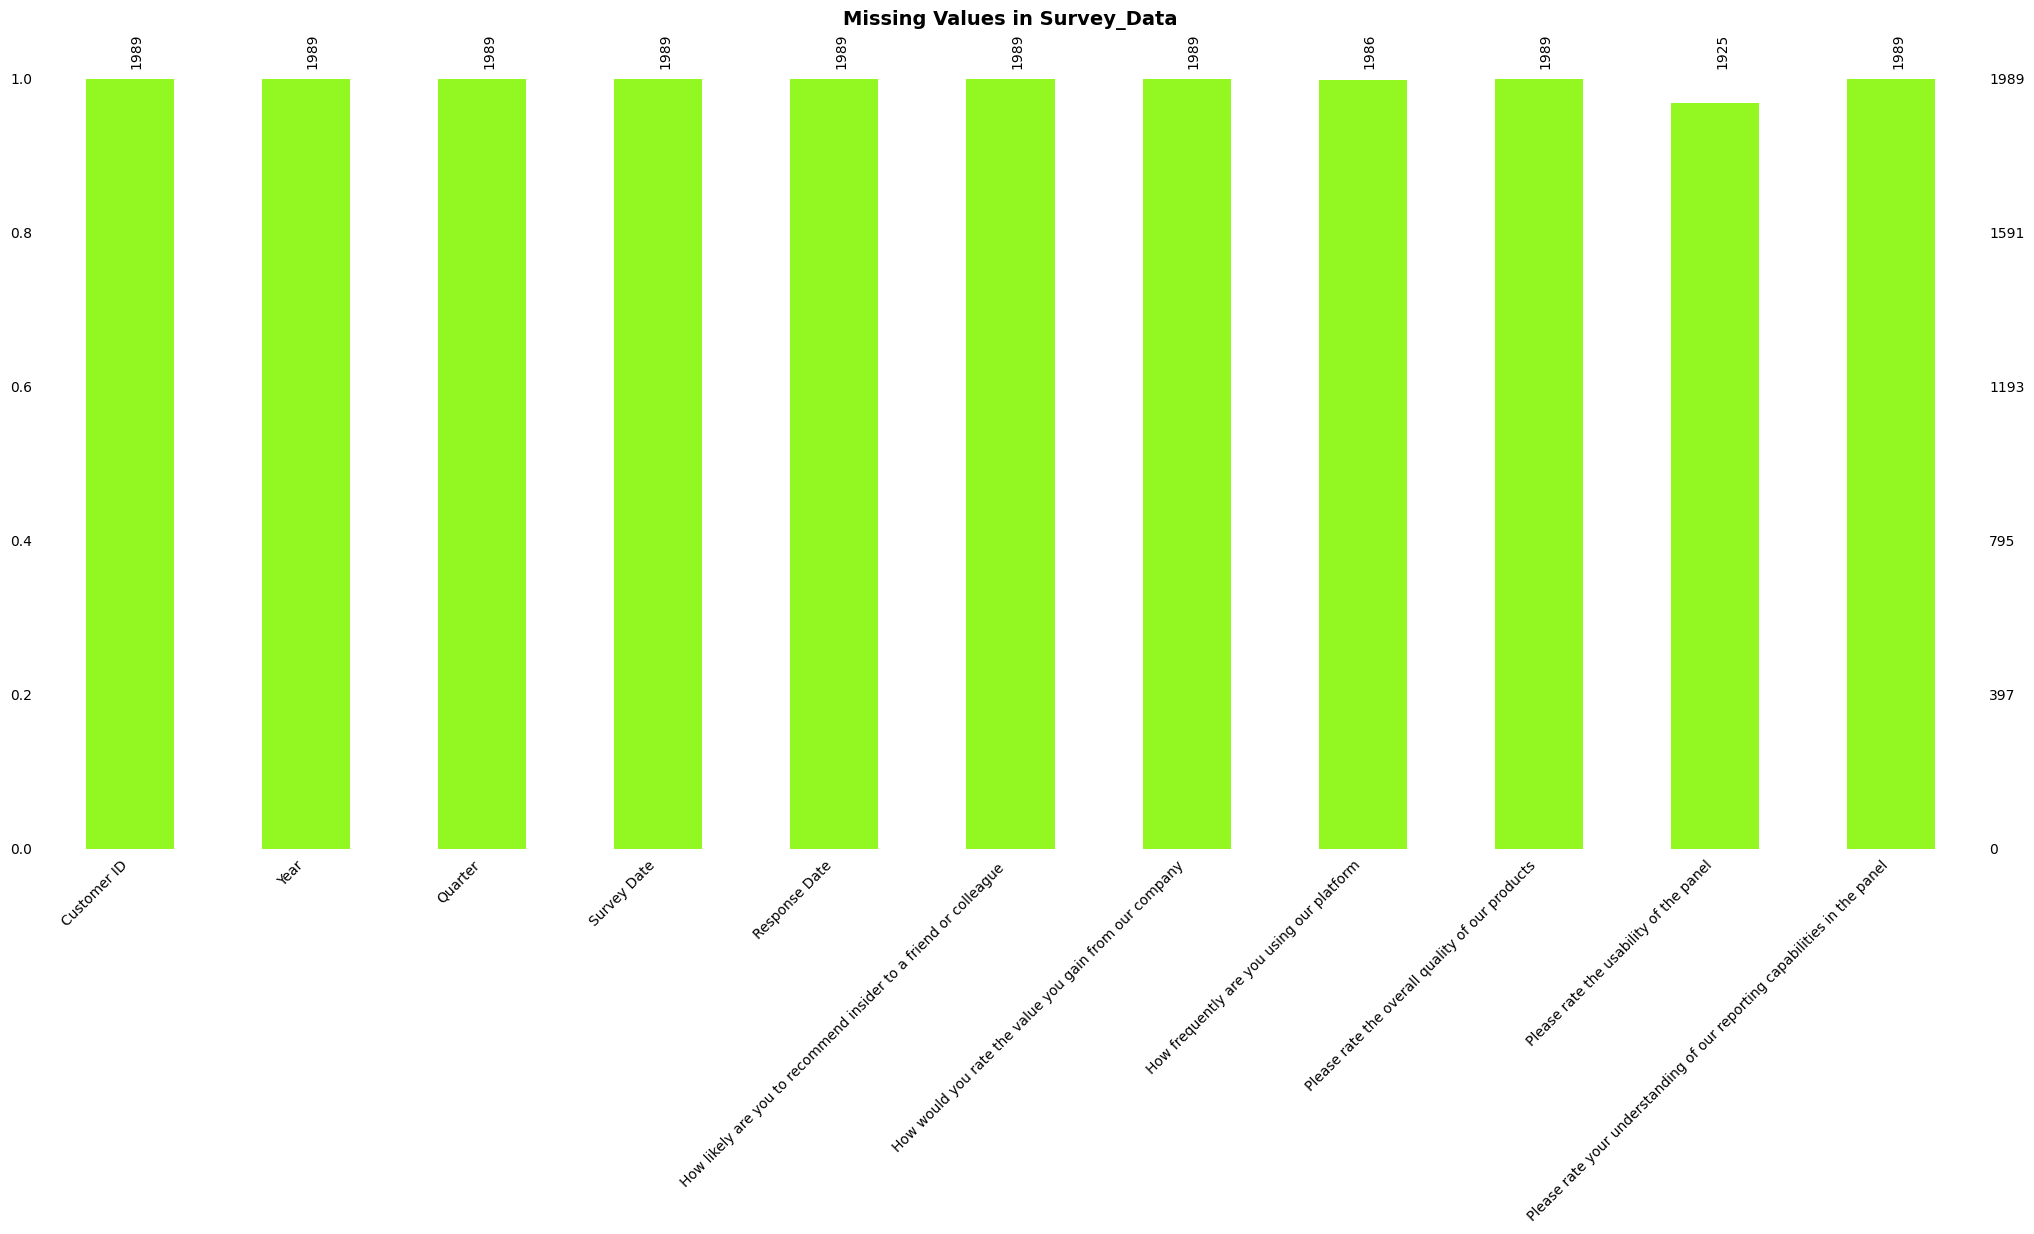

In [22]:
plt.figure(figsize=(10, 6))
msno.bar(Survey, color="#93f722", fontsize=10)

plt.xticks(rotation=90, fontsize=10)
plt.title("Missing Values in Survey_Data", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [23]:
Survey = Survey.dropna()
Survey.isnull().sum()

Customer ID                                                                  0
Year                                                                         0
Quarter                                                                      0
Survey Date                                                                  0
Response Date                                                                0
How likely are you to recommend insider to a friend or colleague             0
How would you rate the value you gain from our company                       0
How frequently are you using our platform                                    0
Please rate the overall quality of our products                              0
Please rate the usability of the panel                                       0
Please rate your understanding of our reporting capabilities in the panel    0
dtype: int64

In [24]:
Age.isnull().sum()

CRM ID                   0
Customer Age (Months)    0
dtype: int64

In [25]:
MRR.isnull().sum()

Customer ID    0
MRR            0
dtype: int64

In [26]:
Revenue.isnull().sum()

Customer ID      0
Total Revenue    0
dtype: int64

In [27]:
Help_Ticket.isnull().sum()

Customer ID                      0
Help Ticket Count                0
Help Ticket Lead Time (hours)    0
dtype: int64

In [28]:
Newsletter.isnull().sum()

Customer ID                             0
Company Newsletter Interaction Count    0
dtype: int64

In [29]:
Bug.isnull().sum()

Customer ID               0
Product Bug Task Count    0
dtype: int64

In [30]:
RegionVertical.isnull().sum()

Customer ID      4
Region           1
Vertical        70
Subvertical    106
dtype: int64

In [31]:
RegionVertical.shape

(2655, 4)

✅ We should plot these missing values to be sure about their importance for the entire dataset.

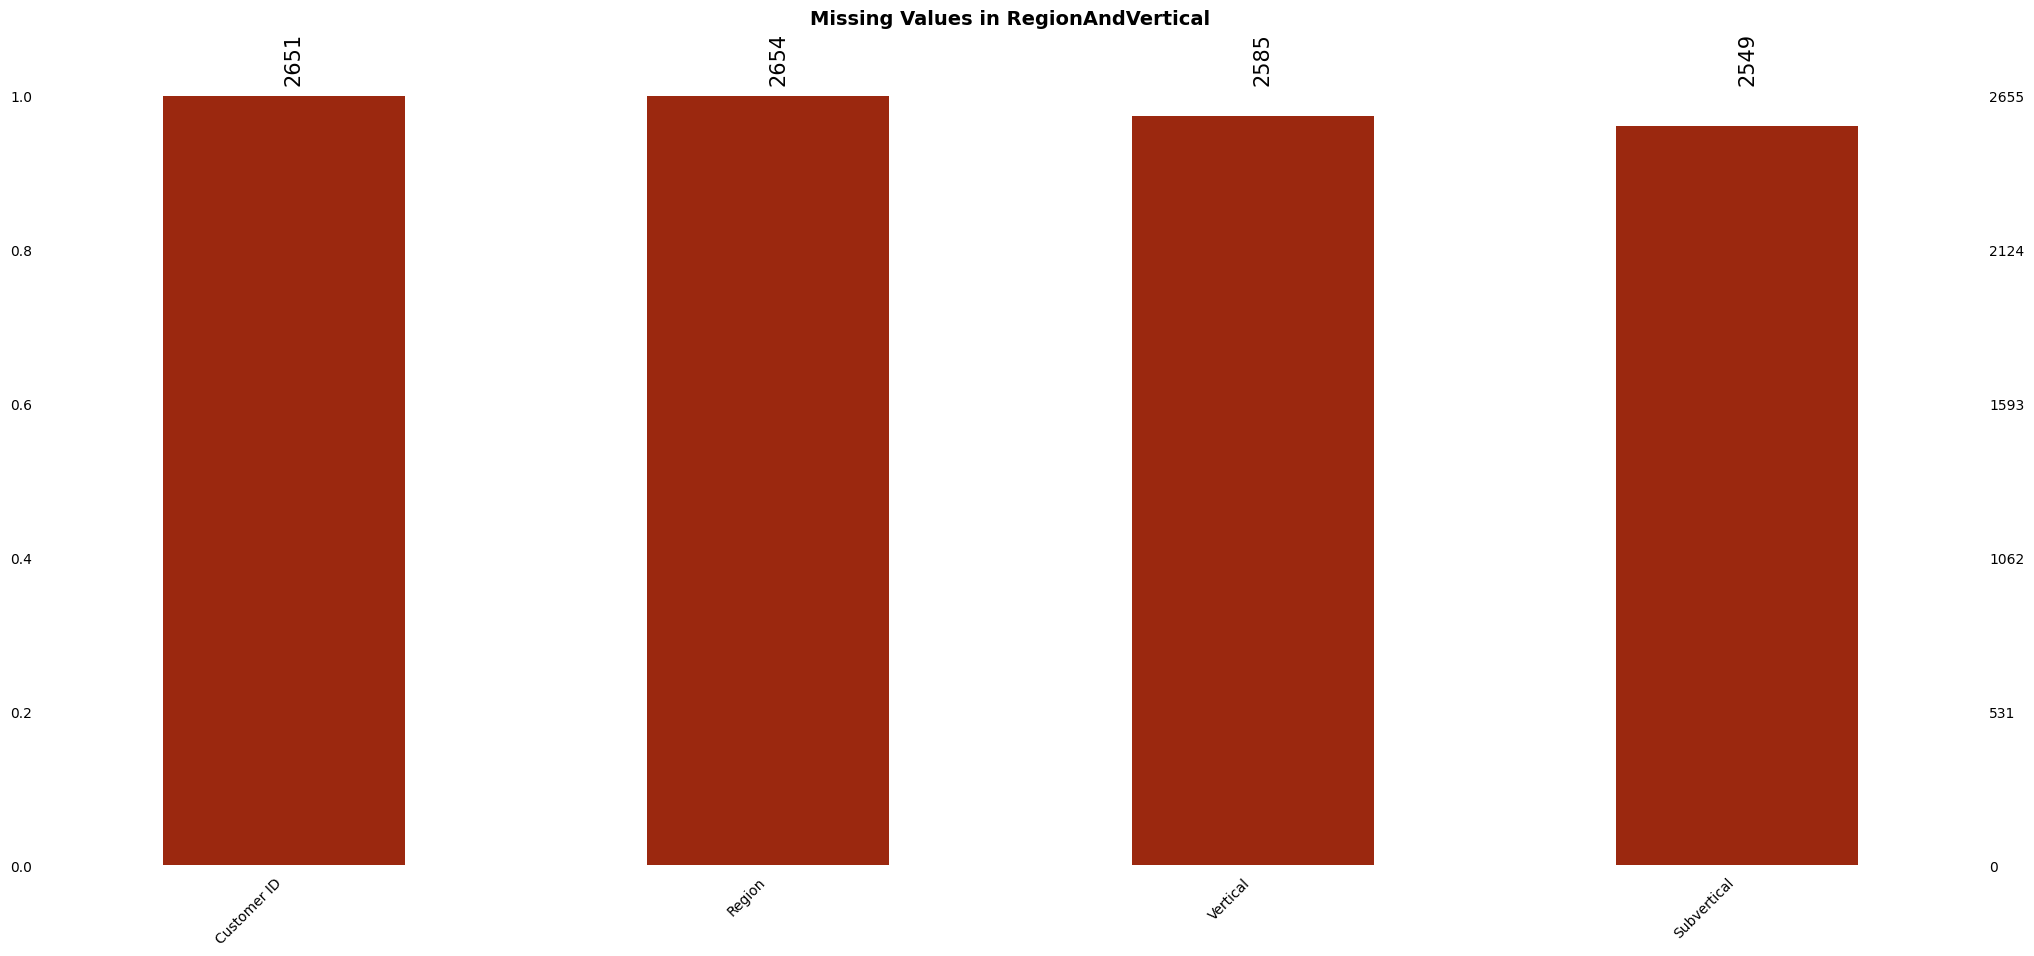

In [32]:
plt.figure(figsize=(12, 6))
msno.bar(RegionVertical, color="#9b280f", fontsize=10)

plt.xticks(rotation=90, fontsize=15)
plt.title("Missing Values in RegionAndVertical", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

✅ As you can see the missing values is too low to consider them so we should delete them.

In [33]:
RegionVertical = RegionVertical.dropna()
RegionVertical.isna().sum()

Customer ID    0
Region         0
Vertical       0
Subvertical    0
dtype: int64

In [34]:
StatusLevel.isna().sum()

Customer ID       4
Status            0
Customer Level    1
dtype: int64

In [35]:
StatusLevel.shape

(2655, 3)

$$ 4/2655 = 0.0015 $$
Since this proportion is too low we must delete them also these missing values are customer id which is our identifier data.Therefore we should delete these missing values.

In [36]:
StatusLevel = StatusLevel.dropna()
StatusLevel.isna().sum()

Customer ID       0
Status            0
Customer Level    0
dtype: int64

## Conclusion ##

* We detected missing values in CSAT_Survey_Data,RegionAndVertical_Data and StatusAndLevel_Data.
* We plotted first two to better understanding that these missing values are too low to consider about them or fill them with some theorotical values.
* We didn't plot 3rd one because its proportion is already less than first two which are showed by graphs ,so we deleted 3rd one directly.
* Now we have more clean datasets to analyze.

-----

# 👥 CHECKING DUPLICATE ROWS 👥 #

✅ We need to check if there is any duplicate rows on any of the datasets and delete them.

In [37]:
Survey.duplicated().sum()

7

In [38]:
Survey[Survey.duplicated(keep = False)]

Customer ID  Year  Quarter Survey Date Response Date  \
22     CRM-154400  2022        1  2022-01-01    2022-03-30   
23     CRM-154400  2022        1  2022-01-01    2022-03-30   
361    CRM-153300  2022        3  2022-07-01    2022-08-18   
363    CRM-153300  2022        3  2022-07-01    2022-08-18   
658    CRM-439300  2022        1  2022-01-01    2022-03-21   
660    CRM-439300  2022        1  2022-01-01    2022-03-21   
1346   CRM-166300  2022        3  2022-07-01    2022-08-11   
1351   CRM-166300  2022        3  2022-07-01    2022-08-11   
1606   CRM-157700  2022        1  2022-01-01    2022-03-30   
1609   CRM-157700  2022        1  2022-01-01    2022-03-30   
1703   CRM-153600  2022        2  2022-04-01    2022-06-16   
1705   CRM-153600  2022        2  2022-04-01    2022-06-16   
1866  CRM-1242200  2022        2  2022-04-01    2022-05-18   
1869  CRM-1242200  2022        2  2022-04-01    2022-05-18   

      How likely are you to recommend insider to a friend or colleague   \
22                                                    9                   
23                                                    9                   
361                                                  10                   
363                                                  10                   
658                                                   9                   
660                                                   9                   
1346                                                 10                   
1351                                                 10                   
1606                                                  8                   
1609                                                  8                   
1703                                                 10                   
1705                                                 10                   
1866                                                 10                   
1869                                                 10                   

      How would you rate the value you gain from our company  \
22                                                    5        
23                                                    5        
361                                                   5        
363                                                   5        
658                                                   4        
660                                                   4        
1346                                                  5        
1351                                                  5        
1606                                                  4        
1609                                                  4        
1703                                                  5        
1705                                                  5        
1866                                                  5        
1869                                                  5        

     How frequently are you using our platform  \
22                                  Once a Day   
23                                  Once a Day   
361                                 Once a Day   
363                                 Once a Day   
658                                 Once a Day   
660                                 Once a Day   
1346                                Once a Day   
1351                                Once a Day   
1606                               Once a Week   
1609                               Once a Week   
1703                                Once a Day   
1705                                Once a Day   
1866                                Once a Day   
1869                                Once a Day   

      Please rate the overall quality of our products  \
22                                                  5   
23                                                  5   
361                                                 5   
363      

In [39]:
Survey = Survey.drop_duplicates()
Survey.duplicated().sum()

0

✅ We deleted 7 duplicate rows from the Survey_data list.

In [40]:
Age.duplicated().sum()

0

In [41]:
MRR.duplicated().sum()

0

In [42]:
Revenue.duplicated().sum()

0

In [43]:
Help_Ticket.duplicated().sum()

0

In [44]:
Newsletter.duplicated().sum()

0

In [45]:
Bug.duplicated().sum()

35

In [46]:
Bug[Bug.duplicated(keep=False)]

Customer ID  Product Bug Task Count
24     CRM-153300                     123
40    CRM-1477000                     165
45    CRM-1482200                     130
63    CRM-1317050                     156
80    CRM-1473700                     180
...           ...                     ...
1766  CRM-1461950                     135
1888  CRM-1444350                     193
1918   CRM-156100                      61
1927   CRM-156650                     181
1972  CRM-1482250                     172

[69 rows x 2 columns]

In [47]:
Bug = Bug.drop_duplicates() 
Bug.duplicated().sum()

0

✅ We deleted 35 duplicate rows from the dataset Product_Bug_Task

In [48]:
RegionVertical.duplicated().sum()

0

In [49]:
StatusLevel.duplicated().sum()

0

## Conclusion ##

* There were 7 duplicate rows in CSAT_Survey_Data and 35 duplicated rows in Product_Bug_Task.
* These rows could have lead to misunderstandings in our analysis.
* Therefore we deleted them.
* **Now our analysis will be more trustable.**


----

# 🧼🫧 OTHER THINGS THAT WE CONSIDER ABOUT CLEANING DATA 🧼🫧 #

* Format consistency.
* Handling Outliers.
* Inconsistency between the same users but different dataset.
* Datasets' with including rating system problems.

## Format Consistency ##

We noticed that some of the datasets formats are wrong (they should be numeric to make mathamatical calculations, but they are object type):
 * MRR
 * Total Revenue

Moreover, Response Date and Survey Date should has datetime data type ,but it has object data type.

In [50]:
print(MRR["MRR"].dtypes)

object


✅ Therefore we should convert it to numeric value by using pd.to_numeric.

In [51]:
MRR["MRR"] = MRR["MRR"].replace('[\$,]', '', regex=True) 
MRR["MRR"] = MRR["MRR"].astype(float)
print(MRR["MRR"].dtypes)

float64


In [52]:
print(Revenue["Total Revenue"].dtypes)

object


In [53]:
Revenue["Total Revenue"] = Revenue["Total Revenue"].replace('[\$,]', '', regex=True) 
Revenue["Total Revenue"] = Revenue["Total Revenue"].astype(float)
print(MRR["MRR"].dtypes)

float64


In [54]:
Survey["Response Date"] = pd.to_datetime(Survey["Response Date"])
Survey["Survey Date"] = pd.to_datetime(Survey["Survey Date"])

In [55]:
print(Survey["Response Date"].dtypes)

datetime64[ns]


In [56]:
print(Survey["Survey Date"].dtypes)

datetime64[ns]


## Warnings ##

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

✅ We add this code to avoid some future coding problems.

## Handling Outliers ##

✅ In this part we should analyze datasets part by part and visualize them as a scatter plot to detect outliers better.

### AGE: ###

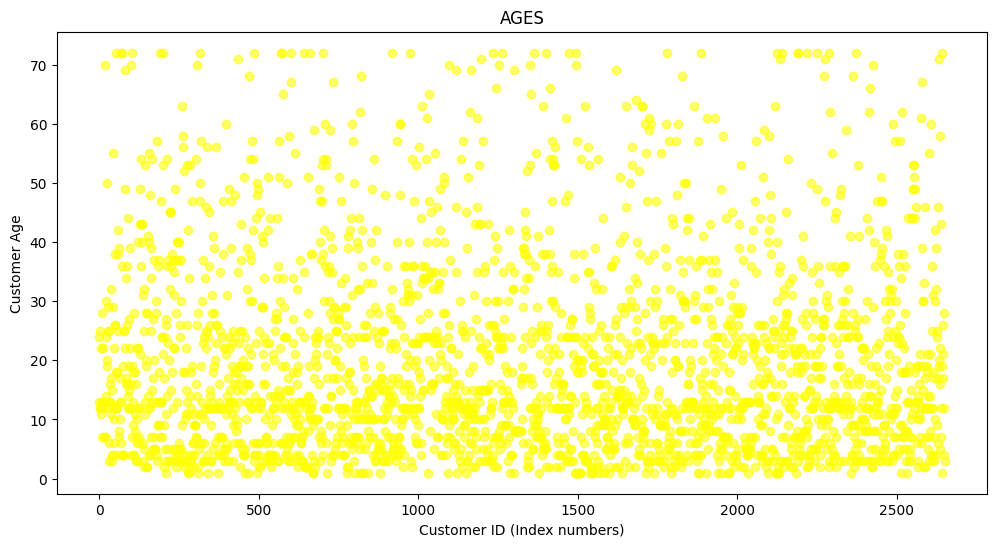

In [58]:
plt.figure(figsize = (12,6))
plt.scatter(range(len(Age["CRM ID"])),Age["Customer Age (Months)"],color ="yellow",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("Customer Age")
plt.title("AGES")
plt.show()

✅ As you can see there is no any outliers in this dataset their distribution is as a whole make a sense.

### MRR: ###

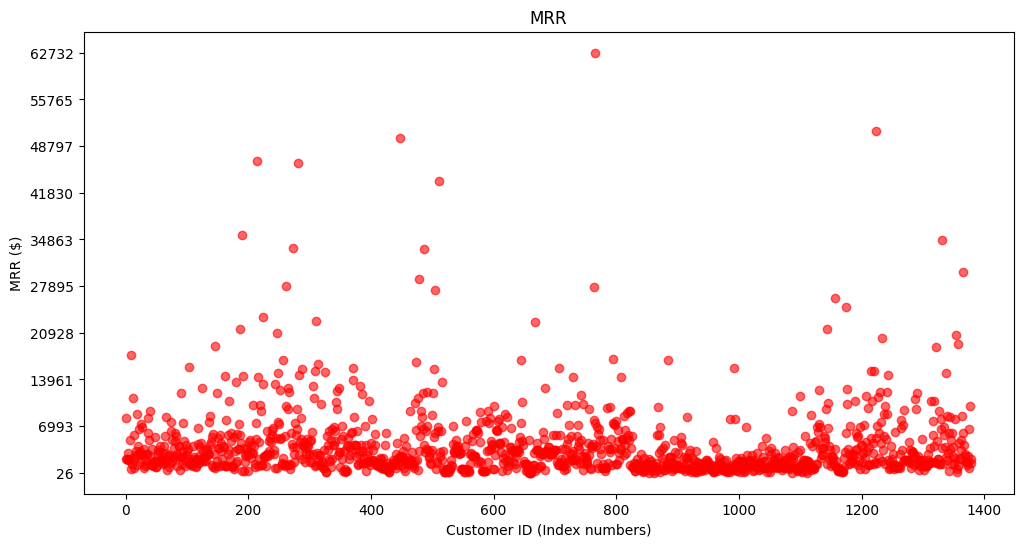

In [59]:
plt.figure(figsize = (12,6))
plt.scatter(range(len(MRR["Customer ID"])),MRR["MRR"],color ="red",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("MRR ($)")
plt.title("MRR")
y_min = MRR["MRR"].min()
y_max = MRR["MRR"].max()
plt.yticks(np.linspace(y_min, y_max, num=10)) 
plt.show()

✅ As you can see in the graph there are some outliers in this dataset because generally people pay bills monthly to company in a range$ 26\$ - 7000\$ ,$but there are some customers whose MRR are 62732\$,48768\$,41380$ and we should consider about these outliers to make more general analysis which is useful for the company's politics.

### TOTAL REVENUE: ###

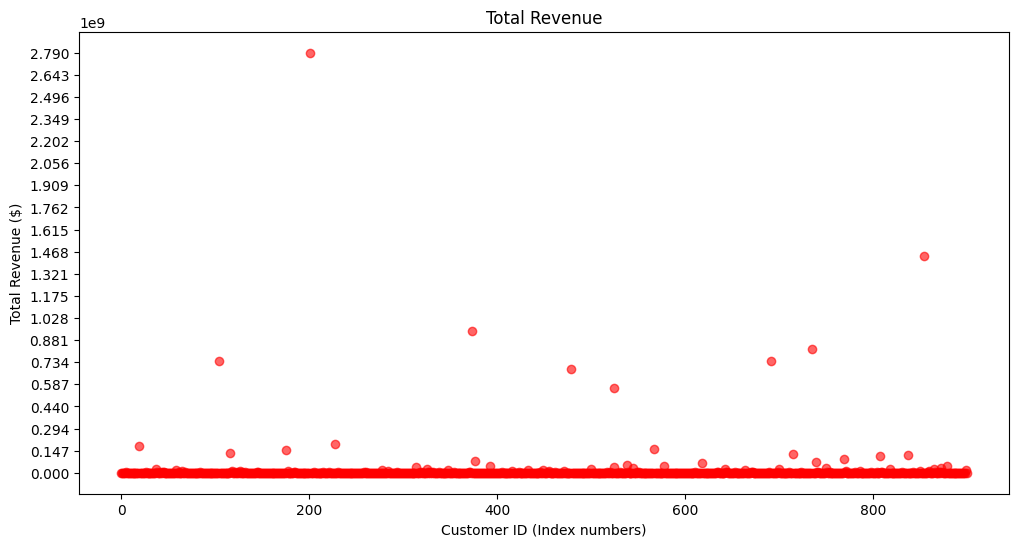

In [60]:
plt.figure(figsize = (12,6))
plt.scatter(range(len(Revenue["Customer ID"])),Revenue["Total Revenue"],color ="red",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue")
y_min =  Revenue["Total Revenue"].min()
y_max = Revenue["Total Revenue"].max()
plt.yticks(np.linspace(y_min, y_max, num=20)) 
plt.show()

✅ As you can easily see in the graph one point is obvious an outlier and we can delete them other than that, we should consider about 7 points as a outliers.

### REST OF NUMERIC DATAS: ###

Text(0.5, 1.0, 'Help Ticket Lead Time distribution')

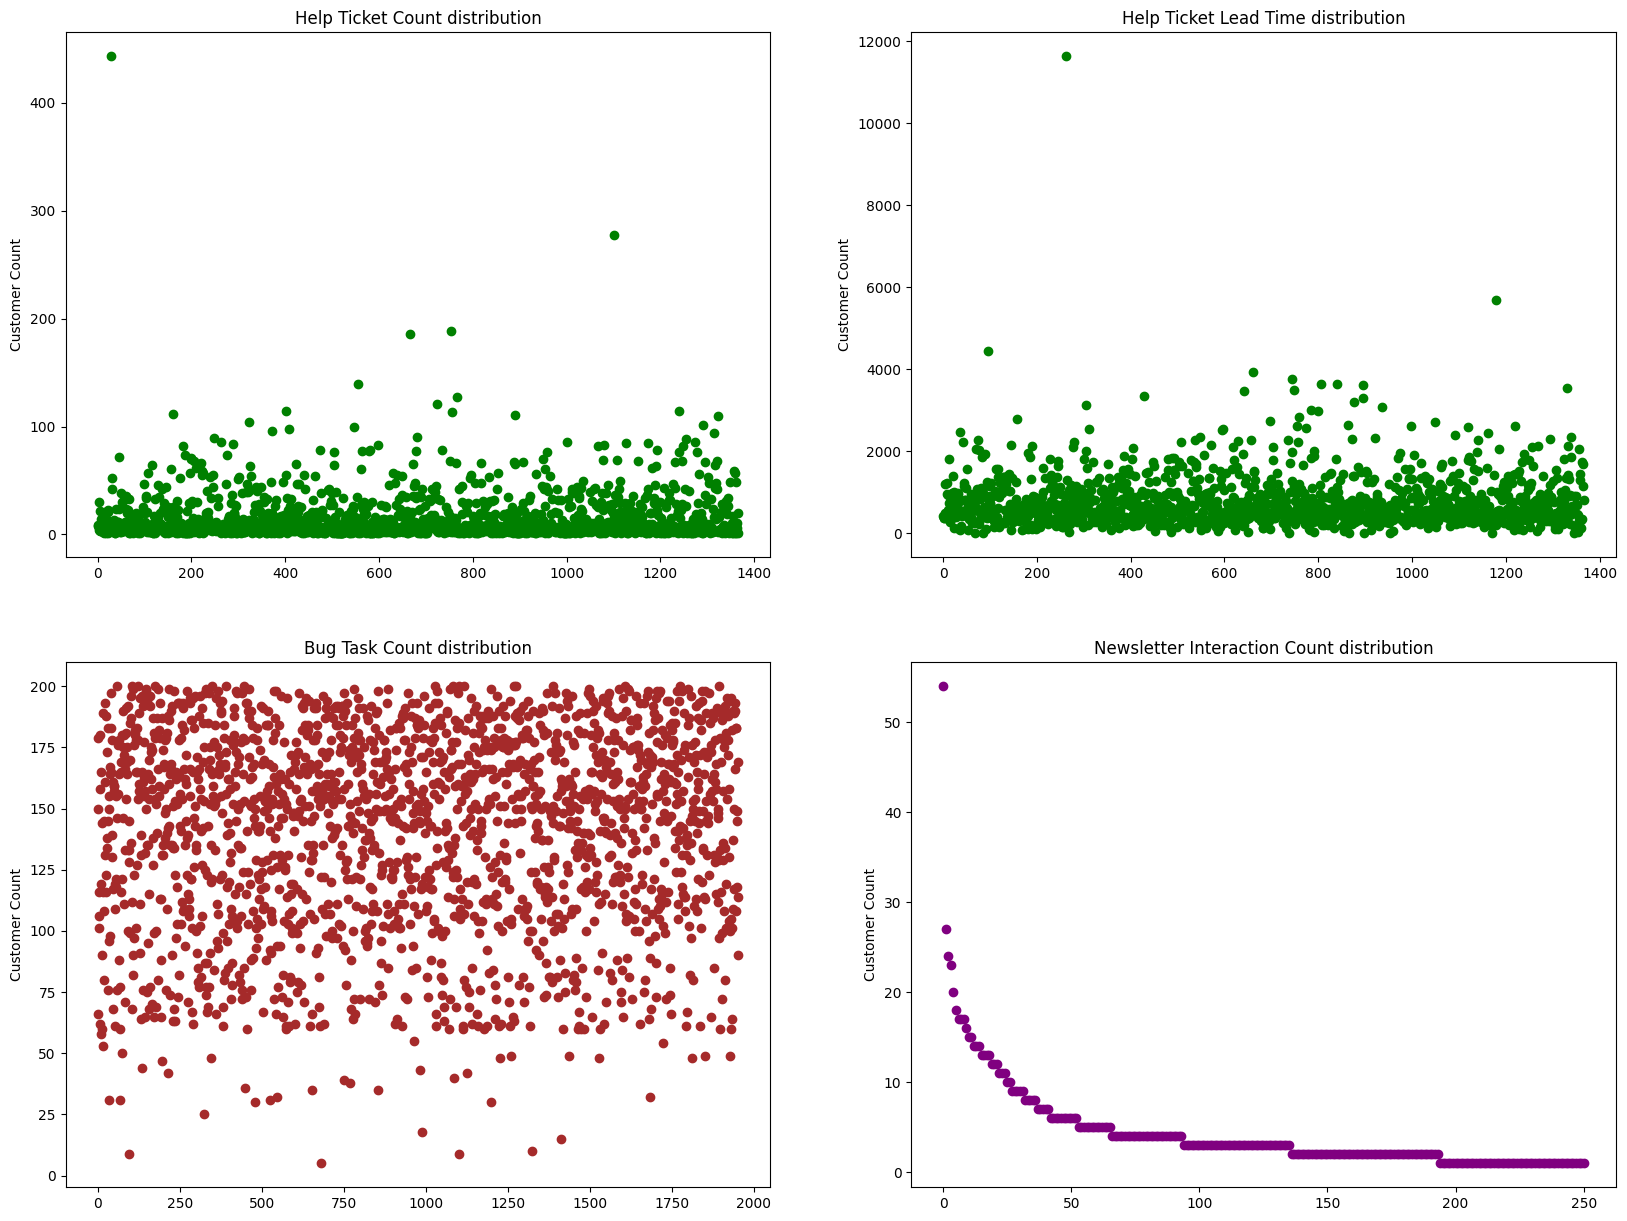

In [61]:
fig,axes = plt.subplots(2,2,figsize = (20,15))
axes[0,0].scatter(range(len(Help_Ticket["Customer ID"])),Help_Ticket["Help Ticket Count"],color = "green")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Help Ticket Count distribution")

axes[1,1].scatter(range(len(Newsletter["Customer ID"])),Newsletter["Company Newsletter Interaction Count"],color = "purple" )
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Newsletter Interaction Count distribution")

axes[1,0].scatter(range(len(Bug["Customer ID"])),Bug["Product Bug Task Count"],color = "brown")
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Bug Task Count distribution")

axes[0,1].scatter(range(len(Help_Ticket["Customer ID"])),Help_Ticket["Help Ticket Lead Time (hours)"],color = "green")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Help Ticket Lead Time distribution")

**Key Findings:**

* Help Ticket Count distribution graph has 2 two outliers (one is obvious) and when analyzing we should reconsider about two of them and their reasons.
* Help Ticket Lead Time is actually similar to Help ticket Count graph in terms of outliers ,but in Lead Time the graph has just one outlier unlike the Count graph.
* Bug Task Count Disrtibution distributed very properly and there is no any value that we can easily say it is outliers.
* Newsletter Interaction Count distribution graph has only one outliers and it is so obvious we should consider about it.

## Not Trustable Survey Answers From Some Of The Customer Due To Their Inconsistency ##

Some of the customers answer the question "Please rate your understanding of our reporting capabilities in the panel" as I don't use it often but on the other side in database Help_Ticket_data they sent many of Help ticket to the panel,you can see some of them below.

In [62]:
notoftencus = Survey[Survey["Please rate your understanding of our reporting capabilities in the panel"] == "I don't use it often"]
notoftencus = notoftencus[["Customer ID"]]
incons = notoftencus.merge(Help_Ticket,on = "Customer ID",how = 'left')
gt100 = incons[incons["Help Ticket Count"]>100]
print(gt100)

     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
10    CRM-150500              443.0                          844.0
11    CRM-150500              443.0                          844.0
208   CRM-161600              277.0                         1470.0
209   CRM-161600              277.0                         1470.0
253  CRM-1459100              114.0                          694.0
254  CRM-1459100              114.0                          694.0
258  CRM-1453900              101.0                          576.0
259  CRM-1453900              101.0                          576.0
260  CRM-1453900              101.0                          576.0
261  CRM-1453900              101.0                          576.0


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


✅ As you can see they submitted at least ticket to report panel which is not a low number, but they said that they didn't use panel often.We should disregard of these people answers to this question because their answer is not consistent with the reality.

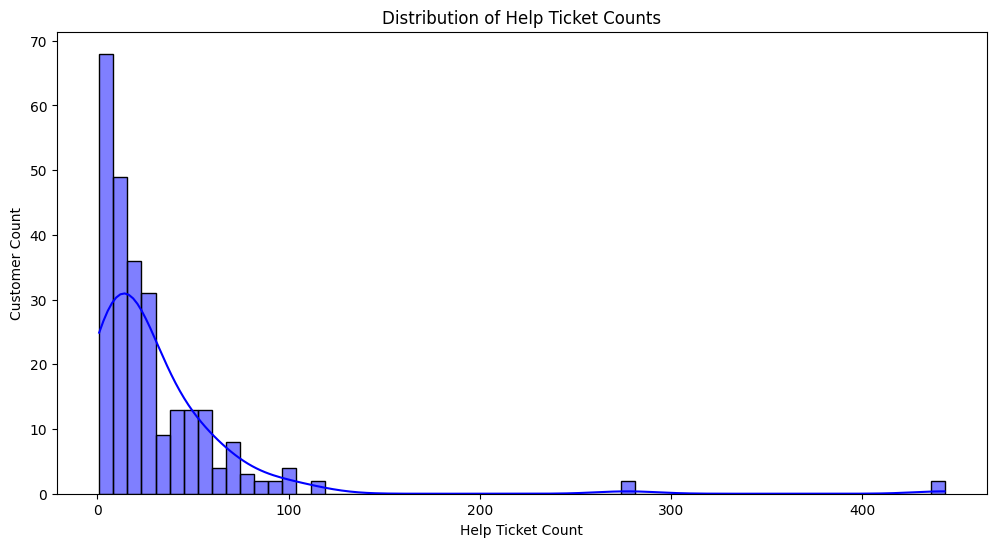

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(incons["Help Ticket Count"], bins=60, kde=True, color="blue")

plt.xlabel("Help Ticket Count")
plt.ylabel("Customer Count")
plt.title("Distribution of Help Ticket Counts")

plt.show()

✅ And even though most of the people which said "I don't use panel often" is consistent with them some of them ,and this amount is not enough low to ignore as you can see in the histogram graph, contradicts with theirselves ,so we should identify a limit number to extract people from this question.And this limit number can be calculated with some basic calculation this survey covers 3 quarters which is almost equal to 39 week and if we accept submitting once a week is a limit to sentence "I don't use it often" we can say this limit should be 39 and plot the graph now.

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


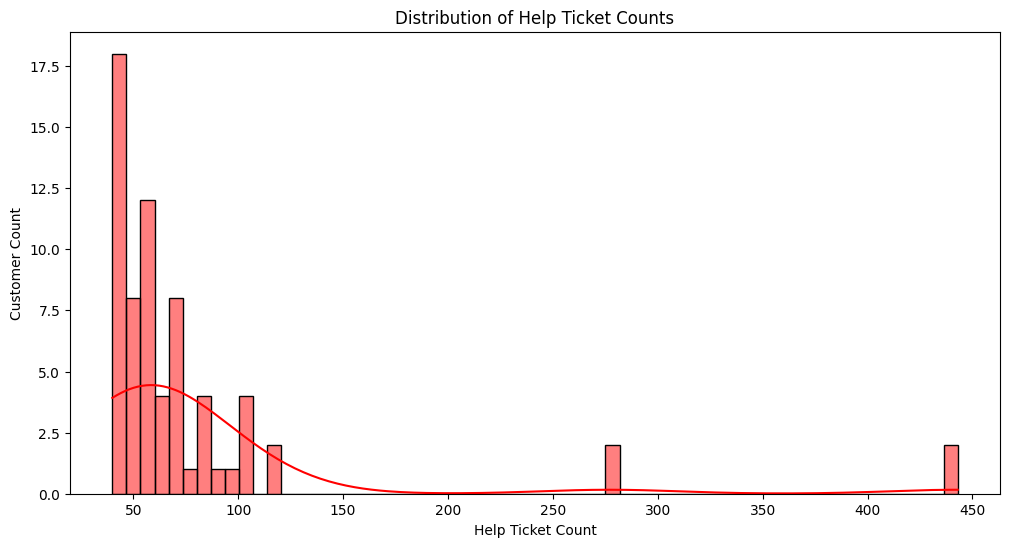

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(incons[incons["Help Ticket Count"]>39]["Help Ticket Count"], bins=60, kde=True, color="red")

plt.xlabel("Help Ticket Count")
plt.ylabel("Customer Count")
plt.title("Distribution of Help Ticket Counts")

plt.show()

✅ Therefore these amount of people for especially the outliers should be disregarded from the question results.

----

# 🔍 EXPLORATARY DATA ANALYSIS (EDA) 🔍 #

We will start our analysis dividing 3 main part:

* Introduction to our datasets with histogram and pie graphs to see some features' groups count around different parameters.
* We will analyze basic correlation between some parameters in our datasets ,and plot them as a whole.
* We will analyze datasets by dividing 3 quarter and see whether there is any difference between Quarters.

## Basic Feature Analysis by Using Histogram

### Rating Features' Analysis By Using Histogram ###

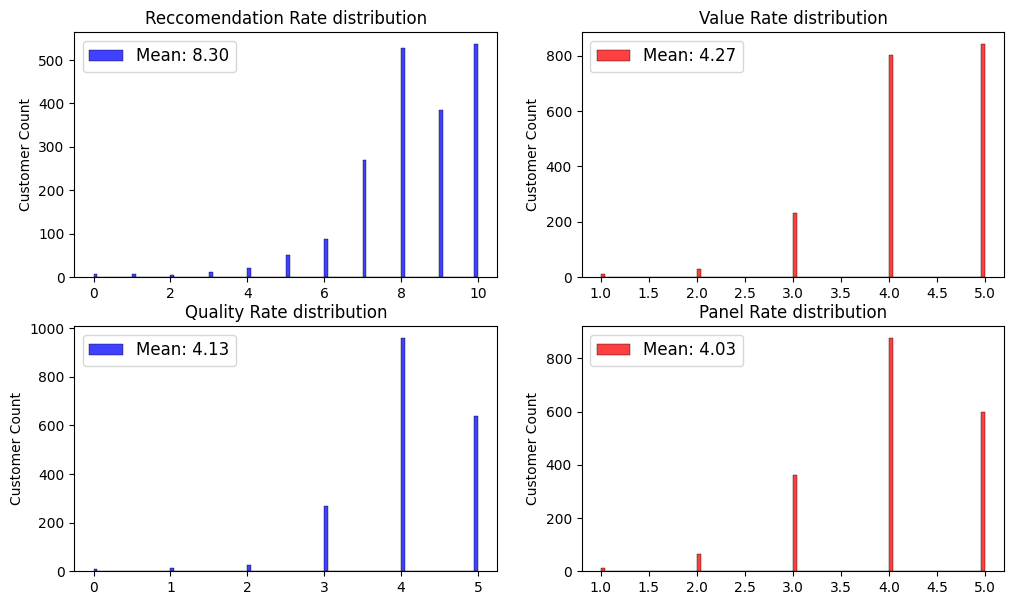

In [65]:
fig,axes = plt.subplots(2,2,figsize = (12,7))
sns.histplot(Survey["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Reccomendation Rate distribution")
mean_value1 = Survey["How likely are you to recommend insider to a friend or colleague "].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)


sns.histplot(Survey["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Value Rate distribution")
mean_value2 = Survey["How would you rate the value you gain from our company"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(Survey["Please rate the overall quality of our products"], bins=100, kde=False, color="blue",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Quality Rate distribution")
mean_value3 = Survey["Please rate the overall quality of our products"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(Survey["Please rate the usability of the panel"], bins=100, kde=False, color="red",ax = axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Panel Rate distribution")
mean_value4 = Survey["Please rate the usability of the panel"].mean()
axes[1,1].legend([f"Mean: {mean_value4:.2f}"], loc="upper left", fontsize=12, frameon=True)

plt.show()

**What we observed and our insights:**
* 🚀 This company has really good points in terms of mean for especially the rate of reccomendation and value that customers gained is really nice.
* 🤔 There are some issues on Panel Rate distribution by looking at the difference between this parameter and others
* 😶‍🌫️ Panel Rate is also high point but it's reason may be that the overall quality of company masks some problems ,in other words, other since other parameters are really high,people are tend to be more positive about the overall company even though there may be some problems.

### Other Survey's Data ###

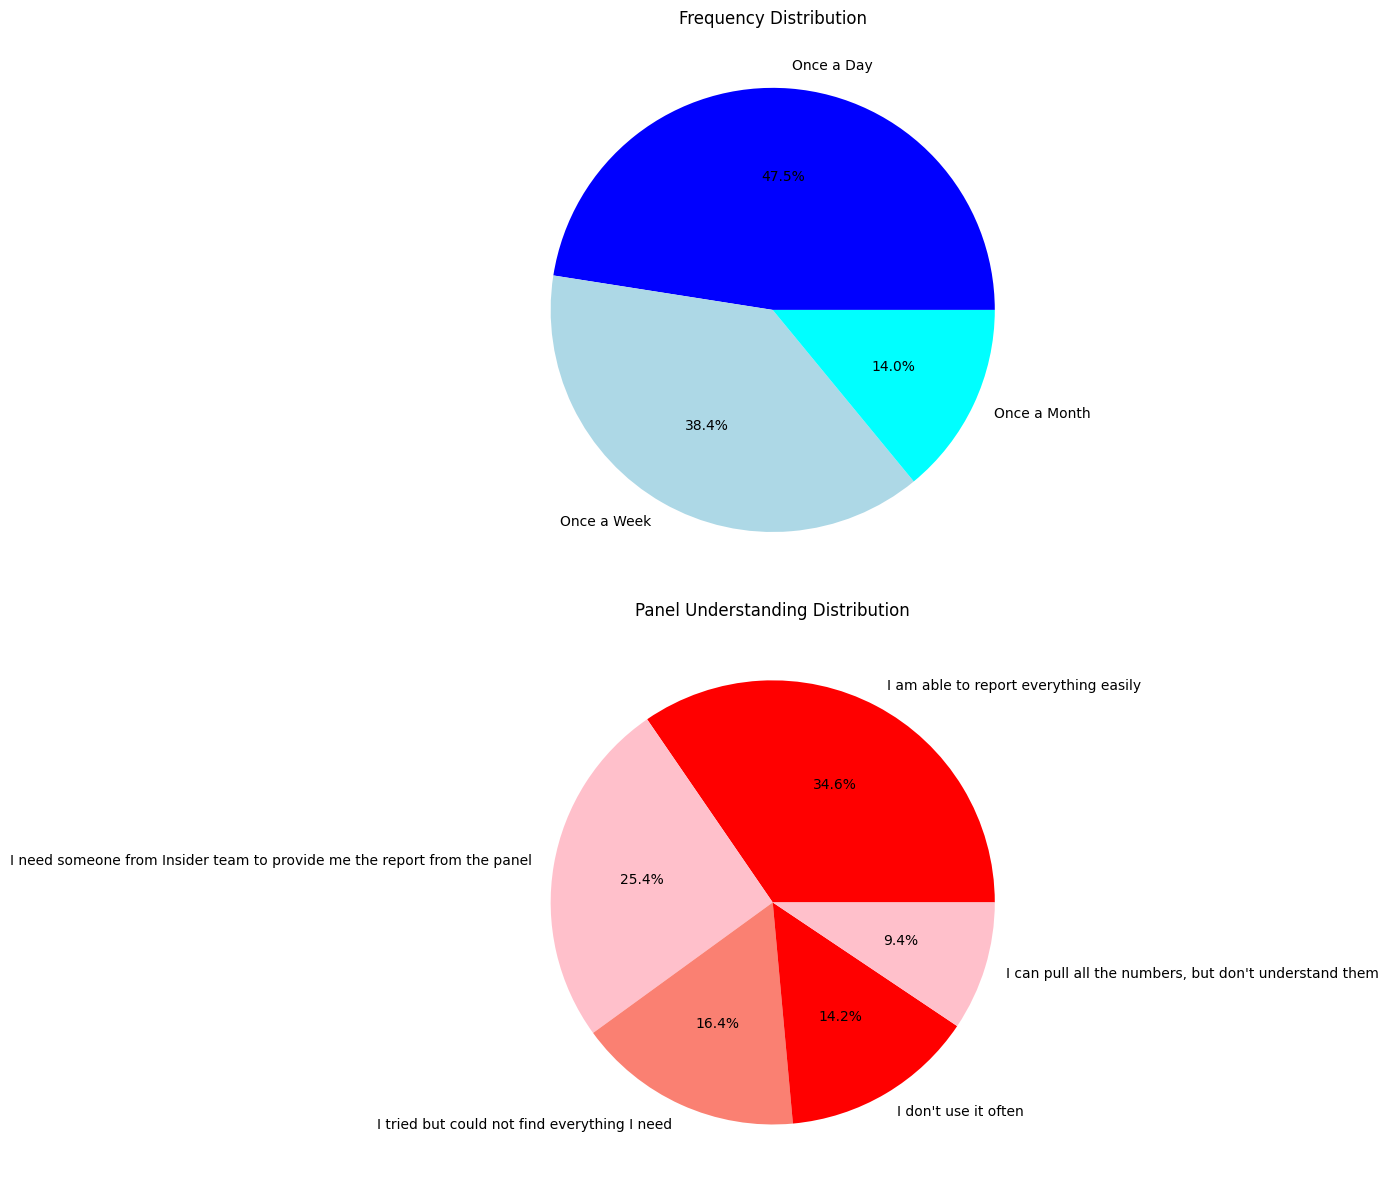

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
Survey["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "lightblue", "cyan"], ax=axes[0]
)
axes[0].set_title("Frequency Distribution")
axes[0].set_ylabel("") 
Survey["Please rate your understanding of our reporting capabilities in the panel"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["red", "pink", "salmon"], ax=axes[1]
)
axes[1].set_title("Panel Understanding Distribution")
axes[1].set_ylabel("") 

plt.tight_layout()
plt.show()

**What We Observed And Our Insights:**

* 💪 Customers' usage frequency of the platform is really nice,customers who use once a day rate is highest.
* 🤕 Once a month rate is not a negligible rate which is nearly %14 of the people , company may be focused on those people to attract them to the platform.
* 😞 Even though "reporting easily"'s rate is highest overall nearly more than half of the people cannot easily report their problem.
* 🤖 Need for the guiding to report is really high(%25.4) maybe our platforms' interface could be more user-friendly.
* 😟 Nearly %25 of the people cannot solve their problems using panel ,which is a really important problem in terms of connection between the company and customers and the number of people is not negligible.

### Other Customer Data ###

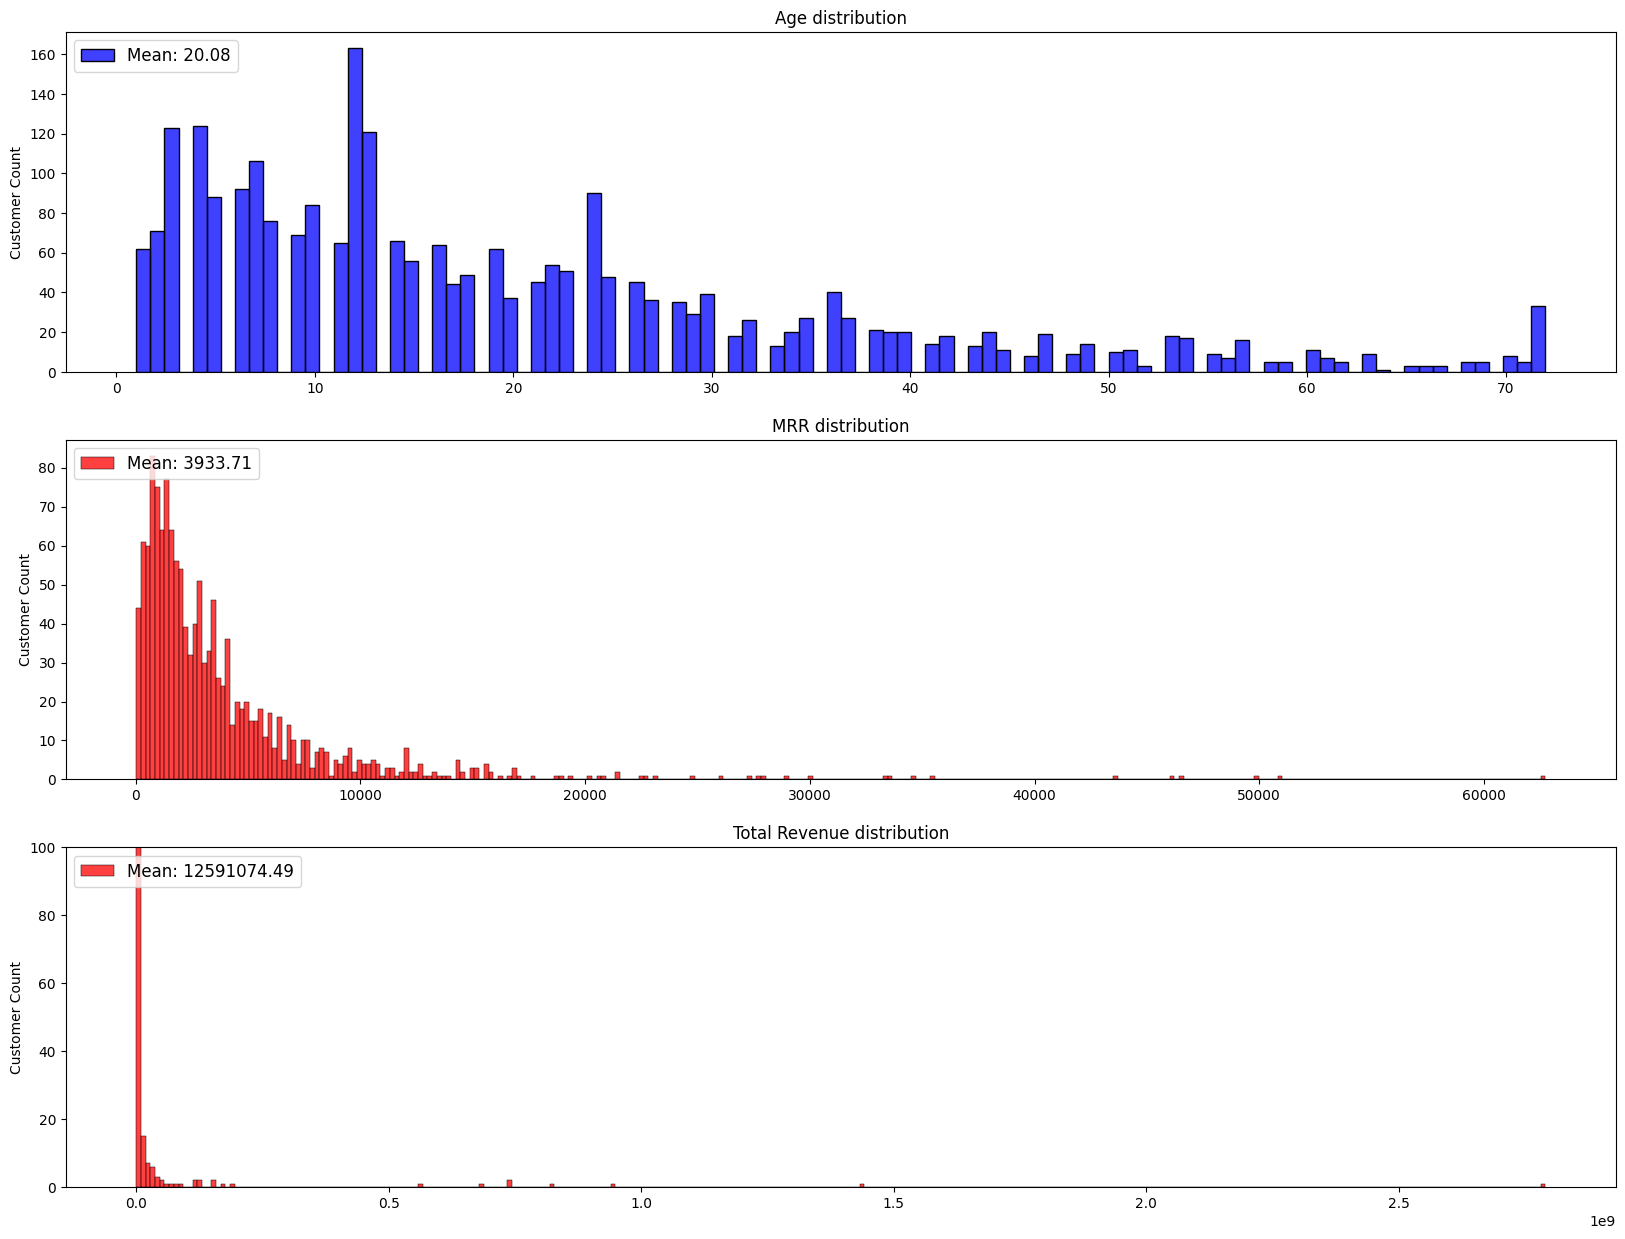

In [67]:
fig,axes = plt.subplots(3,1,figsize = (20,15))
sns.histplot(Age["Customer Age (Months)"], bins=100, kde=False, color="blue",ax = axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("Customer Count")
axes[0].set_title("Age distribution")
mean_valuea = Age["Customer Age (Months)"].mean()
axes[0].legend([f"Mean: {mean_valuea:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(MRR["MRR"], bins=300, kde=False, color="red",ax = axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("Customer Count")
axes[1].set_title("MRR distribution")
mean_valuem = MRR["MRR"].mean()
axes[1].legend([f"Mean: {mean_valuem:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(Revenue["Total Revenue"], bins=300, kde=False, color="red",ax = axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("Customer Count")
axes[2].set_title("Total Revenue distribution")
axes[2].set_ylim([0, 100])  


mean_valuer = Revenue["Total Revenue"].mean()
axes[2].legend([f"Mean: {mean_valuer:.2f}"], loc="upper left", fontsize=12, frameon=True)

plt.show()

**What We Observed And Our Insights:**

* 🏃‍♂️There are many recent users to this platform which is a great oppurtunity to expand the number of platform users if we can keep these recent ones in our platform but there are many old users too for especially there are many users which used the platform for at least 20 months, so that our mean value is 20 month.
* 💬Generally customers,pay nearly same MRR ,and the graph is decreasing as we expected,but these data doesn't show anything alone,later we will mostly focus MRR with Revenue because these data make sense if we analyze them together.
* 🤔Most of the people cumulates same area in the graph and probably due to some outliers have extremely absurd numbers mean of the graph is really high.This data should be questioned in terms of validity.

### Other Numeric Features ###

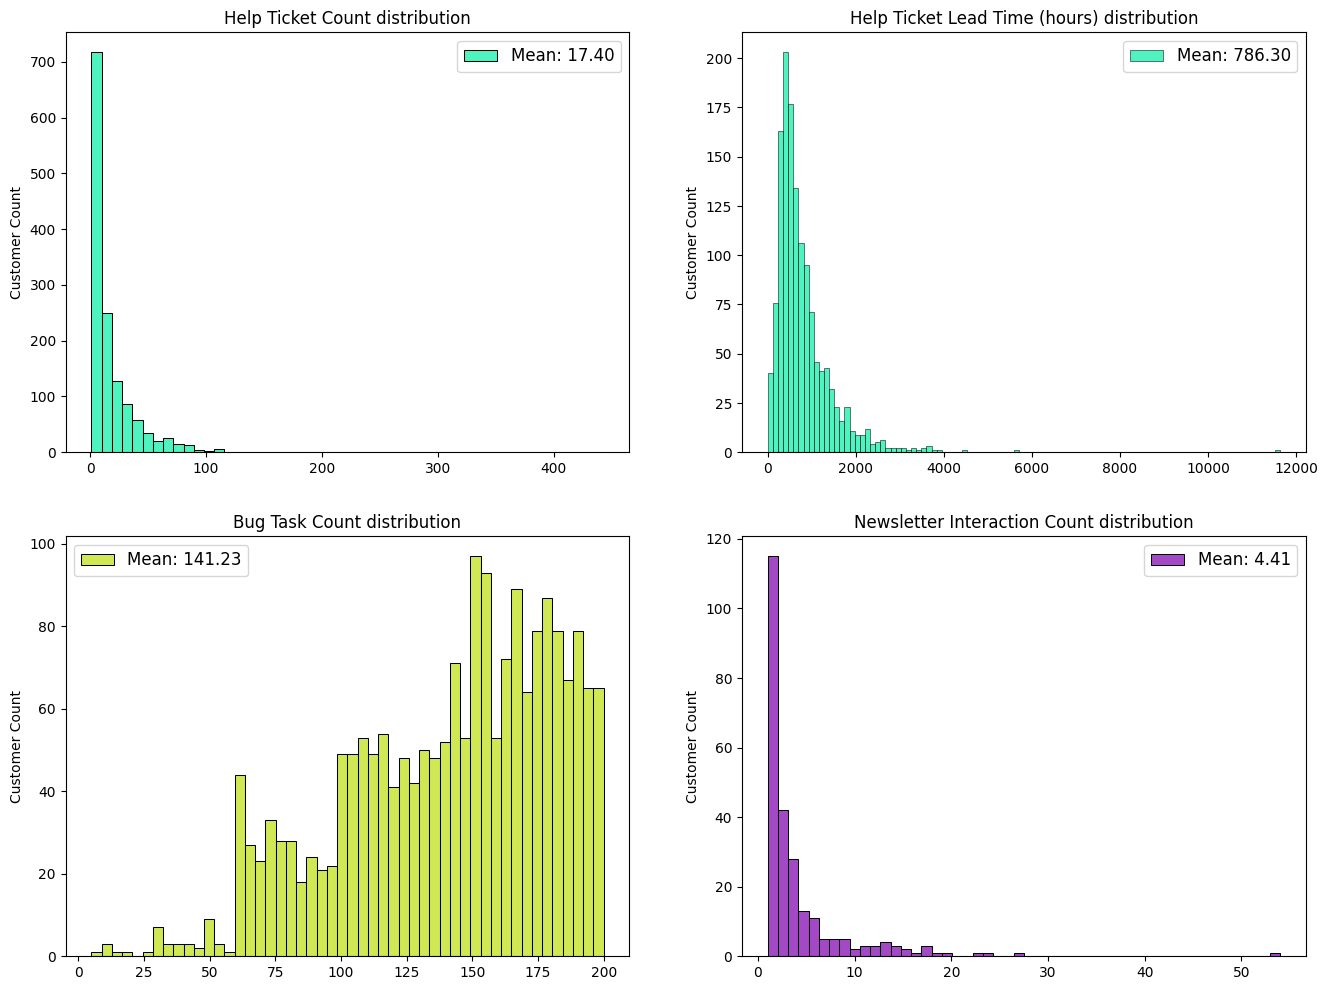

In [68]:
fig,axes = plt.subplots(2,2,figsize = (16,12))
sns.histplot(Help_Ticket["Help Ticket Count"],bins = 50 ,color = "#14f0aa",ax =axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Help Ticket Count distribution")
mean_valueh = Help_Ticket["Help Ticket Count"].mean()
axes[0,0].legend([f"Mean: {mean_valueh:.2f}"], loc="upper right", fontsize=12, frameon=True)


sns.histplot(Newsletter["Company Newsletter Interaction Count"],bins  = 50 ,color = "#860cb4",ax =axes[1,1] )
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Newsletter Interaction Count distribution")
mean_valuen = Newsletter["Company Newsletter Interaction Count"].mean()
axes[1,1].legend([f"Mean: {mean_valuen:.2f}"], loc="upper right", fontsize=12, frameon=True)

sns.histplot(Bug["Product Bug Task Count"],bins = 50 ,color = "#c0e11b",ax =axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Bug Task Count distribution")
mean_valueb = Bug["Product Bug Task Count"].mean()
axes[1,0].legend([f"Mean: {mean_valueb:.2f}"], loc="upper left", fontsize=12, frameon=True)


sns.histplot(Help_Ticket["Help Ticket Lead Time (hours)"],bins  = 100 ,color = "#14f0aa",ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Help Ticket Lead Time (hours) distribution")
mean_valuet = Help_Ticket["Help Ticket Lead Time (hours)"].mean()
axes[0,1].legend([f"Mean: {mean_valuet:.2f}"], loc="upper right", fontsize=12, frameon=True)

plt.show()

**What We Observed And Our Insights:**

* 💬Help ticket distribution graph doesn't mean anything alone we should examine it later with some other parameters.However we can say mean value of it is actually normal number.
* ❌Help Ticket Lead time graph shows us nearly everyone has a problem with Help Ticket Lead Time,also as you can see mean value of this parameter is 786 hours which is a huge number.
* ♨️Nearly every customer struggle with the many of bugs, averagely 141 bugs per person is absurd number.
* ✉️The company are struggling to connect their customers to show them their new campaigns etc if you can see Newsletter Interaction graph.
* ♻️Overall we can say at first stage the company has some problem with their customers in terms of connection ,and the company should dig into this subject to solve it because the number of customer which has a problem with company's general system is not negligble,also the number of customers that the company can easily create strong connection is too low.In our deep analysis we should examine these subjects more deeply ,because if this system contuniue like this the companya has a potential risk to lose huge number of customers.

### Rest of Datasets ###

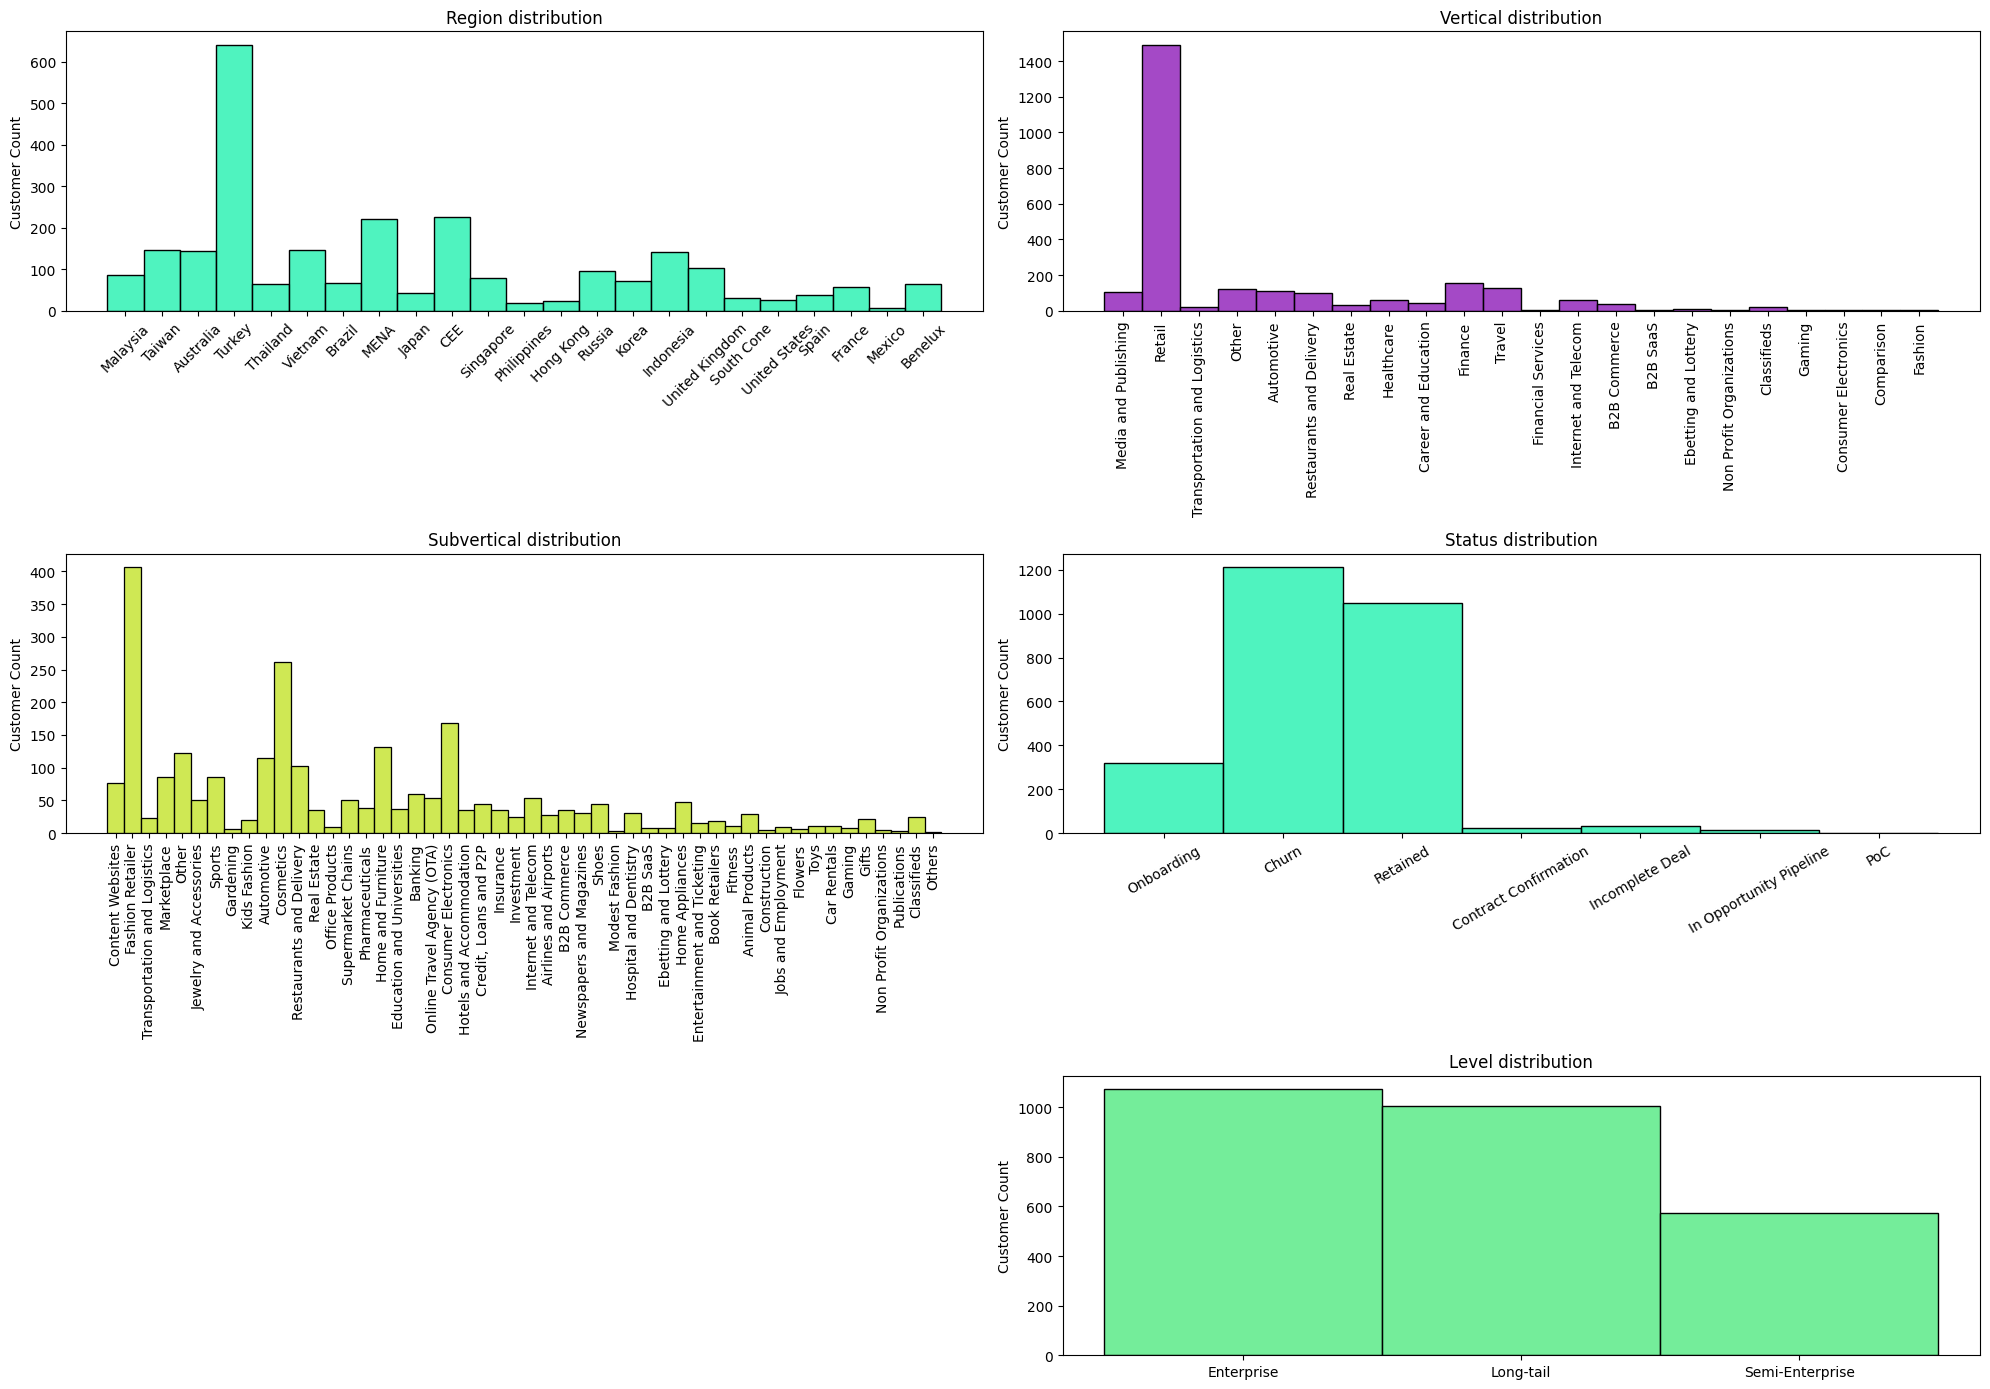

In [69]:
fig,axes = plt.subplots(3,2,figsize = (20,14))
sns.histplot(RegionVertical["Region"],bins = 50 ,color = "#14f0aa",ax =axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Region distribution")
axes[0,0].tick_params(axis='x', rotation=45)  


sns.histplot(RegionVertical["Vertical"],bins  = 50 ,color = "#860cb4",ax =axes[0,1] )
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Vertical distribution")
axes[0,1].tick_params(axis='x', rotation=90)  

sns.histplot(RegionVertical["Subvertical"],bins = 50 ,color = "#c0e11b",ax =axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Subvertical distribution")
axes[1,0].tick_params(axis='x', rotation=90)  


sns.histplot(StatusLevel["Status"],bins  = 100 ,color = "#14f0aa",ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Status distribution")
axes[1,1].tick_params(axis='x', rotation=30)

sns.histplot(StatusLevel["Customer Level"],bins  = 100 ,color = "#46e879",ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("Customer Count")
axes[2,1].set_title("Level distribution")

fig.delaxes(axes[2, 0])
plt.tight_layout()
plt.show()

**What We Observed And Our Insights:**

* 🇹🇷 Our customers are mostly Turkish people and we may consider some cultural activities to strengthen our relationships with them.
* 😎 Our customers almost comes from the retail industry with no surprise.
* 💬 In Customers' subverticals graph we should focus on two sector fashion and cosmetic which are the most common job that our customers come from so that we may update some features to attract them more.
* 📣 As I said before our main problem is weak connections with our customers and the graph of Status justified it because as you can see Churn number and retained number are head to head but churn number is even more and if we continue with the same system we will lose more customers and the gap between churn and retained will widen.
* 🗣️ In graph Level distribution we can infer that our customers are mostly love risky projects , and we may provide an insurance to those people to make them feel safe and increase their investments.Moreover,some of the other customers are tend to sell cheap product but many of them.And we may think about them too, we may decrease our cargo price for especially cheaper products to increase sales,and increase our commission a bit per unit.

## Basic Correlations Between Different Datasets ##

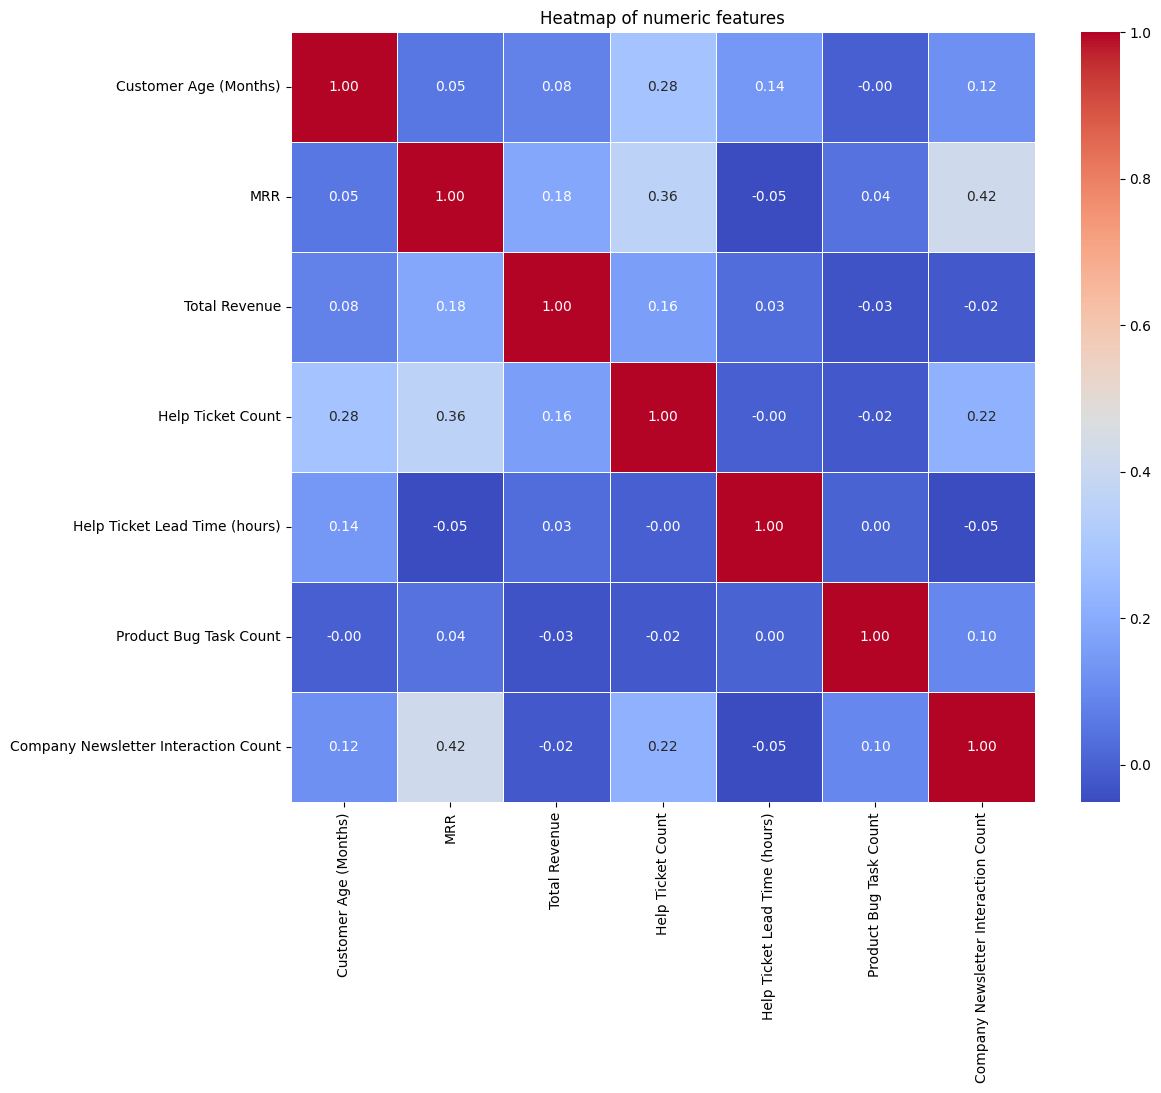

In [70]:
Age = Age.rename(columns = {"CRM ID" : "Customer ID"})
merged = Age.merge(MRR, on="Customer ID", how="outer")\
               .merge(Revenue, on="Customer ID", how="outer")\
               .merge(Help_Ticket, on="Customer ID", how="outer")\
               .merge(Bug, on="Customer ID", how="outer")\
               .merge(Newsletter, on="Customer ID", how="outer")
merged.dropna()
numeric = merged.select_dtypes(include=['number'])
corr_matrix = numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of numeric features")
plt.show()

**Key Observations:**

* There is no any strong correlation between Revenue and any features so that we should examine Revenue with some other features because Revenue is actually one of the most important features that we have.
* MRR has a not weak correlation with Help_Ticket Count and Newsletter interaction count ,and there is two question with this correlation:
   1. Does this happened because of the ages that customers used platform?
   2. Are the customers who paid more,interested more in the platform ? At first look we can see Age and MRR has a very weak correlation which may discard first question ,but we are not sure now.

### Survey Correlations: ###

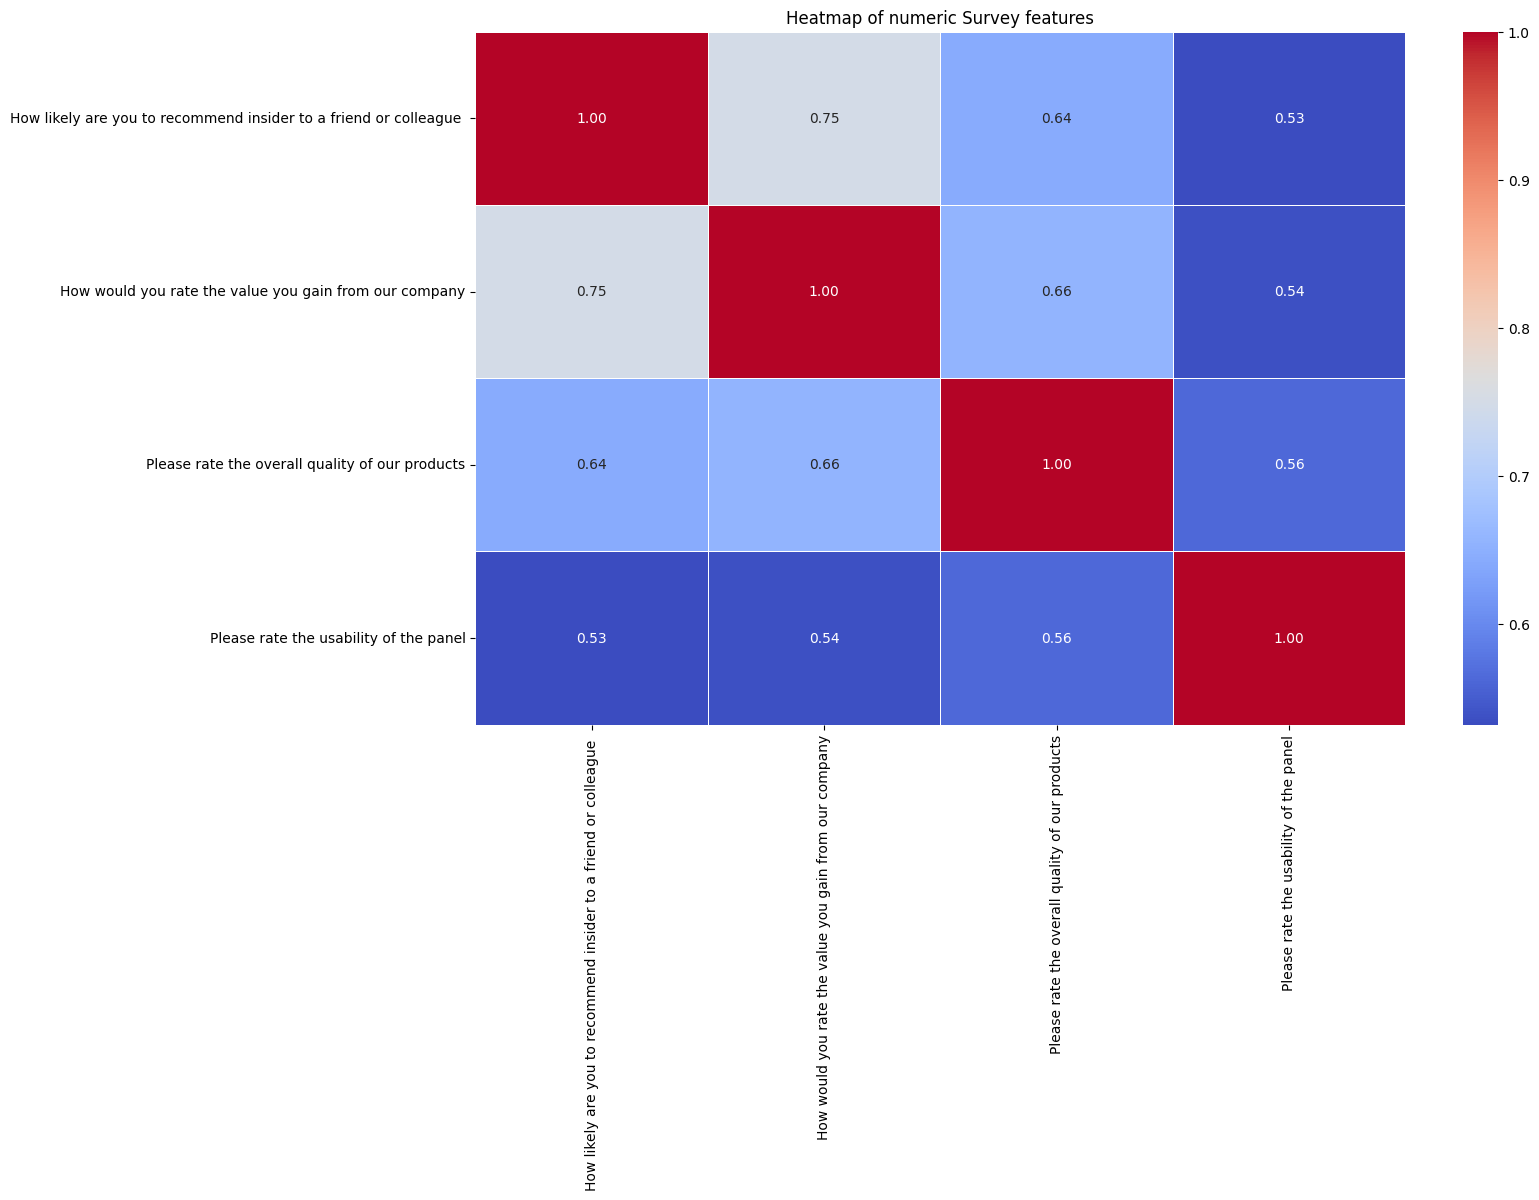

In [71]:
Surveywoq = Survey.drop("Quarter",axis = 1)\
                  .drop("Year",axis = 1)
numeric = Surveywoq.select_dtypes(include=['number'])
corr_matrix = numeric.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of numeric Survey features")
plt.show()

**Key Observations:**

* As we expected every correlation is can be counted as strong.
* However mostly we can easily notice that customers that is pleasant with their value are tend to reccomend our platform to others.

### Final Heatmap That We Want To Inspect More ###

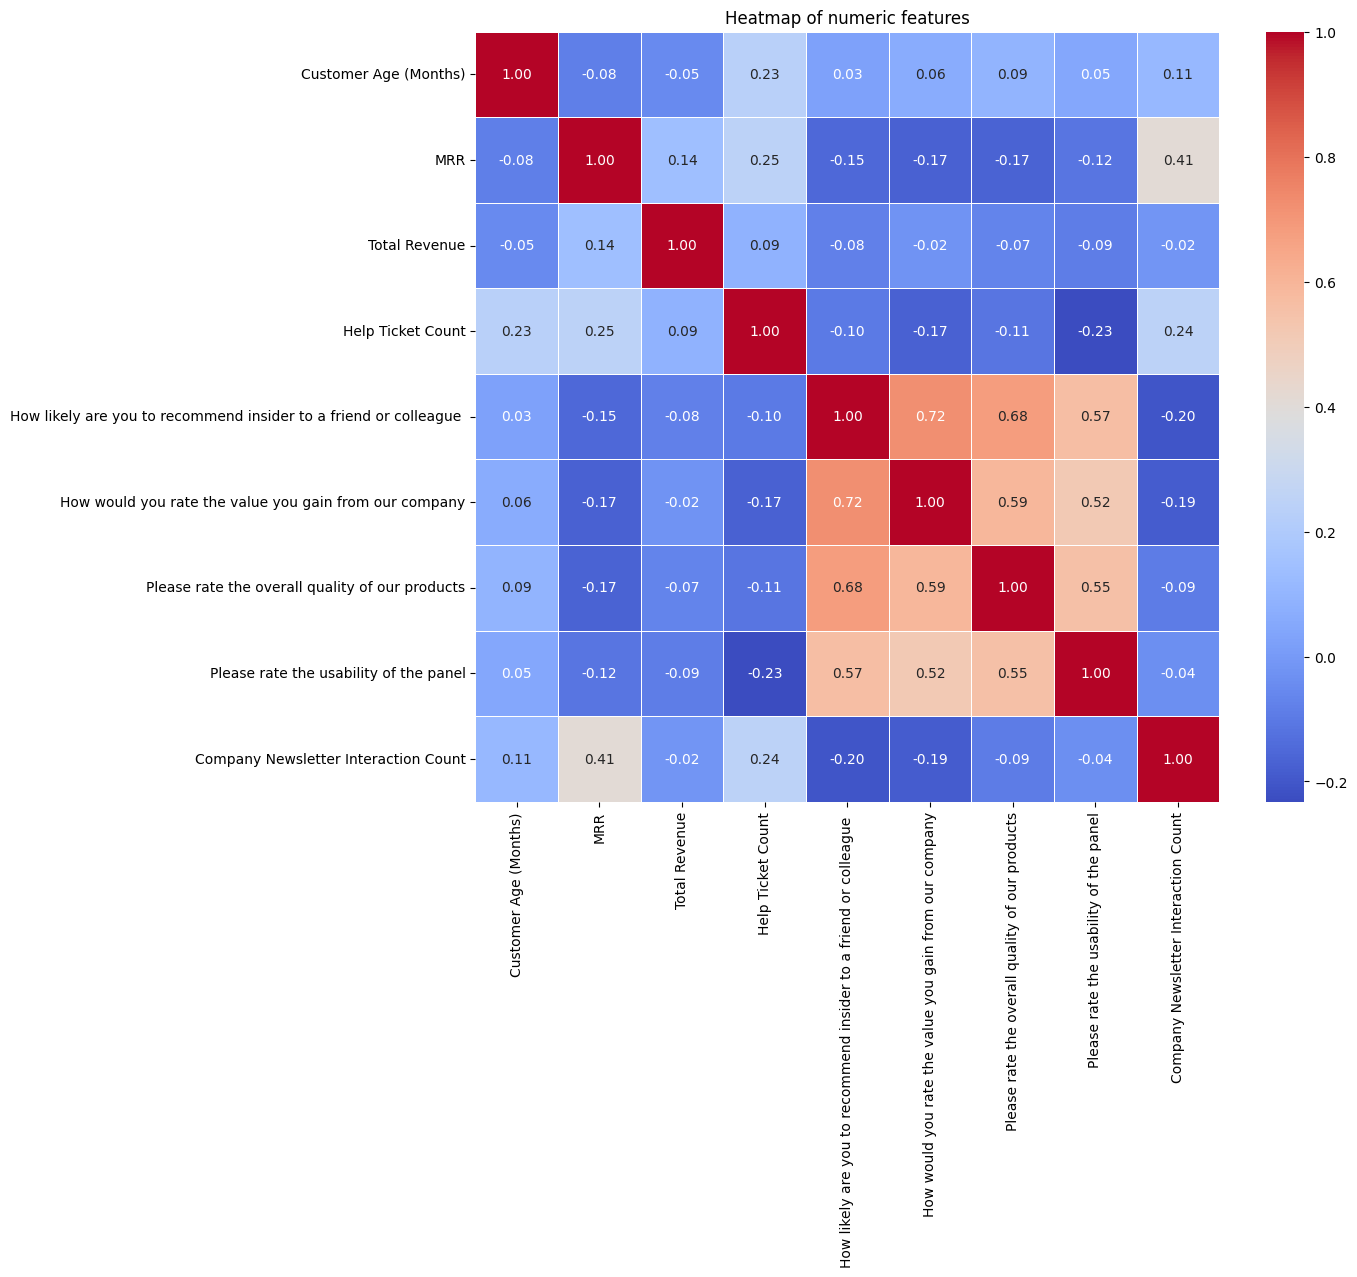

In [72]:
Help_Ticketv1 = Help_Ticket.drop("Help Ticket Lead Time (hours)",axis = 1)
merged = Age.merge(MRR, on="Customer ID", how="inner")\
               .merge(Revenue, on="Customer ID", how="inner")\
               .merge(Help_Ticketv1, on="Customer ID", how="inner")\
               .merge(Survey, on="Customer ID", how="inner")\
               .merge(Newsletter, on="Customer ID", how="inner")
merged = merged.drop_duplicates(subset=['Customer ID','Quarter'])
merged = merged.drop("Quarter",axis = 1)\
      .drop("Year", axis = 1)
numeric = merged.select_dtypes(include=['number'])
corr_matrix = numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of numeric features")
plt.show()

**Our Final Observations About The Basic Correlations:**

* 😟Survey Results is not consistent with the reality in terms of correlations,for example rating the value the get and real revenue's correlation is 0.02 which is a absurd low number,so that we can infer this situation in 3 main questions?:
  1. Does this survey results shows the reality or the survey results should be examined seperating the other parameters?
  2. May this correlation calculation include some mistakes inside?
  3. Does some customers which answered same survey more than once affect this correlation map in a negative way?
* In our final deep analysis step we will consider those questions by using some other calculation operations.

## Analyzing Survey by Dividing Into Quarters ##

🤔 For this part of the EDA, the CSAT_Survey dataset is divided into three subgroups according to the quarters. The main reason of this approach is to analyze the distribution of the survey answers. This approach helps us for better understanding the general trends during 2022.

Steps of this part:
* Creating the new ".csv" files using quarters
* Analyzing numerical datas
* Analyzing categorical datas


In [73]:
quarter_1 = Survey[Survey["Quarter"] == 1]
quarter_2 = Survey[Survey["Quarter"] == 2]
quarter_3 = Survey[Survey["Quarter"] == 3]


✅ For each quarter, it is created that the new data frames by using the 'Survey' dataset.

In [74]:
print(len(quarter_1))
print(len(quarter_2))
print(len(quarter_3))

540
594
781


🚨​IMPORTANT NOTE!🚨​

For the basic analysis of this part it must be considered that for the last quarter, the number of users who aswered the survey are more than the first quarters. So, when it is analyzed the graphs in this part, it is mandotary to consider using percentage values instead of the real ones.

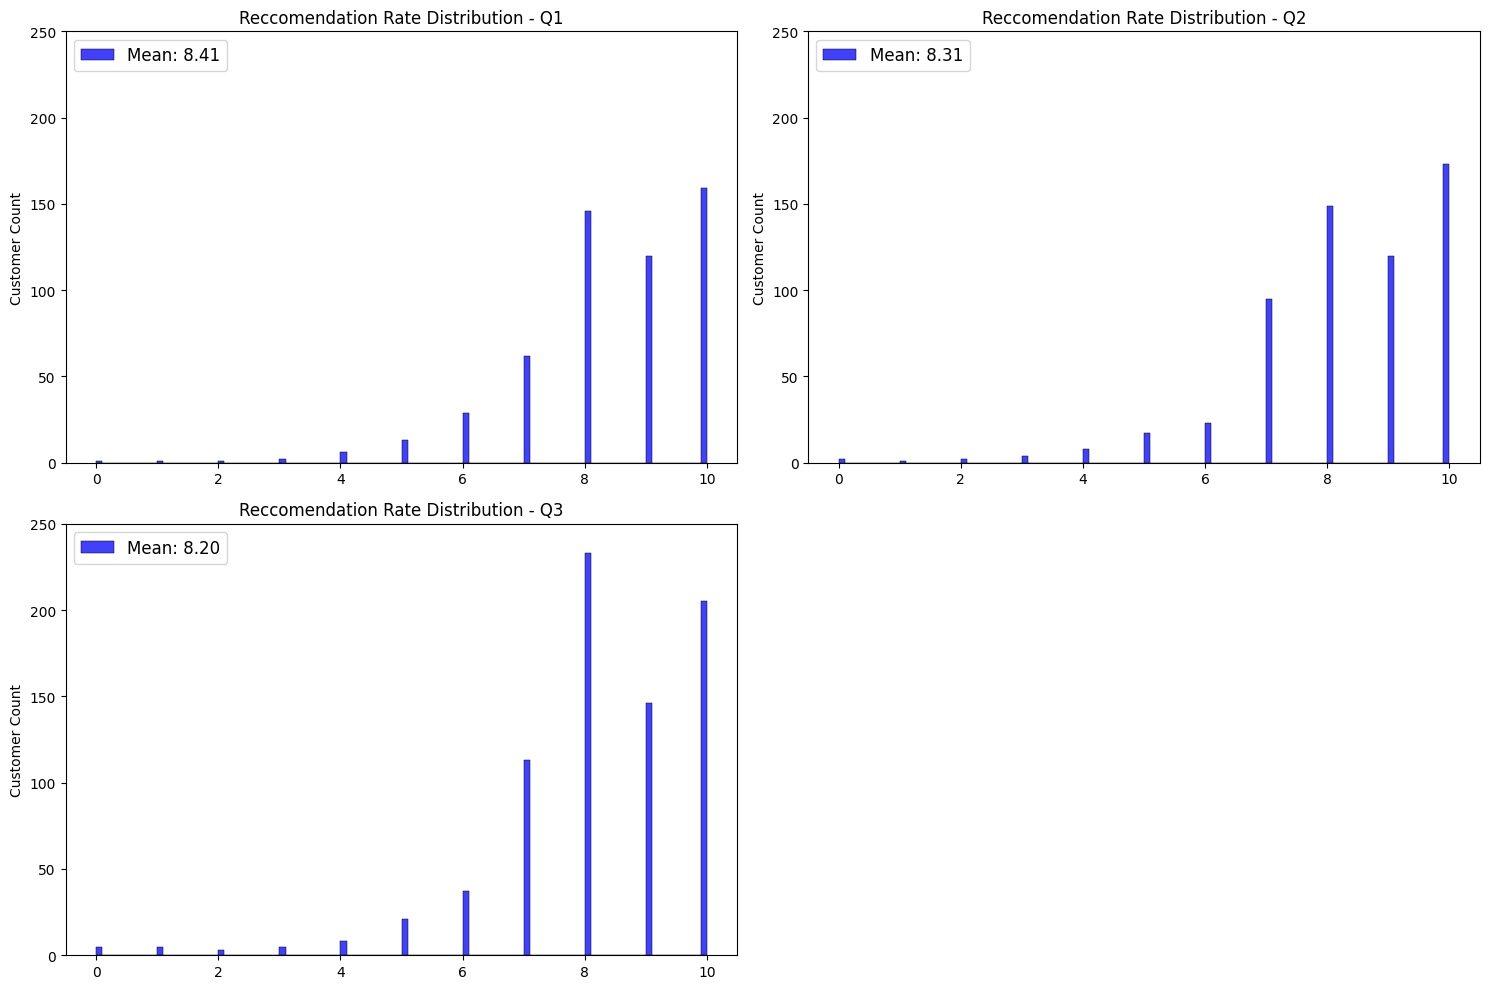

In [75]:
fig,axes = plt.subplots(2,2,figsize = (15, 10))

sns.histplot(quarter_1["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Reccomendation Rate Distribution - Q1")
mean_value1 = quarter_1["How likely are you to recommend insider to a friend or colleague "].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,0].set_ylim(0,250)

sns.histplot(quarter_2["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Reccomendation Rate Distribution - Q2")
mean_value2 = quarter_2["How likely are you to recommend insider to a friend or colleague "].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,1].set_ylim(0,250)

sns.histplot(quarter_3["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Reccomendation Rate Distribution - Q3")
mean_value3 = quarter_3["How likely are you to recommend insider to a friend or colleague "].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[1,0].set_ylim(0,250)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

✅ The answers of the question 'How likely are you to recommend insider to a friend or colleague?' are analyzed independently for each quarters. And these bar charts are useful to analyze and undertand the changing in the trend.


**Key Observations:**

* 👍 General ratings of recommendations are above the 8 out of 10 which is very good rating for a company.
* 👎 The average of the recommandations are slightly decreased.
* 😵‍💫 If first two quarters are considered then the number of people who give 0/1/2 is increased. Also, number of people who give 10 is increased too. So, it shows that people who rated for 0/1/2 are increased more.
* 👎 If all quarters are considered together, there is a slightly decreasing trend.

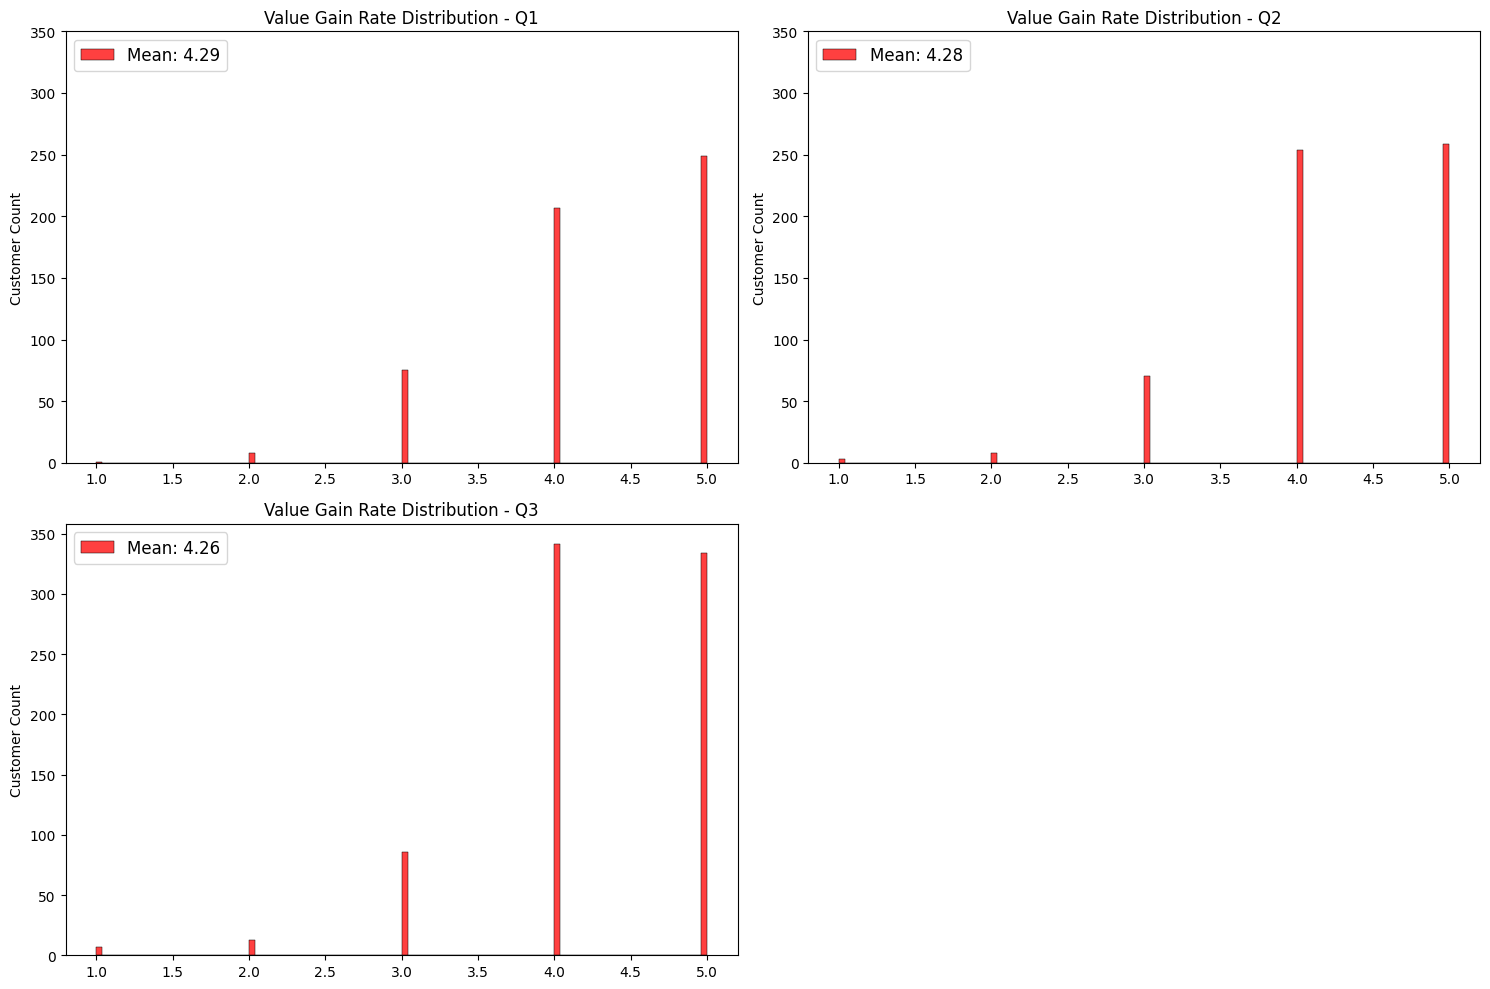

In [76]:
fig,axes = plt.subplots(2,2,figsize = (15, 10))

sns.histplot(quarter_1["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Value Gain Rate Distribution - Q1")
mean_value1 = quarter_1["How would you rate the value you gain from our company"].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,0].set_ylim(0,350)

sns.histplot(quarter_2["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Value Gain Rate Distribution - Q2")
mean_value2 = quarter_2["How would you rate the value you gain from our company"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,1].set_ylim(0,350)

sns.histplot(quarter_3["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Value Gain Rate Distribution - Q3")
mean_value3 = quarter_3["How would you rate the value you gain from our company"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,1].set_ylim(0,350)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

✅ The answers of the question 'How would you rate the value you gain from our company?' are analyzed independently for each quarters. And these bar charts are useful to analyze and undertand the changing in the trend.

**Key Observations:**
* 👍  General ratings of value gain from the company are above the 4.25 out of 5 which is very good rating for a company.
* 👎 The average of the recommandations are very little decreased.
* 😵‍💫 If first two quarters are considered then the number of people who give 4 is increased. But the mean is decreased. The reason may be the increasing in the number of people who give 1/2/3
* 👎 While the number of people giving 1 in the first quarter was almost 0, an increase was observed later on.
* 🤑 If all quarters are considered together, there is a stable trend.


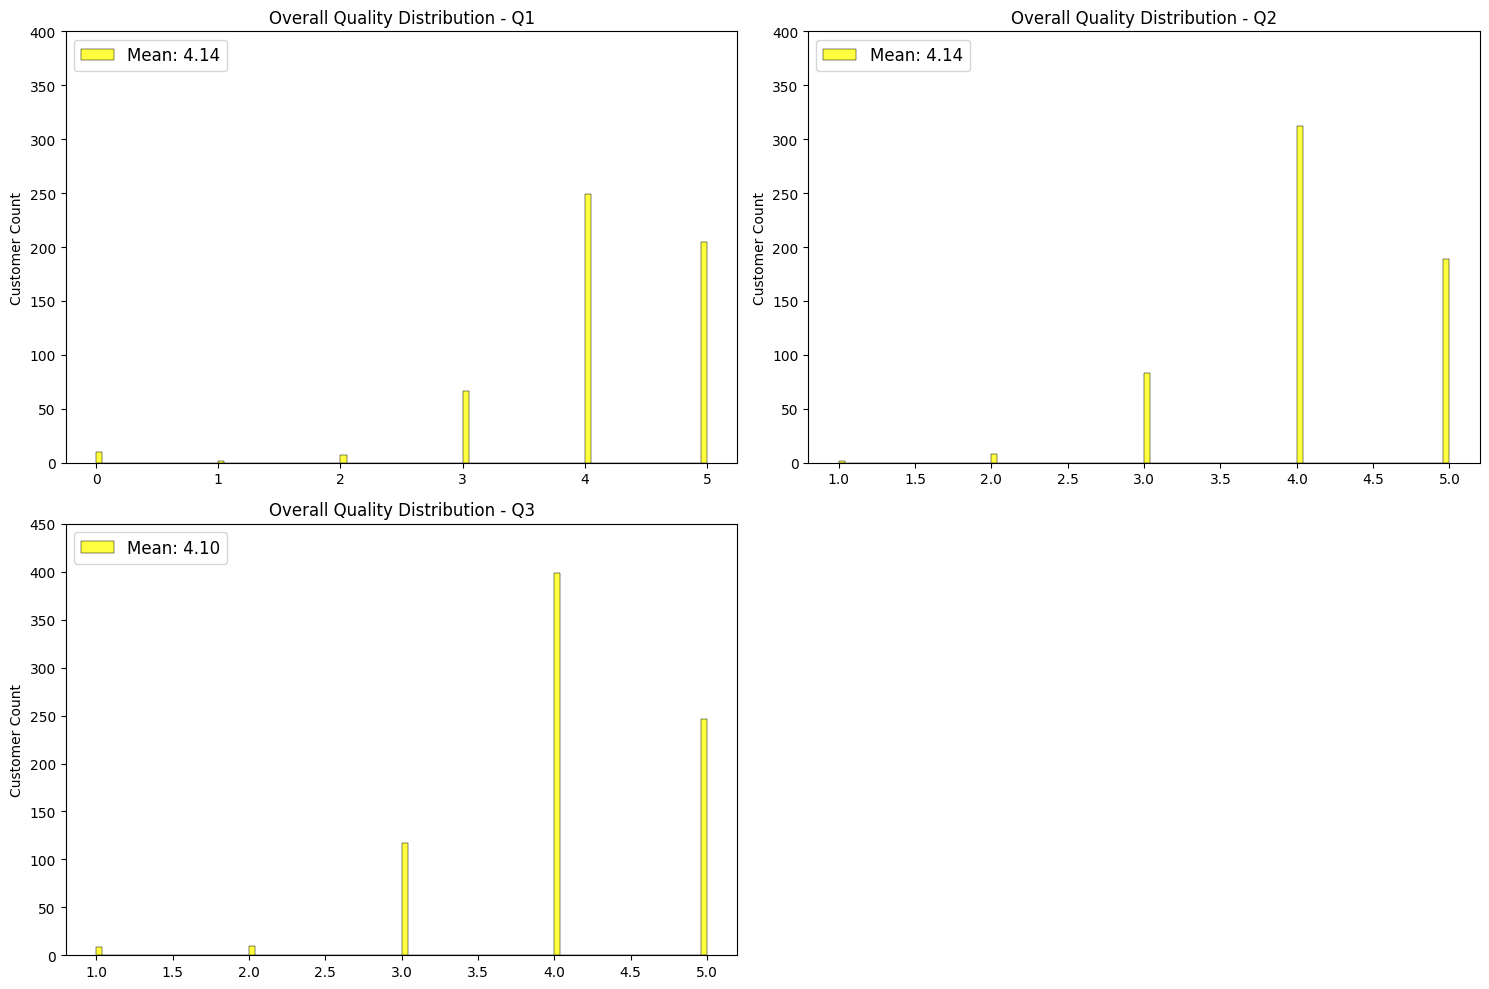

In [77]:
fig,axes = plt.subplots(2,2,figsize = (15, 10))

sns.histplot(quarter_1["Please rate the overall quality of our products"], bins=100, kde=False, color="yellow",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Overall Quality Distribution - Q1")
mean_value1 = quarter_1["Please rate the overall quality of our products"].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,0].set_ylim(0,400)

sns.histplot(quarter_2["Please rate the overall quality of our products"], bins=100, kde=False, color="yellow",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Overall Quality Distribution - Q2")
mean_value2 = quarter_2["Please rate the overall quality of our products"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,1].set_ylim(0,400)

sns.histplot(quarter_3["Please rate the overall quality of our products"], bins=100, kde=False, color="yellow",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Overall Quality Distribution - Q3")
mean_value3 = quarter_3["Please rate the overall quality of our products"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[1,0].set_ylim(0,450)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


✅ The answers of the question 'Please rate the overall quality of our products' are analyzed independently for each quarters. And these bar charts are useful to analyze and undertand the changing in the trend.

**Key Observations:**
* 👍  General ratings of value gain from the company are above the 4 out of 5 which is good rating for a company.
* 👍 In the first two quarters there is no change in the mean, which is perfectly stable.
* 😵‍💫 If first two quarters are considered then the number of people who give 4 is increased. But 5's are decreased. This lead the mean stay same.
* 👎 After the second quarter the mean is decreased slightly.
* 🤑 If all quarters are considered together, there is a stable trend.


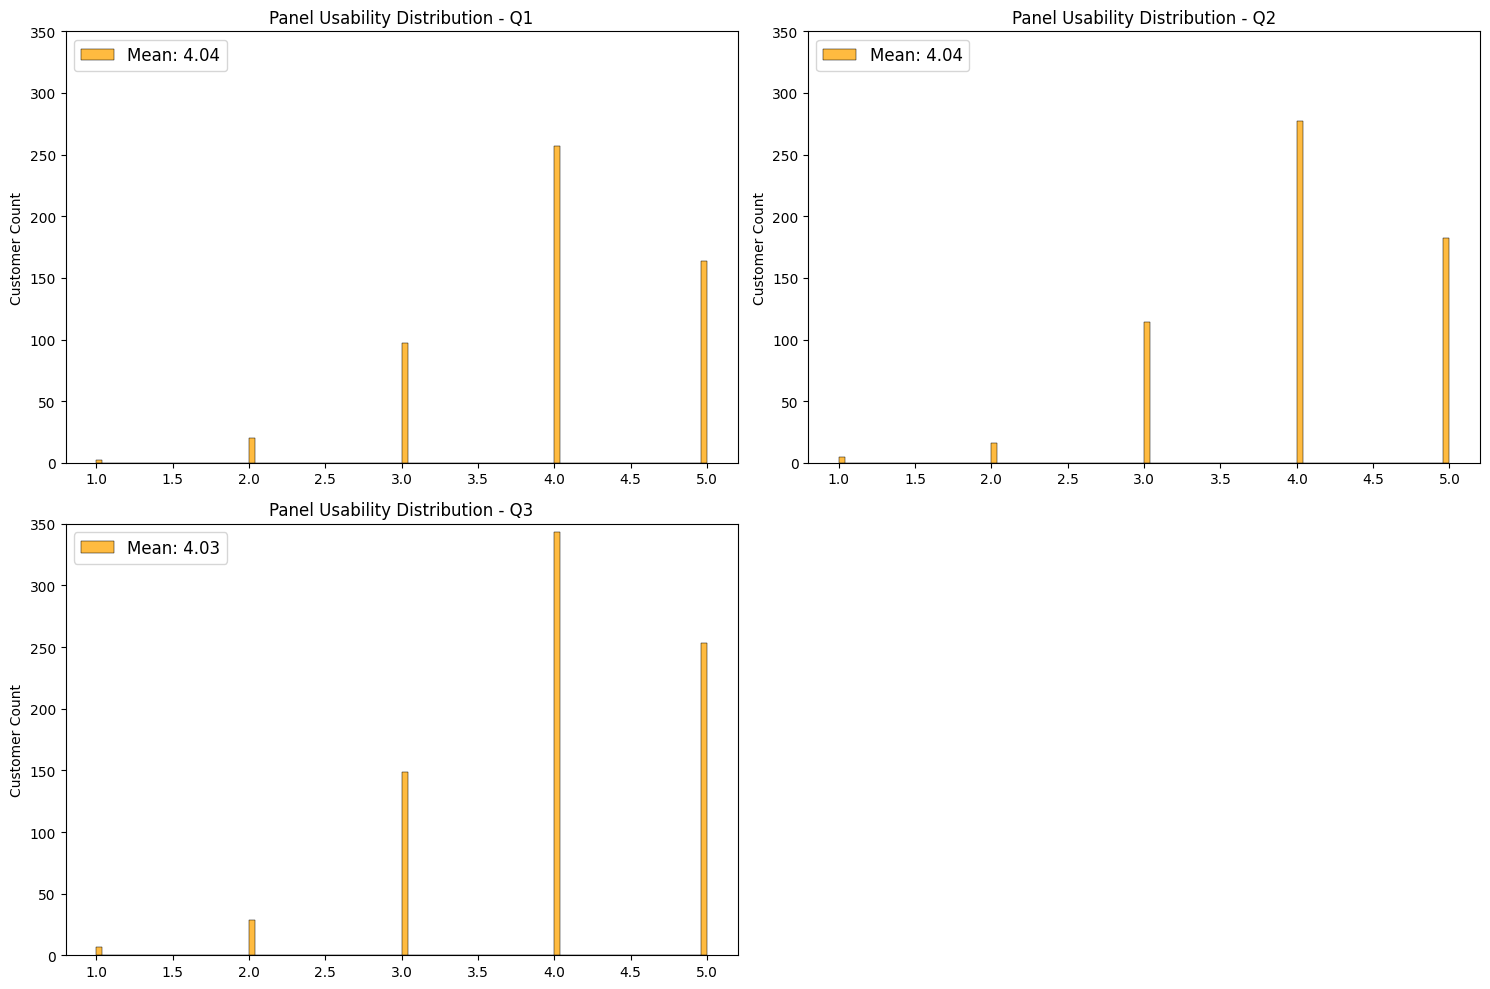

In [78]:
fig,axes = plt.subplots(2,2,figsize = (15, 10))

sns.histplot(quarter_1["Please rate the usability of the panel"], bins=100, kde=False, color="orange",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Panel Usability Distribution - Q1")
mean_value1 = quarter_1["Please rate the usability of the panel"].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,0].set_ylim(0,350)

sns.histplot(quarter_2["Please rate the usability of the panel"], bins=100, kde=False, color="orange",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Panel Usability Distribution - Q2")
mean_value2 = quarter_2["Please rate the usability of the panel"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[0,1].set_ylim(0,350)

sns.histplot(quarter_3["Please rate the usability of the panel"], bins=100, kde=False, color="orange",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Panel Usability Distribution - Q3")
mean_value3 = quarter_3["Please rate the usability of the panel"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)
axes[1,0].set_ylim(0,350)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

✅ The answers of the question 'Please rate the usability of the panel' are analyzed independently for each quarters. And these bar charts are useful to analyze and undertand the changing in the trend.

**Key Observations:**
* 👍  General ratings of value gain from the company are above the 4 out of 5 which is good rating for a company.
* 👍 In the first two quarters there is no change in the mean, which is perfectly stable.
* 👍 If first two quarters are considered then one can say that distributions of the answers are almost the same.
* 👎 After the second quarter the mean is decreased very, very little which is %0.01.
* 🤑 If all quarters are considered together, there is an almost perfectly stable trend.


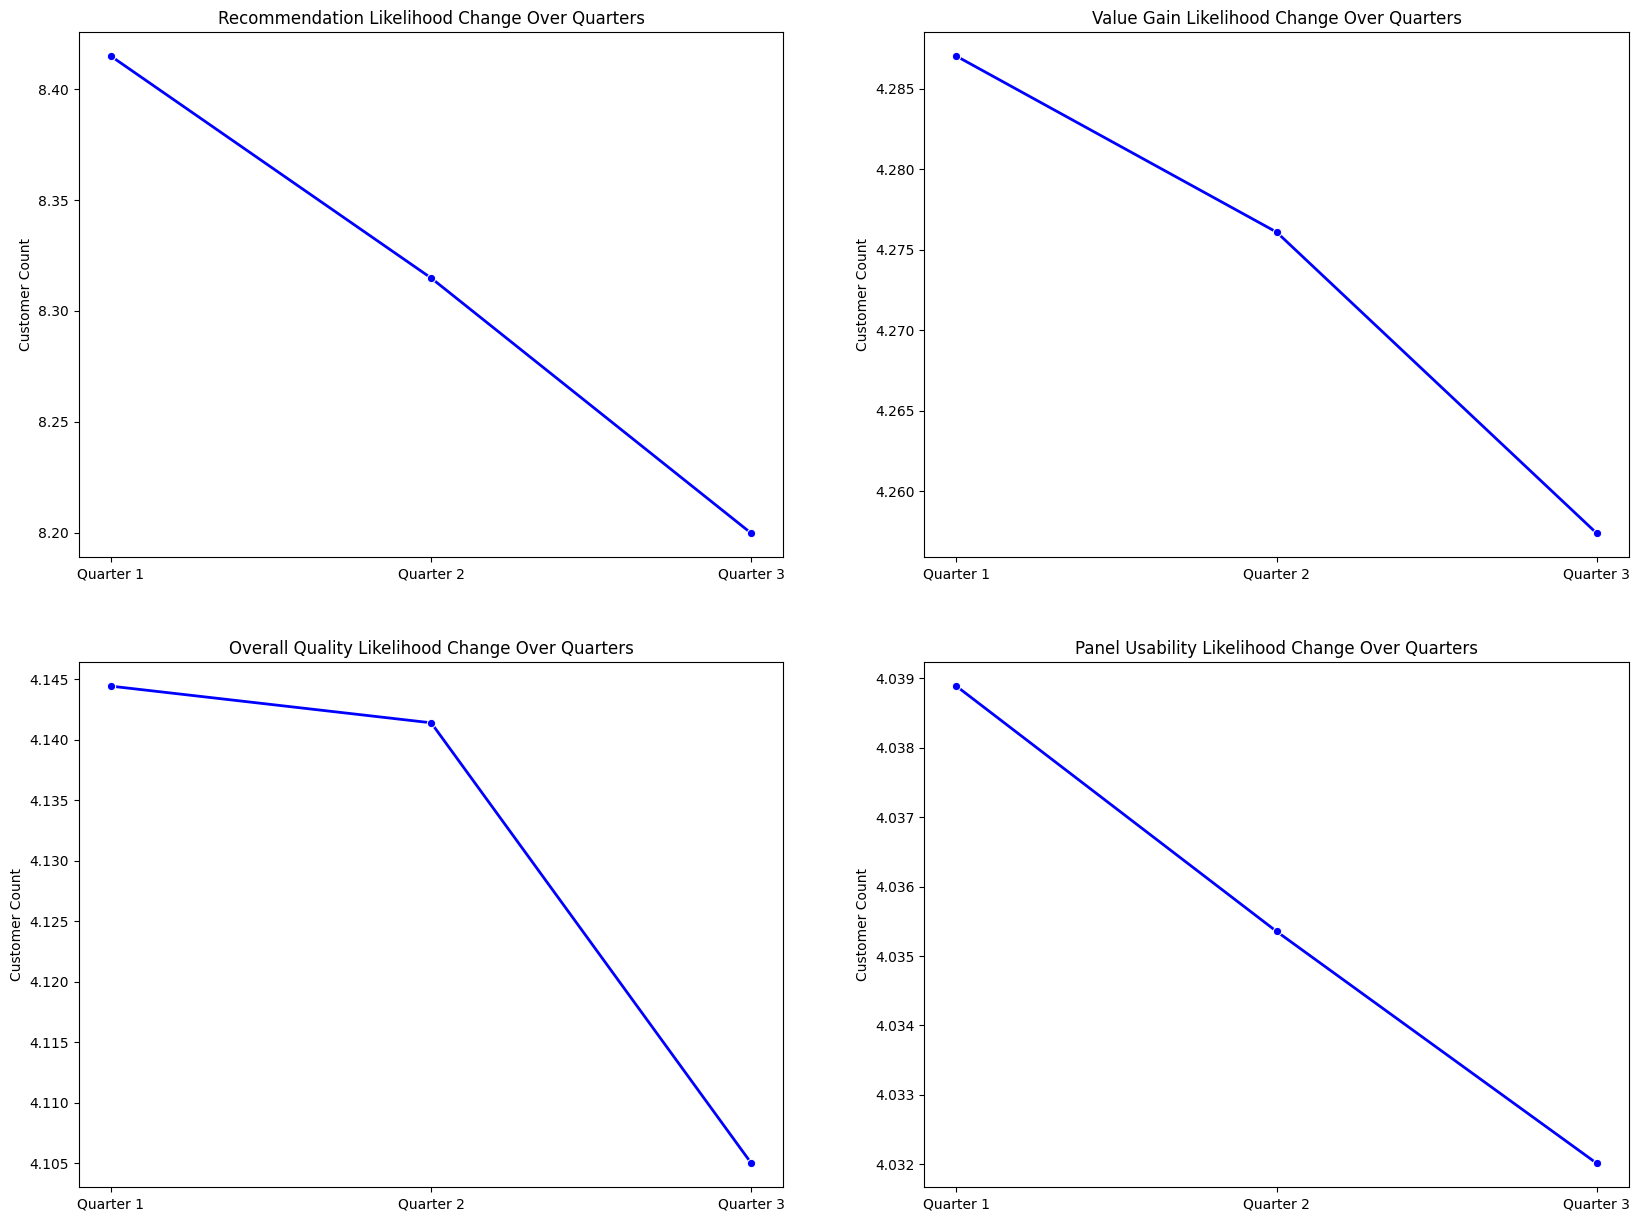

In [79]:
mean1_q1 = quarter_1['How likely are you to recommend insider to a friend or colleague '].mean()
mean1_q2 = quarter_2['How likely are you to recommend insider to a friend or colleague '].mean()
mean1_q3 = quarter_3['How likely are you to recommend insider to a friend or colleague '].mean()

mean2_q1 = quarter_1['How would you rate the value you gain from our company'].mean()
mean2_q2 = quarter_2['How would you rate the value you gain from our company'].mean()
mean2_q3 = quarter_3['How would you rate the value you gain from our company'].mean()

mean3_q1 = quarter_1['Please rate the overall quality of our products'].mean() 
mean3_q2 = quarter_2['Please rate the overall quality of our products'].mean() 
mean3_q3 = quarter_3['Please rate the overall quality of our products'].mean() 

mean4_q1 = quarter_1['Please rate the usability of the panel'].mean() 
mean4_q2 = quarter_2['Please rate the usability of the panel'].mean() 
mean4_q3 = quarter_3['Please rate the usability of the panel'].mean() 

quarters = ['Quarter 1', 'Quarter 2', 'Quarter 3']
means_reco = [mean1_q1, mean1_q2, mean1_q3]
means_gain = [mean2_q1, mean2_q2, mean2_q3]
means_qual = [mean3_q1, mean3_q2, mean3_q3]
means_usab = [mean4_q1, mean4_q2, mean4_q3]

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x = quarters, y = means_reco, marker='o', color="blue", linewidth=2, ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Recommendation Likelihood Change Over Quarters")
sns.lineplot(x = quarters, y = means_gain, marker='o', color="blue", linewidth=2, ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Value Gain Likelihood Change Over Quarters")

sns.lineplot(x = quarters, y = means_qual, marker='o', color="blue", linewidth=2, ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Overall Quality Likelihood Change Over Quarters")

sns.lineplot(x = quarters, y = means_usab, marker='o', color="blue", linewidth=2, ax = axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Panel Usability Likelihood Change Over Quarters")



plt.show()

✅ At this point, to analyze deeper for each quarter it is focused on the slight declines of each categories. It is zoomed in for the parts where the declines occurs. This focusing helps for the better understanding of future movements and specific insights.

**Key Observations & Insights:**
* 🚨 Even though a stable trend is seen in all graphs, still there is a decline for all graphs.
* 🚨 There are sharp and continues declines for 'Recommendations' and 'Panel Usability'.
* 🚨 There are gradual declines for 'Overall Quality' and 'Value Gain'.
* 🚨 The declines at the graphs may be considered as trivial in the short term but it is possible to see more important effects in the long term.
* 🚨 Changing these ongoing declines is vital to the future of the company.

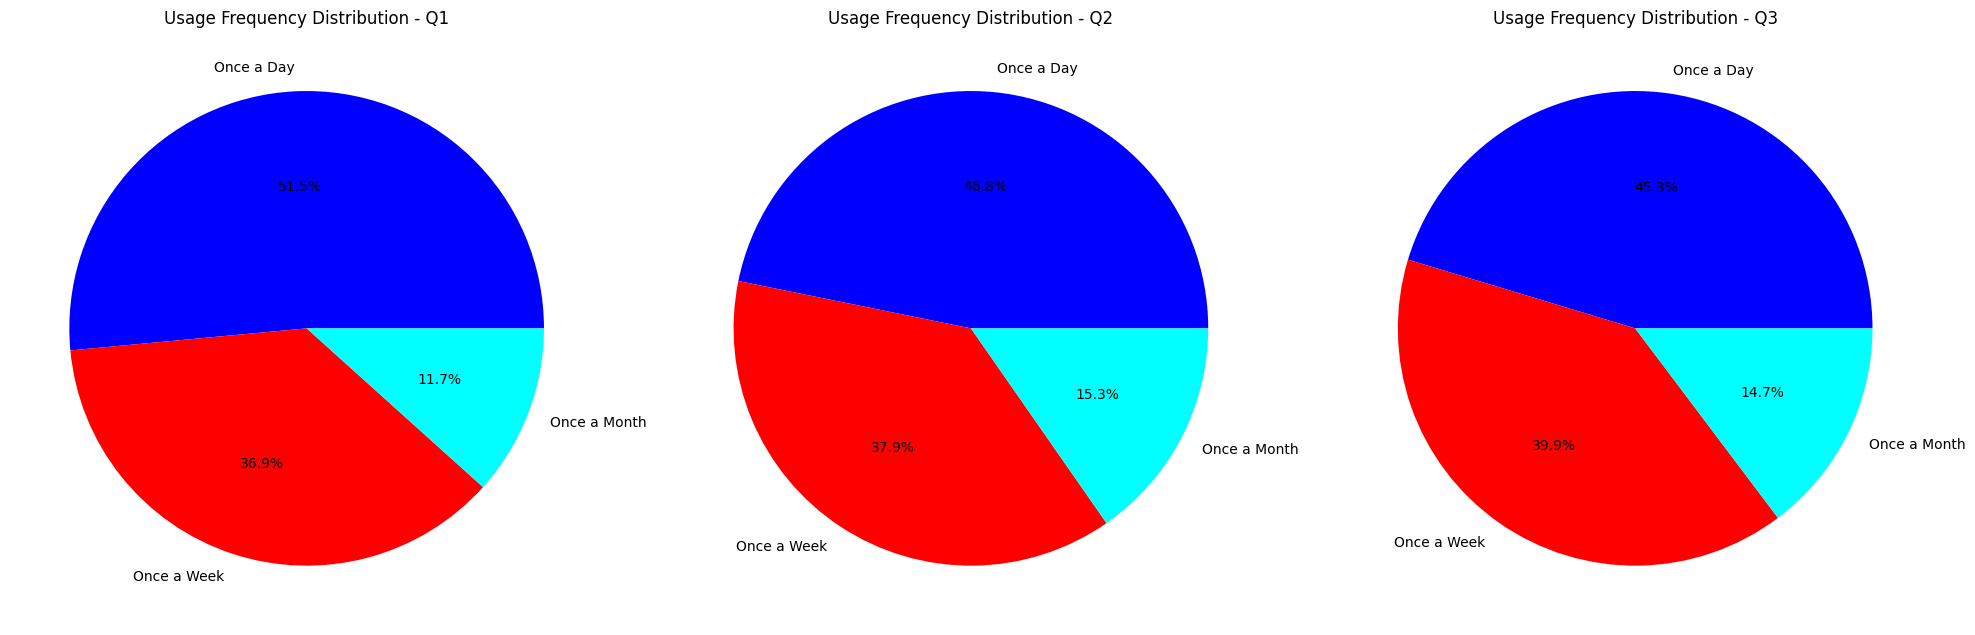

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))
quarter_1["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "red", "cyan"], ax=axes[0]
)
axes[0].set_title("Usage Frequency Distribution - Q1")
axes[0].set_ylabel("") 

quarter_2["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "red", "cyan"], ax=axes[1]
)
axes[1].set_title("Usage Frequency Distribution - Q2")
axes[1].set_ylabel("")

quarter_3["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "red", "cyan"], ax=axes[2]
)
axes[2].set_title("Usage Frequency Distribution - Q3")
axes[2].set_ylabel("")


plt.tight_layout()
plt.show()

✅ The answers of the question 'How frequently are you using our platform?' are analyzed independently for each quarters. And these pie charts are useful to analyze and undertand the changing in the trend.

**Key Observations:**
* 👎 People who use the program daily decreased from the first to second quarter.
* 😵‍💫 People who use once a month firstly increased a lot, but then it showed a slight decline
* 👎 People who use weekly incresed always between the quarters.
* 👍 Almost half of the people use the program everyday which is important for interactivity.
* 🤑 As a general the program is used frequently, almost everyday, but the trend shows that the frequncy of usage decreased.


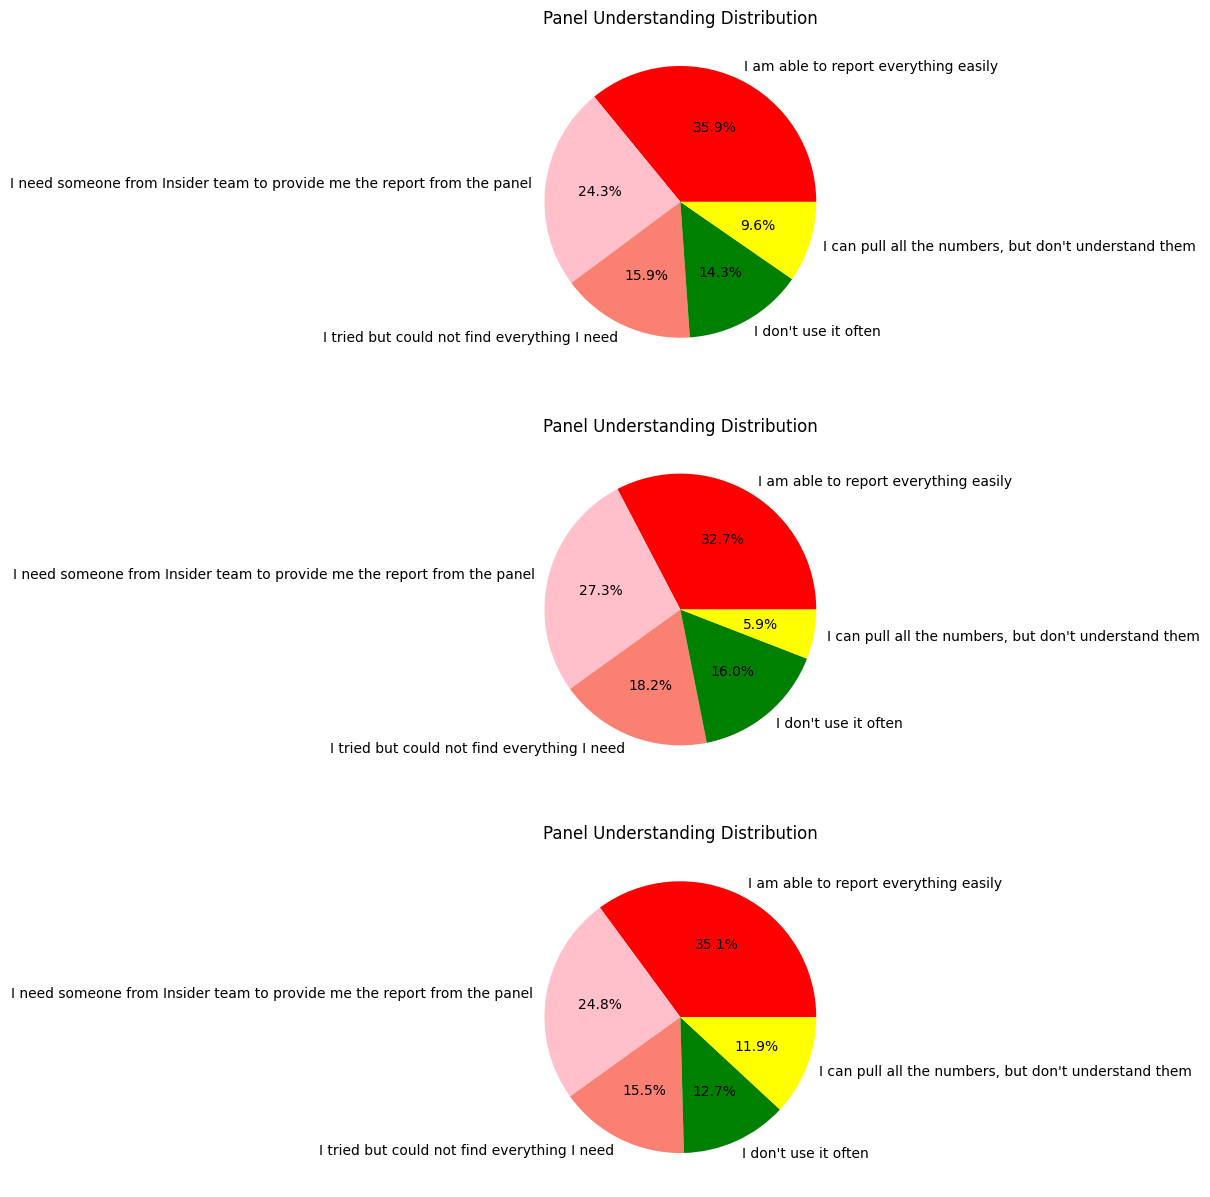

In [81]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

quarter_1["Please rate your understanding of our reporting capabilities in the panel"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["red", "pink", "salmon", "green", "yellow"], ax=axes[0]
)
axes[0].set_title("Panel Understanding Distribution")
axes[0].set_ylabel("") 

quarter_2["Please rate your understanding of our reporting capabilities in the panel"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["red", "pink", "salmon", "green", "yellow"], ax=axes[1]
)
axes[1].set_title("Panel Understanding Distribution")
axes[1].set_ylabel("") 

quarter_3["Please rate your understanding of our reporting capabilities in the panel"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["red", "pink", "salmon", "green", "yellow"], ax=axes[2]
)
axes[2].set_title("Panel Understanding Distribution")
axes[2].set_ylabel("") 


plt.show()

✅ The answers of the question 'Please rate your understanding of our reporting capabilities in the panel' are analyzed independently for each quarters. And these pie charts are useful to analyze and undertand the changing in the trend.

**Key Observations:**
* 👎 Number of people who can report everything easily is almost the third of the graph for each quarters. 
* 😵‍💫 Number of people who can report everything easily decreased from first to second quarter but for the third quarter it incresed importantly again.
* 👍 There is a homogenuous distribution of the answers.
* 👎 More than the two third of the people who uses report panel are struggling for reporting via panel.
* 👎 It is difficult to say that these graphs shows specific trend between quarters.
* ​😡​ As a general most of the people have problems with the reporting panel, so it is vital for the compony to fix problems related to the reporting panel for the future.


In [82]:
import matplotlib.dates as mdates

To be able to analyze the response dates, it is needed to change the type of the inputs from string(object) to date type. So, it is imported some needed libraries.

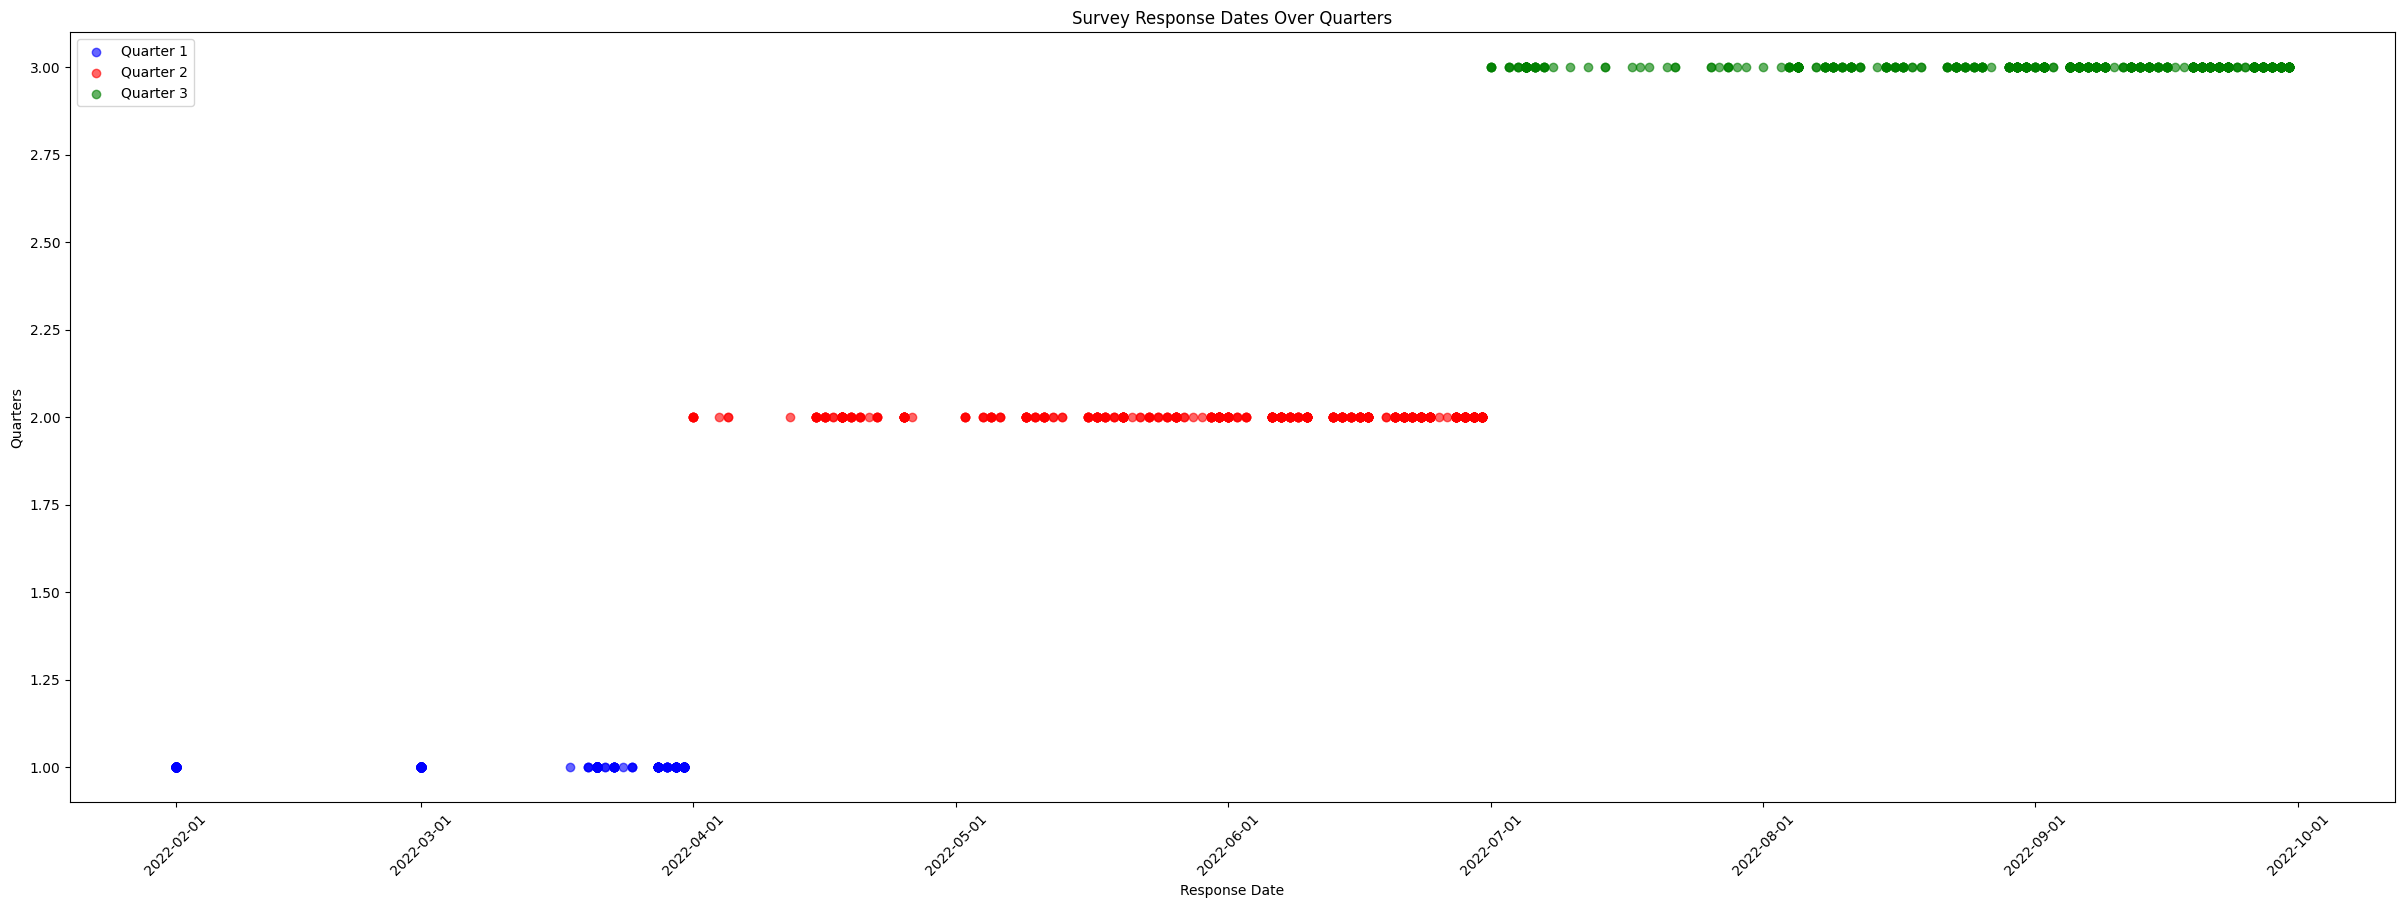

In [83]:
quarter_1.loc[:, 'Response Date'] = pd.to_datetime(quarter_1['Response Date'], errors='coerce')
quarter_2.loc[:, 'Response Date'] = pd.to_datetime(quarter_2['Response Date'], errors='coerce')
quarter_3.loc[:, 'Response Date'] = pd.to_datetime(quarter_3['Response Date'], errors='coerce')

plt.figure(figsize=(30, 10))


plt.scatter(quarter_1['Response Date'], [1] * len(quarter_1), color='blue', label='Quarter 1', alpha=0.6)
plt.scatter(quarter_2['Response Date'], [2] * len(quarter_2), color='red', label='Quarter 2', alpha=0.6)
plt.scatter(quarter_3['Response Date'], [3] * len(quarter_3), color='green', label='Quarter 3', alpha=0.6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Survey Response Dates Over Quarters')
plt.xlabel('Response Date')
plt.ylabel('Quarters')
plt.legend()

plt.xticks(rotation=45)

plt.show()

✅ The response dates of the survey are analyzed for each quarters. By using this graph we can determine that which user responded the survey earlier and which one later. And this scatter graph may help to better analyze and understand of changing in behaviour of users.

**Key Observations:**
* In the first quarter almost all of the users filled the survey in the last days.
* In the second and third quarters, the distribution of response dates are more homogenuos than the first one.
* ​🚨​ From this graph, as a general we can say that people's interest in the platform may have increased over the quarters, or the increase in problems experienced may have increased the desire to give this as feedback.

----

# 🕵️‍♂️ MORE DEEPLY ANALYSIS PART BY PART 🕵️‍♂️ #

* Panel rate's misunderstanding high point.
* Are The Customers who paid more interested in more to the platfrom?
* MRR vs Revenue
* Turkish Users

## Panel Rate's Issues: ##

As it is determined in the previous analysis steps, the rate of Panel usability is less than the other factors accourding to the results of the survey so that one can say that there is an important issue at the "Rate of the Panel Usability". So, know it will be analyzed deeper and detailed to be understand that what can be the potential reasons to this problem.

**Potential Factors:**
* Help Ticket Counts
* Help Ticket Lead Times

**Key Examinations:**
* The Relationship Between Help Ticket Count and Lead Time
* The Correlations Between Help Ticket and Panel Usability

In [84]:
filtered_panel = Survey[["Customer ID", "Please rate the usability of the panel"]]
filtered_panel.head()
len(filtered_panel)

1915

Since we were working on the panel first, the panel and id data were pulled.

In [85]:
filtered_panel = filtered_panel.groupby("Customer ID", as_index=False)["Please rate the usability of the panel"].mean()
len(filtered_panel)

634

Then, to be able to get more accurate information and correlation between other datasets, same customer ID's are eliminated by taking their mean values.

In [86]:
merged_panel = Help_Ticket.merge(filtered_panel, on="Customer ID", how="inner")
len(merged_panel)

merged_panel.head()

Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)  \
0  CRM-1516050                  9                            418   
1  CRM-1470950                 30                            366   
2  CRM-1526100                  4                           1206   
3  CRM-1506400                 22                            484   
4  CRM-1430550                  3                            467   

   Please rate the usability of the panel  
0                                5.000000  
1                                3.833333  
2                                3.750000  
3                                3.000000  
4                                4.000000

Now, we got the final data frame to use in the further analysis and correlations between 'Panel Usability Rate' and 'Help Ticket Count/Lead Time'.

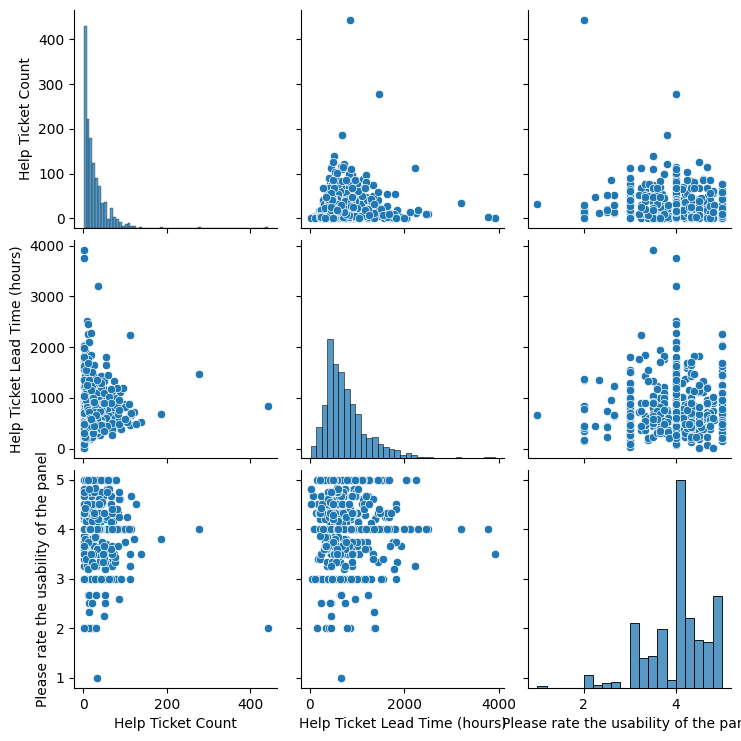

In [87]:
sns.pairplot(merged_panel.drop(columns=["Customer ID"]))
plt.show()

By using pairplot technique, we can examine and determine the relationships between each of the datas. Now, we will consider each graph indepently, except diagonal ones, to understand the behaviours.

**Observations:**

Help Ticket Count & Help Ticket Lead Time:
* Except some outliers, the result is consistent with the expected one. As the number of help ticket count decrease, the time needed to solve these tickets decreased too. But there are some tickets that take longer than normal values.

Help Ticket Count & Rate of Panel Usability:
* Again there are some outliers that people sent more than the average of help ticket count. But excpet these outliers the distribution of rest of the data clustered in the high-scoring region
* The important point is that people who sent absurd number of help tickets also rated low scores.

Help Ticket Lead Tİme & Rate of Panel Usability:
* There are some outliers that people spent more than casual time to fix their problems which can affect the answers of satisfaction of usability the panel.
* The difference of thes graphs from the others is the distribution of time spendings are more homogenuoes than the other grapghs, so we can easily say that most of the help tickets are solved over long periods of time.

In [88]:
avg_help_ticket_count = merged_panel["Help Ticket Count"].mean()
avg_help_ticket_lead_time = merged_panel["Help Ticket Lead Time (hours)"].mean()

top_5_help_ticket_count = merged_panel["Help Ticket Count"].nlargest(10)
top_5_help_ticket_lead_time = merged_panel["Help Ticket Lead Time (hours)"].nlargest(10)

top_5_help_ticket_count_rows = merged_panel.loc[merged_panel["Help Ticket Count"].nlargest(10).index]
top_5_help_ticket_lead_time_rows = merged_panel.loc[merged_panel["Help Ticket Lead Time (hours)"].nlargest(10).index]

print("Top 5 Help Ticket Count Rows:")
print(top_5_help_ticket_count_rows)

print("\nTop 5 Help Ticket Lead Time Rows:")
print(top_5_help_ticket_lead_time_rows)

Top 5 Help Ticket Count Rows:
     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)  \
17    CRM-150500                443                            844   
461   CRM-161600                277                           1470   
289   CRM-160150                186                            685   
240   CRM-998800                139                            516   
332   CRM-169100                127                            492   
316  CRM-1446600                121                            716   
189   CRM-316250                114                            659   
516  CRM-1459100                114                            694   
325  CRM-1283250                113                           2237   
71    CRM-558200                112                            456   

     Please rate the usability of the panel  
17                                 2.000000  
461                                4.000000  
289                                3.800000  
240            

For our merged dataset, at this point there are two important observations about outliers:

* If the first rows are examined for the outliers of help ticket counts it is consistent with the ratings of the panel usability. The rates are also low.
* On the other hand, if the second rows are examined the ratings are very high though the time spent to fix those help tickets are huge amounts. Also, the help ticket counts are not consistent with the time needed.

In [89]:
top_5_rows = merged_panel.loc[merged_panel["Help Ticket Count"].nlargest(10).index]

avg_help_ticket_count_before = merged_panel["Help Ticket Count"].mean()
avg_help_ticket_lead_time_before = merged_panel["Help Ticket Lead Time (hours)"].mean()
avg_panel_usability_before = merged_panel["Please rate the usability of the panel"].mean()

merged_panel_without_top_5 = merged_panel.drop(top_5_rows.index)

avg_help_ticket_count_after = merged_panel_without_top_5["Help Ticket Count"].mean()
avg_help_ticket_lead_time_after = merged_panel_without_top_5["Help Ticket Lead Time (hours)"].mean()
avg_panel_usability_after = merged_panel_without_top_5["Please rate the usability of the panel"].mean()

print(f"Average Help Ticket Count (Before): {avg_help_ticket_count_before}")
print(f"Average Help Ticket Count (After): {avg_help_ticket_count_after}")
print(f"Change in Help Ticket Count: {avg_help_ticket_count_after - avg_help_ticket_count_before}")

print(f"\nAverage Help Ticket Lead Time (Before): {avg_help_ticket_lead_time_before}")
print(f"Average Help Ticket Lead Time (After): {avg_help_ticket_lead_time_after}")
print(f"Change in Help Ticket Lead Time: {avg_help_ticket_lead_time_after - avg_help_ticket_lead_time_before}")

print(f"\nAverage Panel Usability Rating (Before): {avg_panel_usability_before}")
print(f"Average Panel Usability Rating (After): {avg_panel_usability_after}")
print(f"Change in Panel Usability Rating: {avg_panel_usability_after - avg_panel_usability_before}")

Average Help Ticket Count (Before): 26.863309352517987
Average Help Ticket Count (After): 24.157509157509157
Change in Help Ticket Count: -2.7058001950088304

Average Help Ticket Lead Time (Before): 756.7230215827338
Average Help Ticket Lead Time (After): 754.521978021978
Change in Help Ticket Lead Time: -2.2010435607558065

Average Panel Usability Rating (Before): 4.000881437706978
Average Panel Usability Rating (After): 4.007277312634455
Change in Panel Usability Rating: 0.006395874927477507


After elimination of outlier values from the merged list there are some important changes in the ratings of the usability of panel. Also, the number of help ticket counts and help ticket lead times are decreased too.


**NOTE: To analyze more accurately for the "Help Ticket Count" and "Help Ticket Lead Time", we need to continue analyzing those datasets independently. Because, this dataset contains only aroun 500 users, but the number of users for help ticket datas around 2000.**

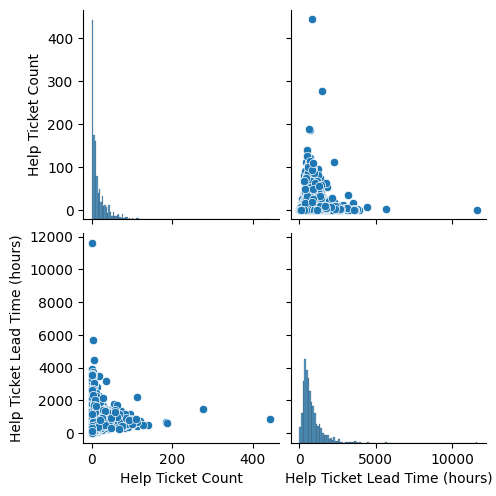

In [90]:
sns.pairplot(Help_Ticket.drop(columns=["Customer ID"]))
plt.show()

For the main dataset for the Help Ticket Numbers, the distribution is more homogenuous, but still it consist of some outliers in the graph. So, more calculations are done for the outliers. So in that way we can examine the behaviour of the distribution for both including and excluding scenerious of these outliers.

In [91]:
avg_help_ticket_count = Help_Ticket["Help Ticket Count"].mean()
avg_help_ticket_lead_time = Help_Ticket["Help Ticket Lead Time (hours)"].mean()

top_5_help_ticket_count = Help_Ticket["Help Ticket Count"].nlargest(10)
top_5_help_ticket_lead_time = Help_Ticket["Help Ticket Lead Time (hours)"].nlargest(10)

top_5_help_ticket_count_rows = Help_Ticket.loc[Help_Ticket["Help Ticket Count"].nlargest(10).index]
top_5_help_ticket_lead_time_rows = Help_Ticket.loc[Help_Ticket["Help Ticket Lead Time (hours)"].nlargest(10).index]

print("Top 10 Help Ticket Count Rows:")
print(top_5_help_ticket_count_rows)

print("\nTop 10 Help Ticket Lead Time Rows:")
print(top_5_help_ticket_lead_time_rows)

Top 10 Help Ticket Count Rows:
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
29     CRM-150500                443                            844
1101   CRM-161600                277                           1470
754    CRM-515000                188                            620
667    CRM-160150                186                            685
555    CRM-998800                139                            516
766    CRM-169100                127                            492
723   CRM-1446600                121                            716
401    CRM-316250                114                            659
1239  CRM-1459100                114                            694
756   CRM-1283250                113                           2237

Top 10 Help Ticket Lead Time Rows:
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
263    CRM-340500                  1                          11632
1179   CRM-665100                  4             

When the values in the larger data set were examined, the extreme values ​​tended to go to even more extreme points.

In [92]:
top_5_rows = Help_Ticket.loc[Help_Ticket["Help Ticket Count"].nlargest(10).index]

avg_help_ticket_count_before = Help_Ticket["Help Ticket Count"].mean()
avg_help_ticket_lead_time_before = Help_Ticket["Help Ticket Lead Time (hours)"].mean()

c_helpticket_without_top_5 = Help_Ticket.drop(top_5_rows.index)

avg_help_ticket_count_after = c_helpticket_without_top_5["Help Ticket Count"].mean()
avg_help_ticket_lead_time_after = c_helpticket_without_top_5["Help Ticket Lead Time (hours)"].mean()

print(f"Average Help Ticket Count (Before): {avg_help_ticket_count_before}")
print(f"Average Help Ticket Count (After): {avg_help_ticket_count_after}")
print(f"Change in Help Ticket Count: {avg_help_ticket_count_after - avg_help_ticket_count_before}")
print(f"\nAverage Help Ticket Lead Time (Before): {avg_help_ticket_lead_time_before}")
print(f"Average Help Ticket Lead Time (After): {avg_help_ticket_lead_time_after}")
print(f"Change in Help Ticket Lead Time: {avg_help_ticket_lead_time_after - avg_help_ticket_lead_time_before}")

Average Help Ticket Count (Before): 17.397951719092905
Average Help Ticket Count (After): 16.18349299926308
Change in Help Ticket Count: -1.2144587198298247

Average Help Ticket Lead Time (Before): 786.302852962692
Average Help Ticket Lead Time (After): 785.5143699336772
Change in Help Ticket Lead Time: -0.788483029014742


When examined according to these values, the differences between the values ​​after elimination were similar to the differences after the operation in the 'merged_panel' file.

**Key Findings:**

* The outliers in the datasets affect the real rating of the panel usage, after elimination there occurs a slight increase.
* Average help ticket counts are not extreme values which can possible seen, but the help ticket lead times are extremely large.
* For the outliers there some more extereme values for both ticket count and lead time.
* Some edge cases show that some people sent a lot of help tickets and some spent extremely large times on the reporting panel but the answer for the rating of usability of report panel were around 4.0/4.5 which is inconsistent situation for this cases.
* Also these inconsistincies are seen between help ticket count and help ticket lead time. There are some cases such as people sent only 1 - 10 tickets but they spent 3500 - 11000 hours to fix their issues.


**Conclusion:**

Using some visualizations, lots of inconsistencies are found durin analysis. After eliminating some outliers, the overall ratings for the panel usability increased slightly, so it showed that these outliers affect the real answers. Despite everything the number of lead times and their average values are extremely large for any arbitrary company and this times can lead to the users give less points to the panel usability than the other questions in the survey.

## Are The Customers Who Paid More Interested In More To The Platform? ##

💬This question occured when we observed the correlation between Newsletter Interaction Count,Help_Ticket Count and MRR.

💬If this scenerio is really happening we may organize some campaigns for the high MRR customers to attract them more to our company.

💬To be sure, we will analyze this question more because our correlation not very high,it just gives an opinion about those people.

*First of all let's begin with those datasets' correlation seperately to get more accurate correlation because with other parameters we may lose some customers' data.*

In [93]:
merged1 = MRR.merge(Help_Ticket, on = "Customer ID", how = "inner")

merged2 = MRR.merge(Newsletter, on = "Customer ID", how = "inner")

Firstly we merged 3 datasets seperately.

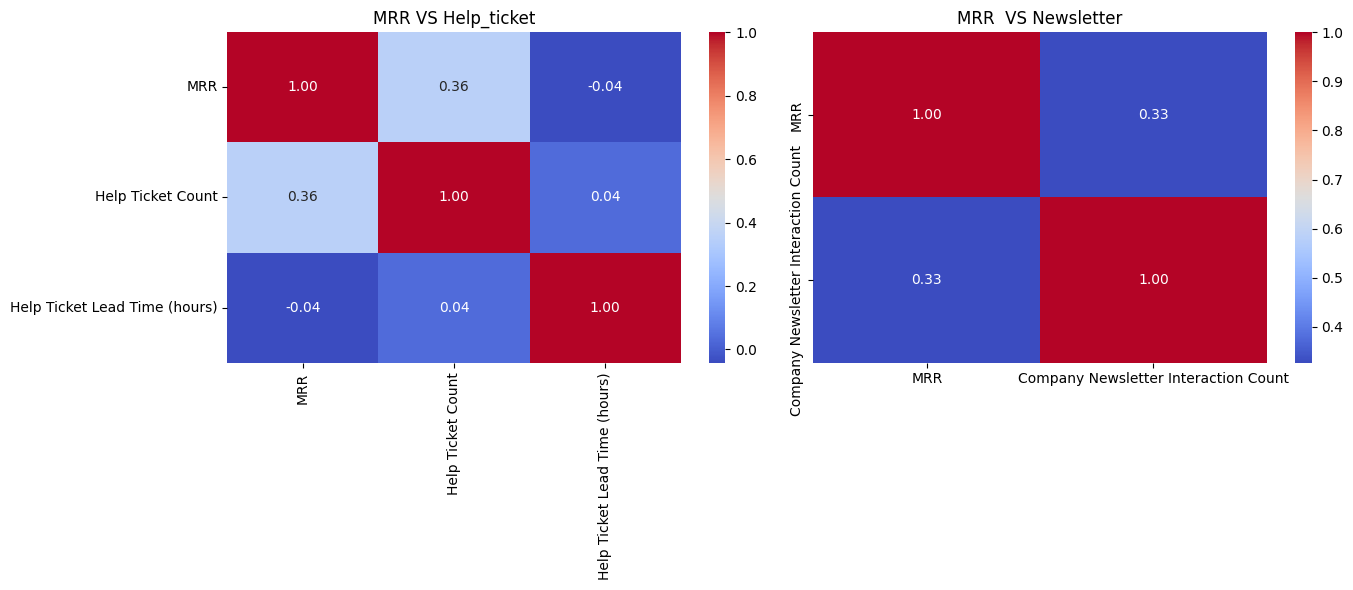

In [94]:
corr1 = merged1.corr(numeric_only=True)
corr2 = merged2.corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("MRR VS Help_ticket")


sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("MRR  VS Newsletter")


plt.tight_layout()
plt.show()

**Observations:**

* In EDA we found that the correlation between Help_Ticket Count and MRR was 0.36 which is the same with the results above, but between Company Newsletter Interaction Count and MRR was 0.42 which is higher than results above, so this seperated correlations can be counted as more trustable sources to us.
* Now we can consider about the outliers for especially in MRR to make clarifier about these correlations,because in the Handling Outliers parts we can easily notice that there are outliers which may affect our analysis.

In [95]:
len (MRR[MRR["MRR"] >= 25000])

16

Now we leave those 16 people we will come later on those people

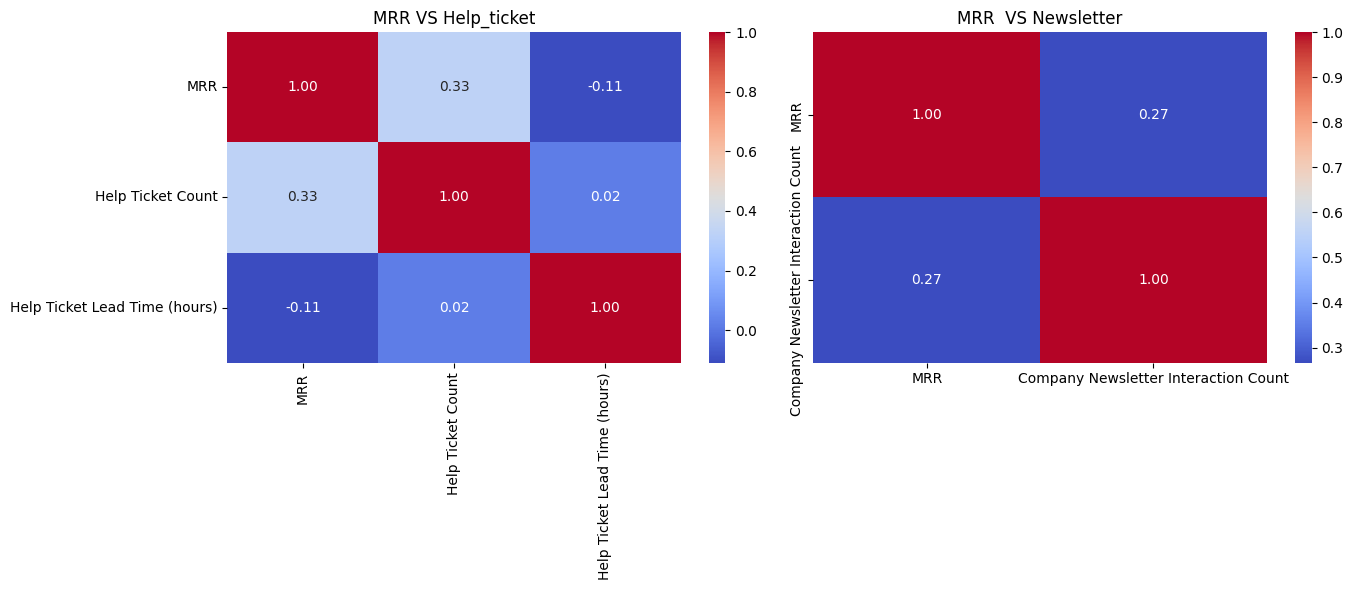

In [96]:
MRRC = MRR[MRR["MRR"] <= 25000]
merged1 = MRRC.merge(Help_Ticket, on = "Customer ID", how = "inner")

merged2 = MRRC.merge(Newsletter, on = "Customer ID", how = "inner")
corr1 = merged1.corr(numeric_only=True)
corr2 = merged2.corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("MRR VS Help_ticket")


sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("MRR  VS Newsletter")


plt.tight_layout()
plt.show()

✨We can conclude that just 16 person both Helpticket and Newsletter correlations has great impact it decreased first correlation 0.36 to 0.33 second 0.33 to 0.27.

✨Now we may seperate two groups in terms of money they paid to platform to be sure about difference characters due to this money.

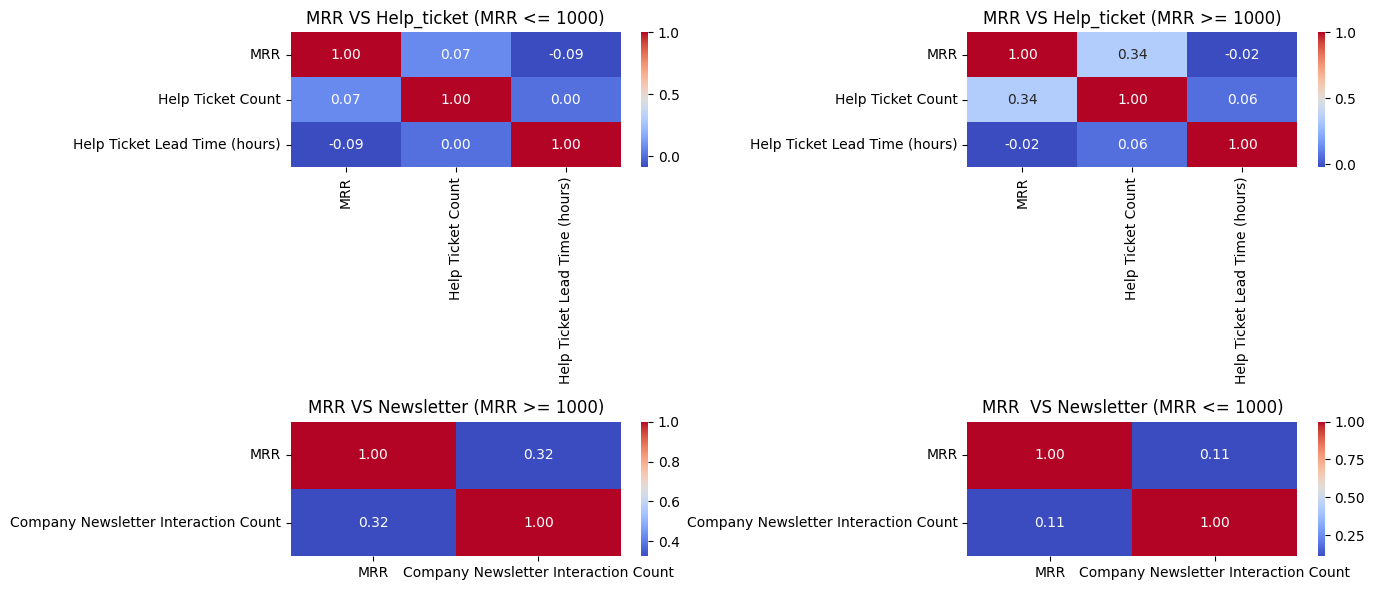

In [97]:
MRRC = MRR[MRR["MRR"] <= 1000]
MRRC2 = MRR[MRR["MRR"] >= 1000]

merged1 = MRRC.merge(Help_Ticket, on = "Customer ID", how = "inner")
merged2 = MRRC.merge(Newsletter, on = "Customer ID", how = "inner")
merged3 = MRRC2.merge(Help_Ticket, on = "Customer ID", how = "inner")
merged4 = MRRC2.merge(Newsletter, on = "Customer ID", how = "inner")

corr1 = merged1.corr(numeric_only=True)
corr2 = merged2.corr(numeric_only=True)
corr3 = merged3.corr(numeric_only=True)
corr4 = merged4.corr(numeric_only=True)
fig, axes = plt.subplots(2, 2, figsize=(14, 6))


sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0,0])
axes[0,0].set_title("MRR VS Help_ticket (MRR <= 1000)")

sns.heatmap(corr3, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0,1])
axes[0,1].set_title("MRR VS Help_ticket (MRR >= 1000)")

sns.heatmap(corr4, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1,0])
axes[1,0].set_title("MRR VS Newsletter (MRR >= 1000)")


sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("MRR  VS Newsletter (MRR <= 1000)")


plt.tight_layout()
plt.show()


We can conclude that:

🔇 Customers who paid less(1000$) to the company shows nothing valuable in terms of correlation between 2 parameters.

💰 Customers who paid more(1000$) to the company shows more consistent data in terms of correlations about these parameter so that we will continue our analysis with those people.

Now let's look at frequency percantages on different categorical customers in terms of MRR:

1st group = MRR<=200
2nd group = MRR<=1000
3rd group = MRR<=5000
4th group = MRR>= 5000

In [98]:
SM = MRR.merge(Survey,on = "Customer ID" , how = "inner")

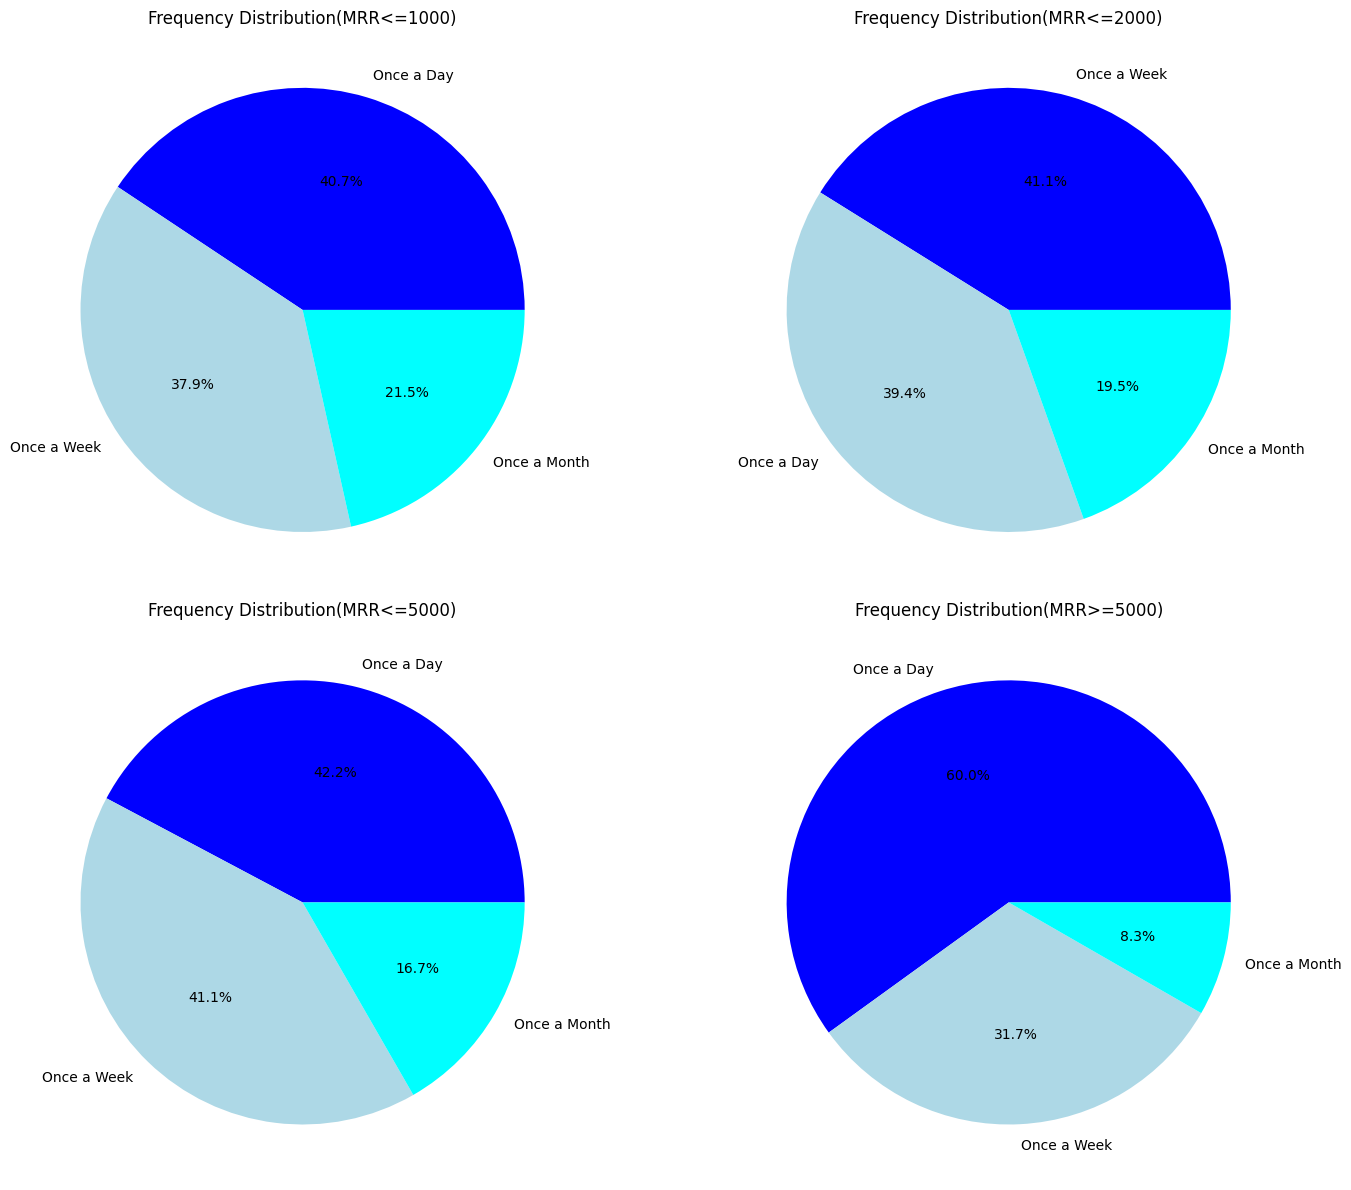

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

SM[SM["MRR"]<= 1000]["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "lightblue", "cyan"], ax=axes[0,0]
)
axes[0,0].set_title("Frequency Distribution(MRR<=1000)")
axes[0,0].set_ylabel("") 

SM[SM["MRR"]<= 2000]["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "lightblue", "cyan"], ax=axes[0,1]
)
axes[0,1].set_title("Frequency Distribution(MRR<=2000)")
axes[0,1].set_ylabel("")
SM[SM["MRR"]<= 5000]["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "lightblue", "cyan"], ax=axes[1,0]
)
axes[1,0].set_title("Frequency Distribution(MRR<=5000)")
axes[1,0].set_ylabel("") 

SM[SM["MRR"]>= 5000]["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["blue", "lightblue", "cyan"], ax=axes[1,1]
)
axes[1,1].set_title("Frequency Distribution(MRR>=5000)")
axes[1,1].set_ylabel("") 

plt.tight_layout()
plt.show()

**OBSERVATIONS:**

✅This analysis goes parallel with our insights because as you can see as MRR increase frequency of usage of customers are increasing in terms of Survey Results.

✏️But to be sure we need to find direct correlation between those parameters to do this we should convert these string answers to numeric value to do this we will assign:

* Once a day = 3
* Once a week = 2
* Once a month = 1

In [100]:
mapping = {"Once a Day" : 3, "Once a Week": 2,"Once a Month" : 1}
SM["frequency"] = SM["How frequently are you using our platform"].map(mapping)

In [101]:
SM["frequency"] = pd.to_numeric(SM["frequency"], errors="coerce")
SM["MRR"] = pd.to_numeric(SM["MRR"], errors="coerce")

In [102]:
SM.head()

Customer ID      MRR  Year  Quarter Survey Date Response Date  \
0  CRM-150500  17650.0  2022        1  2022-01-01    2022-02-01   
1  CRM-150500  17650.0  2022        2  2022-04-01    2022-06-28   
2  CRM-150500  17650.0  2022        3  2022-07-01    2022-08-05   
3  CRM-150500  17650.0  2022        1  2022-01-01    2022-02-01   
4  CRM-150500  17650.0  2022        2  2022-04-01    2022-04-18   

   How likely are you to recommend insider to a friend or colleague   \
0                                                  7                   
1                                                  7                   
2                                                  7                   
3                                                  8                   
4                                                  5                   

   How would you rate the value you gain from our company  \
0                                                  3        
1                                                  3        
2                                                  3        
3                                                  3        
4                                                  3        

  How frequently are you using our platform  \
0                                Once a Day   
1                                Once a Day   
2                                Once a Day   
3                                Once a Day   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                3   
1                                                3   
2                                                3   
3                                                4   
4                                                3   

   Please rate the usability of the panel  \
0                                     2.0   
1                                     2.0   
2                                     2.0   
3                                     2.0   
4                                     2.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0       I tried but could not find everything I need                          
1       I tried but could not find everything I need                          
2  I need someone from Insider team to provide me...                          
3                               I don't use it often                          
4                               I don't use it often                          

   frequency  
0          3  
1          3  
2          3  
3          3  
4          3

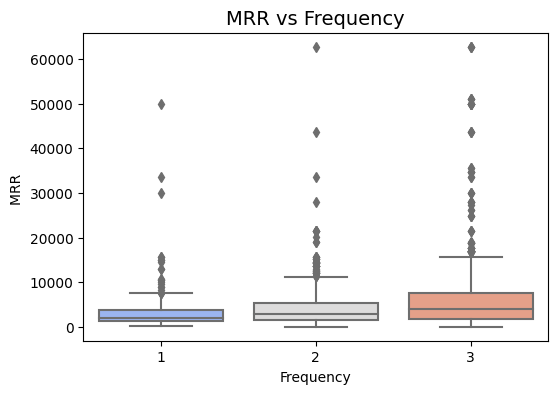

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="frequency", y="MRR", data=SM, palette="coolwarm")

plt.title("MRR vs Frequency", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("MRR ")
plt.show()

plt.show()

**Observations:**

✅ It is clear that higher usage frequency generally correlate with higher MRR by seeing boxplot graph , and previous correlation table for especially customers whose MRR >=1000 is consistent with our observations.

⏰However, to be %100 sure about correlation between interest and MRR we should think differently.We need to check another parameter called "Response date".

🙂‍↕️If the difference between Survey date and Response date is a little in customers who paid more MRR we can conclude that higher MRR decreases the response delay time which may mean that customers whose MRR higher are really willing to answer some platform survey which also indicates their interest at platform.

In [104]:
print(quarter_1["Response Date"].dtypes)

datetime64[ns]


In [105]:
Survey.loc[:, "response delay"] = (Survey["Response Date"] - Survey["Survey Date"]).dt.days


Survey.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1                               I don't use it often                          
2  I need someone from Insider team to provide me...                          
3       I tried but could not find everything I need                          
4  I need someone from Insider team to provide me...                          

   response delay  
0              56  
1              88  
2              83  
3              91  
4              83

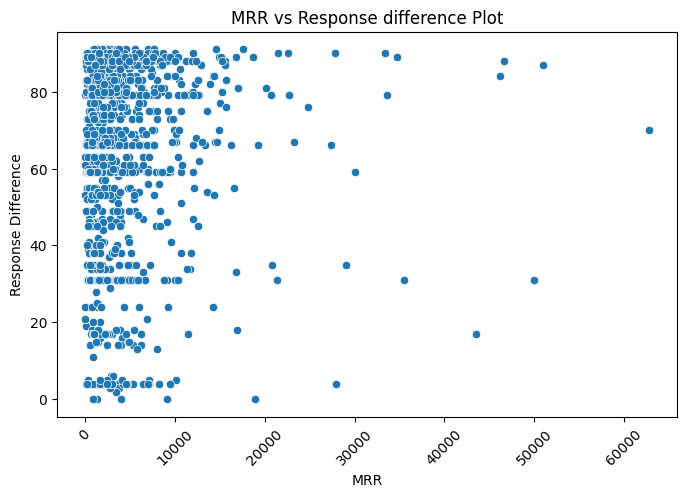

In [106]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=MRR["MRR"], y=Survey["response delay"])
plt.xlabel("MRR")
plt.ylabel("Response Difference")
plt.title("MRR vs Response difference Plot")
plt.xticks(rotation=45)
plt.show()

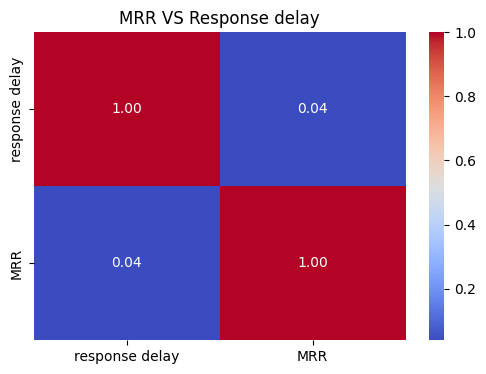

In [107]:
merged = Survey.merge(MRR,on = "Customer ID",how = "inner")
corr = merged[["response delay","MRR"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("MRR VS Response delay")
plt.show()

**Since we didn't get any correction from those correlations due to the low variance of response delay value(excluding outliers) we can conclude that response delay of overall company is nearly same and very little so we may think about it as a positive result.**

Finally we need to check correlation between Help_ticket, Newsletter and Age because the results that we observed before may be misconduct us which means maybe Customers who aged more in the platform use help_ticket system or newsletters more as naturally:

* If we get high correlation -> There is no any correlation between MRR and those values.
* If we get less correlation -> There may be correlation between MRR and those values, but we are not sure about it.

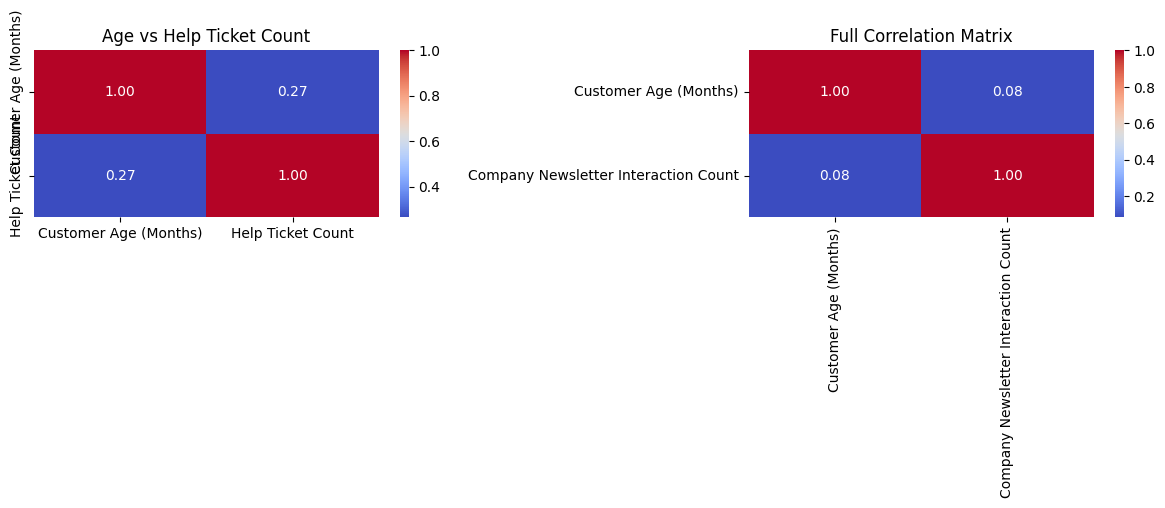

In [108]:
merged = Age.merge(Help_Ticket,on = "Customer ID",how = "inner")
corr1 = merged[["Customer Age (Months)","Help Ticket Count"]].corr()
merged2 = Age.merge(Newsletter,on = "Customer ID" , how = "inner")
corr2 =  merged2[["Customer Age (Months)", "Company Newsletter Interaction Count"]].corr()

fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Age vs Help Ticket Count")

sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Full Correlation Matrix")
plt.tight_layout()
plt.show()

**As we expected there are correlations for especially between help_ticket and age.However these numbers doesn't show anything against our arguement because 0.27 or 0.08 both natural numbers because age and those values naturally must have little correlation naturally.**

**Final Conclusion about the Question.**

* In our hands we have only 4 data which may indicate interest to company:
    * Help Ticket
    * Newsletter Interaction Count
    * Usage Frequency (Strongest)
    * Response Delay(Weakest)
* Help Ticket and Newsletter Interaction count has not weak correlation with MRR for especially the customers with MRR >= 1000$(Those customers are more consistent with the trends,they generally shows more their group features), also those values' correlation with Age is normal or below the normal but not high correlation which cannot mask the correlation between the desired values.

* Usage Frequency is the main part of our analysis because it is the only data which indicates directly the interest ,and this value shows nice correlation with MRR values,and this strengthen our hands to justify our hypothesis,again generally customers whose MRR is above some limit number are more consistent with their groups and parameters.

* Response Delay doesn't show anything about the question ,but this one is already weakest argument we have so that we can ignore it.

* Overall,MRR has obvious correlation (strong or not we are not sure) with the interest on the platform and this correlation may be occured due to these reasons:

  * Customer who loves and uses more platform are likely to tend pay,invest or make transactions.
  * Customer who paid more on the platform, may retain it's money by making revenue so that they keep paying more


We will learn the answers for 2nd question in our next analysis, but it doesn't matter which one is more true in our context.We just know that it is strongly or weakly true that high MRR generally creates high usage which can be interpreted as high interest to the platform.


**Reccomendations for the future:**

* As we can easily detect customers that pay more than some number has more consistent correlation with our platform indices, so that we may create some campaign whose focus on the customers who pay more than some specific number (which can be calculated with some math,programmes and company expectations).
* This campaign may include some advantages or simplicity for their transactions.
* We should organize such a campaign because as I said those customers form our core in terms of MRR,usage frequency and correlations with other values.
* Furthermore, we should create some campaigns for low MRR customer's to ,but in different way.We should encourage them to pay more and spend time more,to do this we may create some discounts for items or organize some fun activity to keep them on the platform more.


## Total Revenue vs. MRR ##

At this step we start examining one of the most important concepts which helps to predict and understand the financial movements in the future by looking at the datas for "Total Revenue" and "MRR".

**Key Examinations:**

* The relationships between MRR and Total Revenue
* Other factors that can affect Total Revenue
* Other factors that can affect MRR

In [109]:
print(len(MRR))
print(len(Revenue))

1380
901


Since the available users for each datasets are different we need to find an approrpriate approache to get more accuracy.

Steps:

* Analyzing The Intersection set for MRR and Total Revenue
* Analyzing Independently Each Dataset
* Using Elimination of Outliers and Comparison of Them

In [110]:
merged_set = MRR.merge(Revenue, on="Customer ID", how="inner")
len(merged_set)

merged_set.head()
print(merged_set['Total Revenue'].dtype)
merged_set['Total Revenue'] = pd.to_numeric(merged_set['Total Revenue'], errors='coerce')

float64


The number of datas in the merge of MRR and Total Revenue is very close to the number of datas in the Total Revenue. One can say that examination of merged set gives almost the same information as MRR dataset gives.

In [111]:
merged_set.head()

Customer ID      MRR  Total Revenue
0  CRM-673950   4950.0       402101.0
1  CRM-683100    600.0          199.0
2  CRM-150500  17650.0    175293442.0
3  CRM-701050   1350.0         2037.0
4  CRM-730800   2125.0            0.0

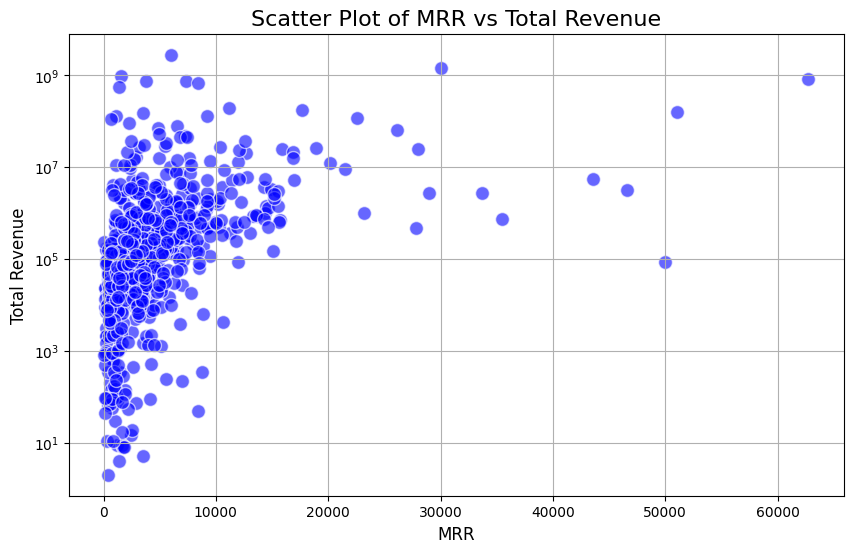

In [112]:
x = merged_set["MRR"]
y = merged_set["Total Revenue"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', edgecolors='w', s=100)
plt.yscale('log')
plt.title('Scatter Plot of MRR vs Total Revenue', fontsize=16)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

plt.grid(True)
plt.show()

To be able to show the relation between MRR and Total Revenue the scatter graph is used as a visualization. The y-axis was adjusted by calculating on the 10-point system.

**Key Observation:**

* Most of the MRR is clustered between 0 and 10000
* The distribution of the total revenue is more homogenuous than the MRR.
* The values of Total Revenue are very large numbers, so they are shown in multiples of 10
* There are some outliers for the MRR which breaks the homogeneity

In [113]:
avg_mrr = merged_set["MRR"].mean()
avg_total_revenue = merged_set["Total Revenue"].mean()

top_10_mrr = merged_set["MRR"].nlargest(10)
top_10_total_revenue = merged_set["Total Revenue"].nlargest(10)

print(f"Average MRR: {avg_mrr}")
print(f"Average Total Revenue: {avg_total_revenue}")

print("\nTop 10 MRR values:")
print(top_10_mrr)

print("\nTop 10 Total Revenue values:")
print(top_10_total_revenue)

Average MRR: 4314.159598214285
Average Total Revenue: 12661335.32142857

Top 10 MRR values:
512    62732.0
815    51000.0
292    49980.0
164    46606.0
196    46206.0
331    43559.0
143    35506.0
188    33650.0
886    30014.0
312    29012.0
Name: MRR, dtype: float64

Top 10 Total Revenue values:
26     2.789805e+09
886    1.438623e+09
43     9.408143e+08
512    8.209644e+08
147    7.402623e+08
178    7.394852e+08
317    6.865565e+08
598    5.606777e+08
310    1.903592e+08
2      1.752934e+08
Name: Total Revenue, dtype: float64


If the average values and the largest 10 values are examined, then one can easiyle determine that there are lots of extreme values that can affect the distribution and the accuracy of the dataset.

**Observations:**

* The top ten values of MRR are 15 times larger than the average.
* The top ten values of Total Revenue are around 200 times larger than the average.


**To get better analyze we need to apply outliers detection!**

In [114]:
Q1_mrr = merged_set['MRR'].quantile(0.25)
Q3_mrr = merged_set['MRR'].quantile(0.75)

Q1_revenue = merged_set['Total Revenue'].quantile(0.25)
Q3_revenue = merged_set['Total Revenue'].quantile(0.75)

IQR_mrr = Q3_mrr - Q1_mrr
IQR_revenue = Q3_revenue - Q1_revenue

lower_bound_mrr = Q1_mrr - 1.5 * IQR_mrr
upper_bound_mrr = Q3_mrr + 1.5 * IQR_mrr

lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_mrr = merged_set[(merged_set['MRR'] < lower_bound_mrr) | (merged_set['MRR'] > upper_bound_mrr)]
outliers_revenue = merged_set[(merged_set['Total Revenue'] < lower_bound_revenue) | (merged_set['Total Revenue'] > upper_bound_revenue)]

cleaned_data = merged_set[(merged_set['MRR'] >= lower_bound_mrr) & (merged_set['MRR'] <= upper_bound_mrr) &
                          (merged_set['Total Revenue'] >= lower_bound_revenue) & (merged_set['Total Revenue'] <= upper_bound_revenue)]

To detect outliers using IQR, we define outliers as values that lie significantly outside the range defined by the quartiles. These extreme values are typically considered unusual or unexpected.

Calculate the Lower and Upper Boundaries: The lower and upper boundaries are calculated by extending the IQR from Q1 and Q3:

* Lower Bound: Q1 - 1.5 * IQR

* Upper Bound: Q3 + 1.5 * IGR

The constant 1.5 is a common threshold used to identify potential outliers. Values outside these boundaries are considered outliers.

Find Outliers: Any data point below the lower bound or above the upper bound is considered an outlier.

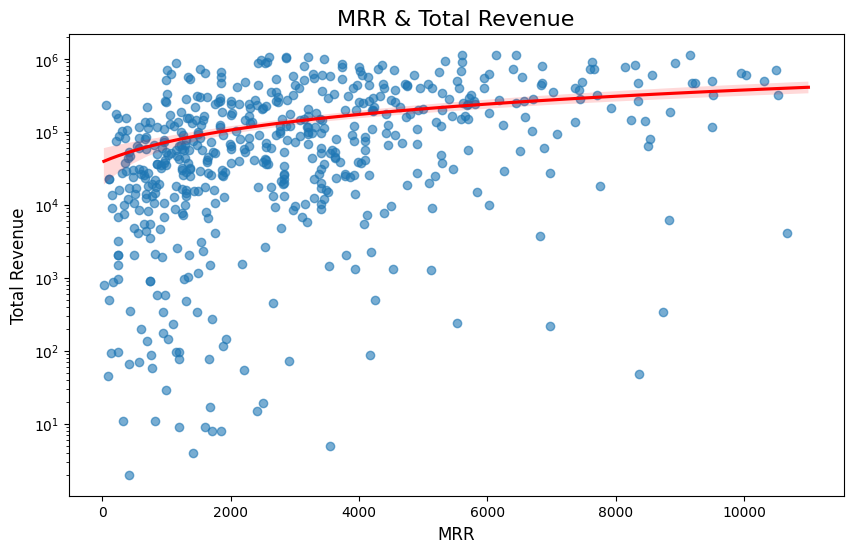

In [115]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MRR', y='Total Revenue', data=cleaned_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('MRR & Total Revenue', fontsize=16)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

plt.yscale('log')

plt.show()

After outlier detection and cleaning, the new scatter graph is created using new datas. Again y-axis is arranged by using the multiples of 10.

**Observations:**

* This time the distirbutions over the graph is more homogenous.
* Above the 10^4 of total revenue, more obvious trend is beginning to emerge.
* After the 2000 for MRR the trend become linear trend.

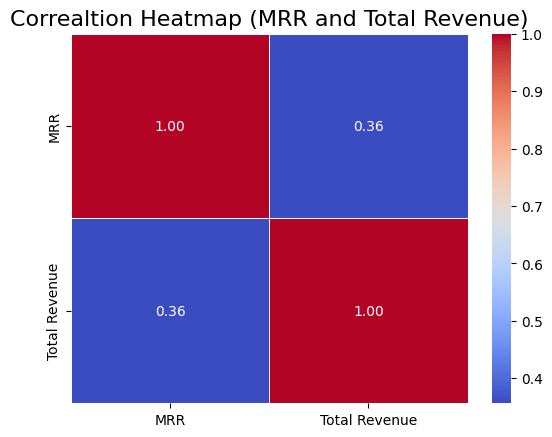

In [116]:
mrr_total_revenue_data = cleaned_data[["MRR", "Total Revenue"]]

correlation_matrix = mrr_total_revenue_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correaltion Heatmap (MRR and Total Revenue)', fontsize=16)

plt.show()

To be able to show a more obvious evidence to prove the trend occured in the previous scatter graph the heatmap is used. The correlation value is '0.36' which is moderately positive relationship. So after eliminating the outliers from the dataset, one can easily determine the correaliton and relationship between MRR and Total Revenue.

In [117]:
len(cleaned_data)

730

Since after the cleaning the data there occurs a data loss, we need to examine and compare the datasets before and after the cleaning.

In [118]:
avg_cleaned_mrr = cleaned_data["MRR"].mean()
avg_cleaned_total_revenue = cleaned_data["Total Revenue"].mean()

top_10_cleaned_mrr = cleaned_data["MRR"].nlargest(10)
top_10_cleaned_total_revenue = cleaned_data["Total Revenue"].nlargest(10)

print(f"Average MRR (cleaned_data): {avg_cleaned_mrr}")
print(f"Average Total Revenue (cleaned_data): {avg_cleaned_total_revenue}")

print("\nTop 10 MRR values (cleaned_data):")
print(top_10_cleaned_mrr)

print("\nTop 10 Total Revenue values (cleaned_data):")
print(top_10_cleaned_total_revenue)

Average MRR (cleaned_data): 2862.3
Average Total Revenue (cleaned_data): 135615.25342465754

Top 10 MRR values (cleaned_data):
839    11000.0
125    10695.0
266    10692.0
851    10671.0
855    10670.0
231    10526.0
769    10500.0
212    10311.0
478    10194.0
829    10027.0
Name: MRR, dtype: float64

Top 10 Total Revenue values (cleaned_data):
446    1148125.0
362    1143413.0
551    1140332.0
359    1127507.0
84     1072522.0
90     1069502.0
846    1061074.0
23     1035000.0
407     991046.0
413     966196.0
Name: Total Revenue, dtype: float64


After cleaned the datas, the top 10 values for each set and each category are more consistent to analyze and better values.

In [119]:
avg_merged_mrr = merged_set["MRR"].mean()
avg_merged_total_revenue = merged_set["Total Revenue"].mean()

top_10_merged_mrr = merged_set["MRR"].nlargest(10)
top_10_merged_total_revenue = merged_set["Total Revenue"].nlargest(10)

print(f"\nAverage MRR (merged_set): {avg_merged_mrr}")
print(f"Average Total Revenue (merged_set): {avg_merged_total_revenue}")

print("\nTop 10 MRR values (merged_set):")
print(top_10_merged_mrr)

print("\nTop 10 Total Revenue values (merged_set):")
print(top_10_merged_total_revenue)


Average MRR (merged_set): 4314.159598214285
Average Total Revenue (merged_set): 12661335.32142857

Top 10 MRR values (merged_set):
512    62732.0
815    51000.0
292    49980.0
164    46606.0
196    46206.0
331    43559.0
143    35506.0
188    33650.0
886    30014.0
312    29012.0
Name: MRR, dtype: float64

Top 10 Total Revenue values (merged_set):
26     2.789805e+09
886    1.438623e+09
43     9.408143e+08
512    8.209644e+08
147    7.402623e+08
178    7.394852e+08
317    6.865565e+08
598    5.606777e+08
310    1.903592e+08
2      1.752934e+08
Name: Total Revenue, dtype: float64


**Key Findings:**

* After cleaning datas there happened important amount of changes.
* Especially for Total Revenue, the changing in the average can significantly affect the analysis correlations.
* After a point, the trend starts to become visible. So, one can say that above some point which is a very large numbers, after 10^4 for total revenue, the positive linear relation occurs.
* For the raw dataset, it is not possible to find the relation between Total Reveneue and MRR. So, for all users we should not make definitve comments.
* There are important number of people which is counted as outlier in the dataset. Some of them are extremeley large numbers, some of them 0's


**Conclusion:**

When the data in the data set was analyzed, the first thing that stood out was that there were many extreme numbers and that these extreme numbers were randomly distributed without any relationship. However, when these outliers were cleaned and analyzed, we observed that a visible trend had formed. However, it would be beneficial for the company to interpret these outlier values ​​separately and pay special attention to these people, because it should not be forgotten that there are significant values ​​in total revenue amounts that cannot be thrown away.

## Status & Level Examination ##

In this part we will examine and analyze the datasets of 'Status' and 'Level'. Further analysis may consists of the relations between other datasets.

**Key Examinations:**

* Individual Examinations of Status and Level
* Correlations Between Status and Level
* Relations Between Other Datasets

In [120]:
print(StatusLevel.head())

print(StatusLevel.info())

   Customer ID      Status   Customer Level
0  CRM-1471650  Onboarding       Enterprise
1  CRM-1516050  Onboarding        Long-tail
2  CRM-1087300       Churn  Semi-Enterprise
3  CRM-1467150       Churn  Semi-Enterprise
4   CRM-230550       Churn        Long-tail
<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     2650 non-null   object
 1   Status          2650 non-null   object
 2   Customer Level  2650 non-null   object
dtypes: object(3)
memory usage: 82.8+ KB
None


Before starting analyses we should keep on mind that the types of datas are objects so we cannot perform numerical analysis on this dataset. One of the best ways is using frquencies.

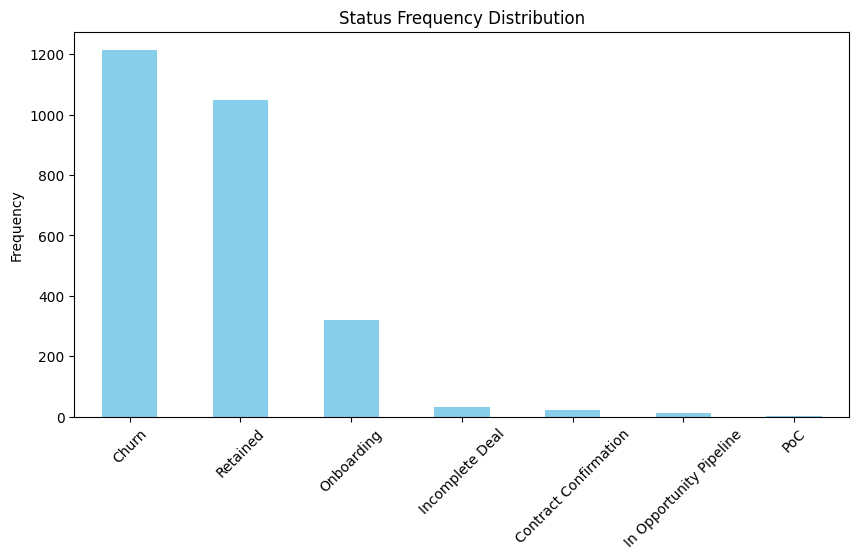

In [121]:
value_counts = StatusLevel["Status"].value_counts()
value_counts.plot(kind="bar", color='skyblue', figsize=(10,5))

plt.title("Status Frequency Distribution")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks(rotation=45) 
plt.show()

In [122]:
value_counts = StatusLevel["Status"].value_counts()
print(value_counts)

Status
Churn                      1214
Retained                   1050
Onboarding                  320
Incomplete Deal              31
Contract Confirmation        21
In Opportunity Pipeline      12
PoC                           2
Name: count, dtype: int64


✅ For visualization, the bar graph is used to show the distribuiton of the frequencies of each category in the status column. Also, for interpretation the exact numbers of each category are listed for analysis.

**Key Observations:**

* Most of the status datas are 'churn' which is a very important amount especially in such a big dataset.
* 'Retained' type status is also have important amount of proportion after the 'Churn'.
* Rest of the datas do not have an important effect on the distribuiton, especially last 4 one can be counted as 0.
* **As a general first observation, the current state of this platform in terms of status levels does not look very encouraging.**

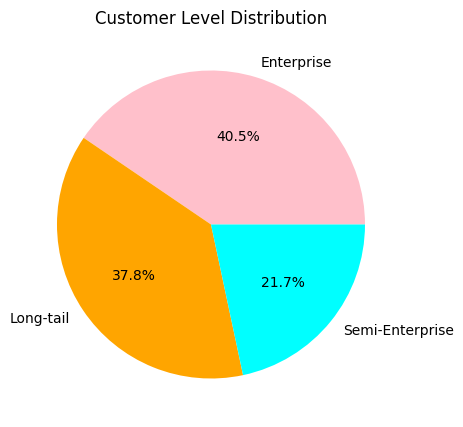

In [123]:
StatusLevel["Customer Level"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=["pink", "orange", "cyan"], figsize=(10,5)
)

plt.title("Customer Level Distribution")
plt.ylabel("")
plt.show()

✅ The pie-chart is created in order to show the distribution of the Customer Levels of the users in this platform.

**Key Observations:**

* The largest proportion belongs to Enterprise which is around 1000 people.
* The lowest amount belongs to the Semi-Enterprise.
* The general distribution of each customer level is homogenuous.
* **As a first observation, it shows that large-scale and long-term companies have a significant share in this platform.**

In [124]:
summary = StatusLevel.groupby(['Status', 'Customer Level']).size().reset_index(name='Count')

print(summary)

                     Status   Customer Level  Count
0                     Churn       Enterprise    237
1                     Churn        Long-tail    728
2                     Churn  Semi-Enterprise    249
3     Contract Confirmation       Enterprise      7
4     Contract Confirmation        Long-tail      7
5     Contract Confirmation  Semi-Enterprise      7
6   In Opportunity Pipeline       Enterprise      3
7   In Opportunity Pipeline        Long-tail      5
8   In Opportunity Pipeline  Semi-Enterprise      4
9           Incomplete Deal       Enterprise     11
10          Incomplete Deal        Long-tail     12
11          Incomplete Deal  Semi-Enterprise      8
12               Onboarding       Enterprise    194
13               Onboarding        Long-tail     62
14               Onboarding  Semi-Enterprise     64
15                      PoC       Enterprise      2
16                 Retained       Enterprise    619
17                 Retained        Long-tail    189
18          

**Basic Observations:**

* Most of the churn's are 'Long-Tail'
* For the Contract Confirmation, there is a perfectly homogenuous distirbution.
* Again for In Oppurtinity Pipeline, the distributions are very similar
* Retained ones are more likely to become Enterprise
* Status PoC only have Enterprise
* Onboardins are more likely to become Enterprise

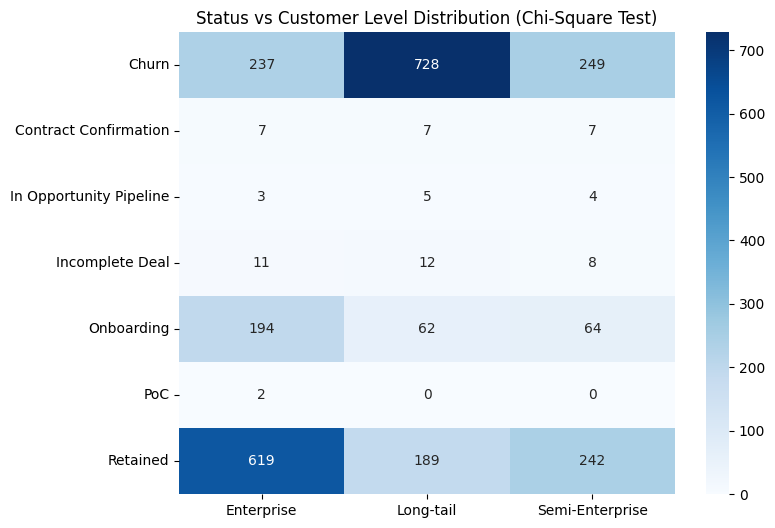

In [125]:
crosstab = pd.crosstab(StatusLevel["Status"], StatusLevel["Customer Level"])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)


plt.title("Status vs Customer Level Distribution (Chi-Square Test)")
plt.xlabel("")
plt.ylabel("")
plt.show()

✅ By using chi-square test we created the crosstab graph to determine the correlations between Status and Customer Level.

**Key Observations:**

* There are two strong correlations: Retained - Enterprise & Churn - Long Tail
* There are some weak correlations too.
* For all customer levels there is a correlation between churn which implies that the loss of customers occur for every level.
* PoC status is at negligable level but they are in Enterprise level.

**Expectations:**

* The greater loyalty of enterprise customers may be an indication that better support and service is provided to Enterprise level customers.
* High losses in the long-tail category may mean that deals with lower-income customers may be unsustainable or offer lower quality service.

**Conclusion:**

The fact that the largest share in the charts is in the churn category shows that this platform has a tendency to lose customers according to the data we have and may pose a risk for the future. But on the other hand, it is a promising scale that larger-scale and longer-term companies also tend to be more loyal to the platform.

***Help Ticket & Status - Level***

Now, to become more specific and find any evidence that can help us to prove our expectations we will examine with other datasets.

In [126]:
merged_df = pd.merge(StatusLevel, Help_Ticket[['Customer ID', 'Help Ticket Count', 'Help Ticket Lead Time (hours)']], on='Customer ID', how='inner')

merged_df.head()

Customer ID      Status   Customer Level  Help Ticket Count  \
0  CRM-1516050  Onboarding        Long-tail                  9   
1  CRM-1467150       Churn  Semi-Enterprise                  8   
2  CRM-1470950    Retained       Enterprise                 30   
3  CRM-1526100    Retained  Semi-Enterprise                  4   
4  CRM-1506400    Retained       Enterprise                 22   

   Help Ticket Lead Time (hours)  
0                            418  
1                            382  
2                            366  
3                           1206  
4                            484

In [127]:
len(merged_df)

1367

According to the customer ID's we merged two datasets to find the intersection set. In this way it will be easier to analyze datas. Also, their length has important amount of users.

In [128]:
merged_df['Average Help Ticket Time per Count'] = merged_df['Help Ticket Lead Time (hours)'] / merged_df['Help Ticket Count']

merged_df = merged_df.drop(columns=['Help Ticket Lead Time (hours)', 'Help Ticket Count'])

merged_df.head()

Customer ID      Status   Customer Level  \
0  CRM-1516050  Onboarding        Long-tail   
1  CRM-1467150       Churn  Semi-Enterprise   
2  CRM-1470950    Retained       Enterprise   
3  CRM-1526100    Retained  Semi-Enterprise   
4  CRM-1506400    Retained       Enterprise   

   Average Help Ticket Time per Count  
0                           46.444444  
1                           47.750000  
2                           12.200000  
3                          301.500000  
4                           22.000000

By dividing the help ticket lead times with help ticket counts we found the average times that taken for those help tickets. This method may help us whether show the distributions.

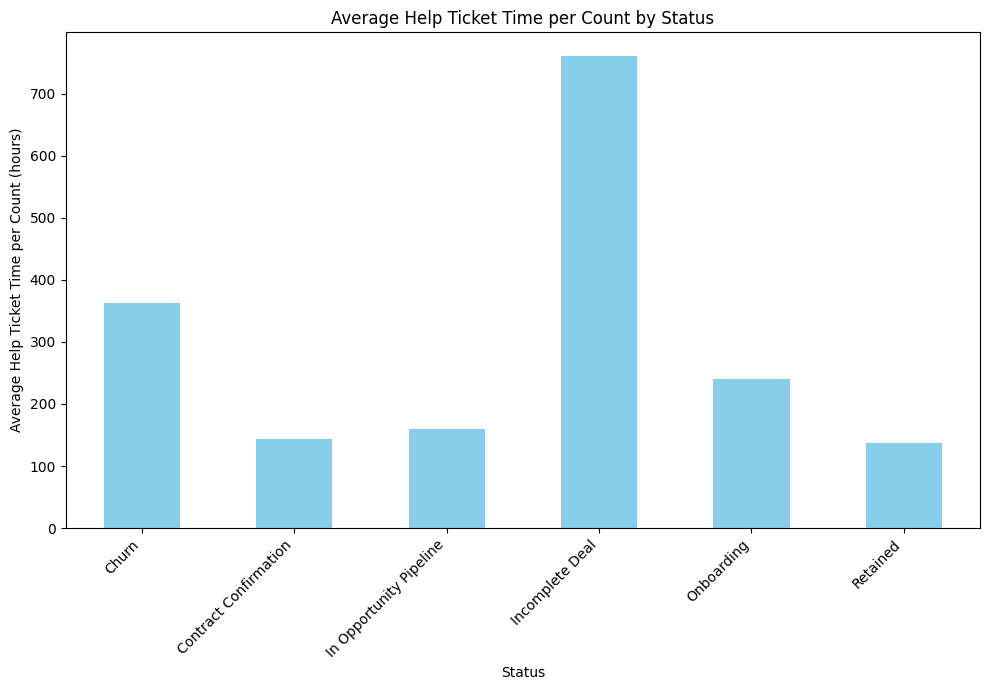

In [129]:
status_avg_time = merged_df.groupby('Status')['Average Help Ticket Time per Count'].mean()

status_avg_time.plot(kind='bar', color='skyblue', figsize = (10,7))

plt.title('Average Help Ticket Time per Count by Status')
plt.xlabel('Status')
plt.ylabel('Average Help Ticket Time per Count (hours)')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()  
plt.show()

✅Using bar graph, the distributions of Average Help Ticket Time per Count are found over the status categories.

**Key Observations:**

* For incomplete deals the time needed to fix the help tickets are much larger than other status.
* Help ticket resolution times are almost twice as long for churn as for retained

**CONCLUSION / PROOF**

🚨 Faster resolution of help tickets means better service. In line with the expectations in our previous analysis, this period is longer in the churn category, which means worse service, and vice versa.

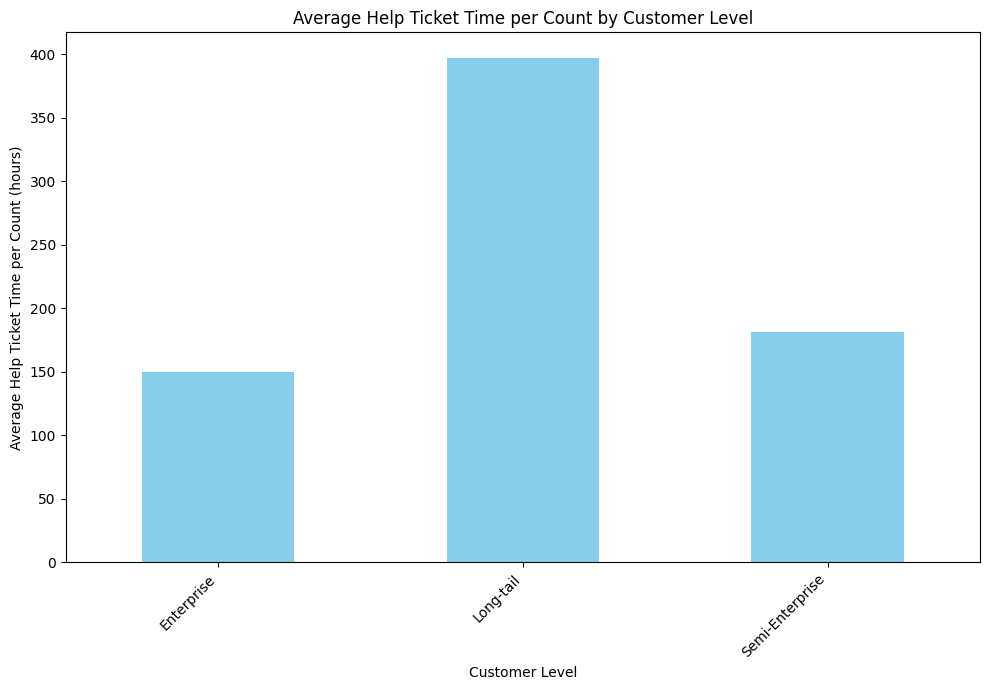

In [130]:
status_avg_time = merged_df.groupby('Customer Level')['Average Help Ticket Time per Count'].mean()

status_avg_time.plot(kind='bar', color='skyblue', figsize=(10,7))

plt.title('Average Help Ticket Time per Count by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Average Help Ticket Time per Count (hours)')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

✅Using bar graph, the distributions of Average Help Ticket Time per Count are found over the customer level categories.

**Key Observations:**

* For long-tail level the time needed to fix the help tickets are much larger than other status.
* Help ticket resolution times are almost twice as long for long tail as for rest.

**CONCLUSION / PROOF**

🚨 Slower resolution of help tickets means worse service. The worse service received by customers in the long tail level, as expected in our previous analysis, explains the churn in this category.

***Newsletter & Status - Level***

Now, we will examine the relationship between newsletter sent and status / customer level in order to find some proofs.

In [131]:
merged_df1 = pd.merge(StatusLevel, Newsletter[['Customer ID', 'Company Newsletter Interaction Count']], on='Customer ID', how='inner')

merged_df1.head()

Customer ID    Status   Customer Level  \
0  CRM-1470950  Retained       Enterprise   
1  CRM-1526100  Retained  Semi-Enterprise   
2  CRM-1507900     Churn        Long-tail   
3   CRM-355050  Retained       Enterprise   
4   CRM-157900     Churn        Long-tail   

   Company Newsletter Interaction Count  
0                                     3  
1                                     2  
2                                     1  
3                                     5  
4                                     6

In [132]:
len(merged_df1)

251

We merged the Status_Level file with the newseletter interaction file to be able to analyze and examine specifically and better. This time we have a lot of loss of data but still the analysis may give information which is less accurate.

In [133]:
status_counts = merged_df1['Status'].value_counts()
print(status_counts)

Status
Retained           176
Onboarding          42
Churn               32
Incomplete Deal      1
Name: count, dtype: int64


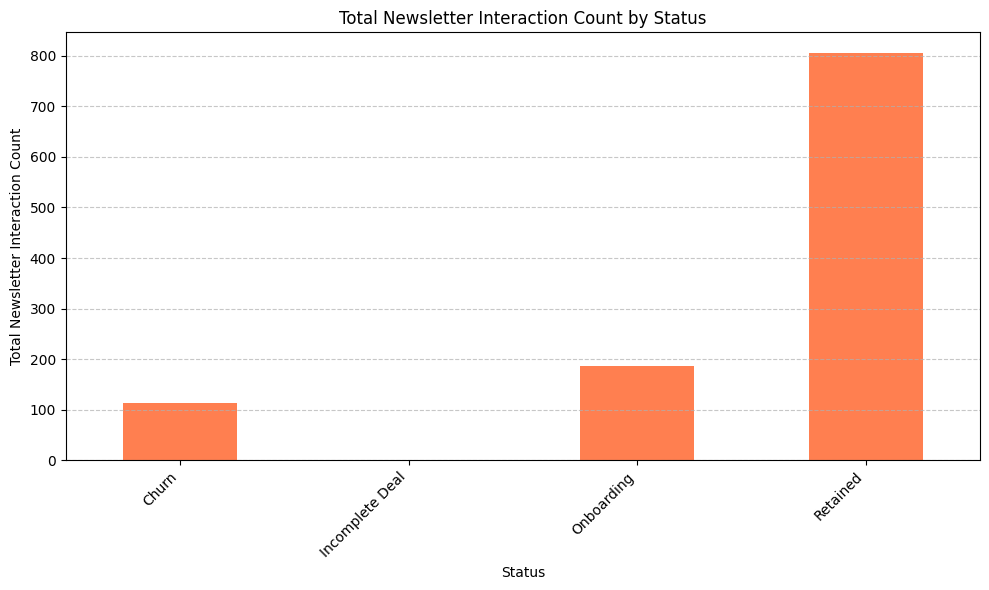

In [134]:
status_newsletter_interaction = merged_df1.groupby('Status')['Company Newsletter Interaction Count'].sum()

status_newsletter_interaction.plot(kind='bar', color='coral', figsize=(10,6))

plt.title('Total Newsletter Interaction Count by Status')
plt.xlabel('Status')
plt.ylabel('Total Newsletter Interaction Count')
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

plt.show()

✅ By creating bar graph, we visualized the distirbution of the newsletter interactions among the status categories.

**Key Findings:**

* For incomplete deals we can say that there is no newsletter interaction.
* For retained Status level most of the interactions are collected.
* There are many more interactions in the retained category compared to churn.

**CONCLUSION / PROOF:**

🚨 The more newsletter interaction a platform has, the better service it provides to that group. In this context, the churned category receives much less service than the retained category, resulting in a lot of loss of customers.

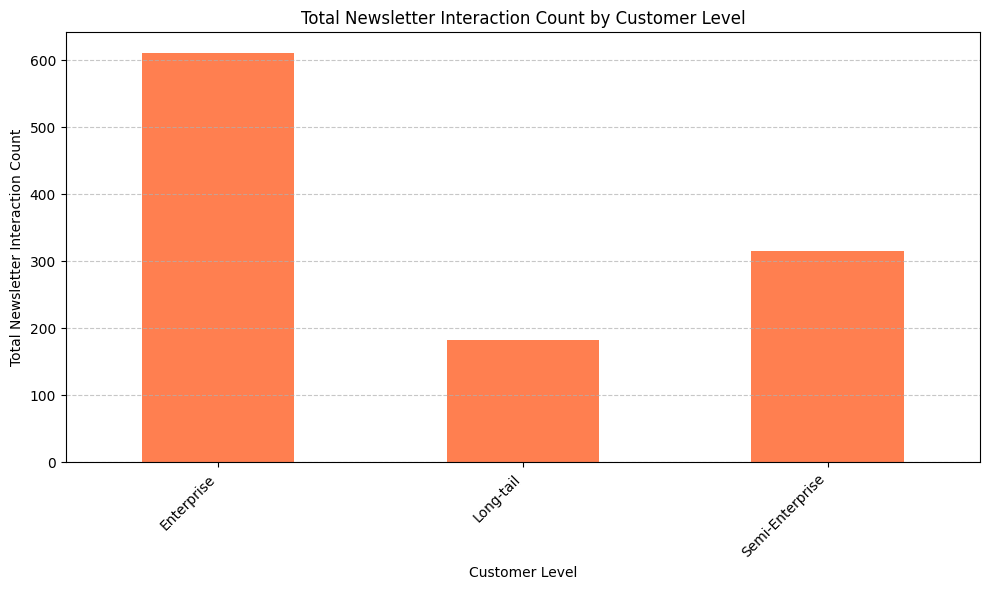

In [135]:
status_newsletter_interaction = merged_df1.groupby('Customer Level')['Company Newsletter Interaction Count'].sum()

status_newsletter_interaction.plot(kind='bar', color='coral', figsize=(10,6))

plt.title('Total Newsletter Interaction Count by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Total Newsletter Interaction Count')
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

plt.show()

✅ By creating bar graph, we visualized the distirbution of the newsletter interactions among the customer level categories.

**Key Findings:**

* Enterprise customers dominates over rest of the levels in terms of newsletter interaction counts.
* For long-tail level there is only a few interaction

**CONCLUSION / PROOF:**

🚨 A platform with less newsletter interaction indicates that it provides worse service to that group. In this context, the long-tail category receives much less service than the enterprise category, which results in more customer loss. This data is also consistent with the expectation I obtained from the previous analysis. But, do not forget that the loss of data for this merged data set is a lot so its accuracy is not high.

***Product Bug Task & Status / Customer Level***

At this point, as a last step we will examine the relationship between product bug tas and status / customer level.

In [136]:
merged_df2 = pd.merge(StatusLevel, Bug[['Customer ID', 'Product Bug Task Count']], on='Customer ID', how='inner')

merged_df2.head()

Customer ID      Status Customer Level  Product Bug Task Count
0  CRM-1516050  Onboarding      Long-tail                     109
1  CRM-1516050  Onboarding      Long-tail                     112
2  CRM-1470950    Retained     Enterprise                     160
3  CRM-1470950    Retained     Enterprise                     191
4  CRM-1470950    Retained     Enterprise                     119

In [137]:
len(merged_df2)

1950

We merged the product bug task file and the status_level file to get a common file which consists needed columns. The loss of data is very low so the results of this analysis step is more important.

In [138]:
status_counts = merged_df2['Status'].value_counts()
print(status_counts)


Status
Retained      1818
Churn          114
Onboarding      18
Name: count, dtype: int64


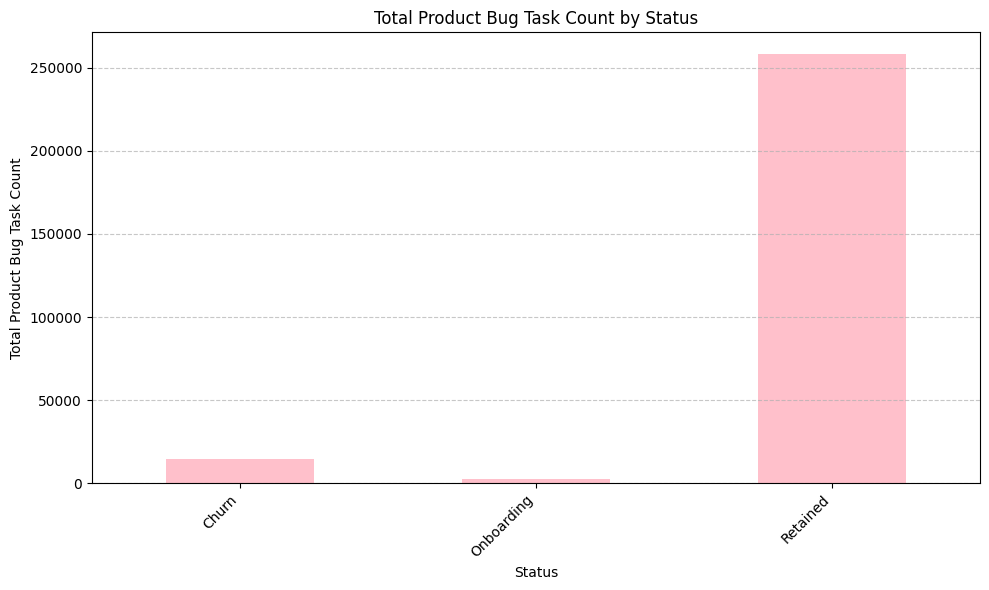

In [139]:
product = merged_df2.groupby('Status')['Product Bug Task Count'].sum()

product.plot(kind='bar', color='pink', figsize=(10,6))

plt.title('Total Product Bug Task Count by Status')
plt.xlabel('Status')
plt.ylabel('Total Product Bug Task Count')
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

plt.show()

✅ By creating bar graph, we visualized the distirbution of product bug task counts among the status categories.

**Key Findings:**

* Retained status have much more product bug task count than the churn ones. Around more than 10 times.

**CONCLUSION / PROOF:**

* There may be several situations:
   * Churn customers may be abandoning the product directly instead of complaining or reporting a bug, even if they have problems with the product.
   * Retained customers may receive better support, so there may be more error reports.
   * Churn customers may have left rather than reported issues in the past because they did not receive adequate support.
* If we analyze the previous findings by combining the evidence rather than making a definitive conclusion, it seems more likely that the service provided to retained customers is better than to churn customers in this scenario.

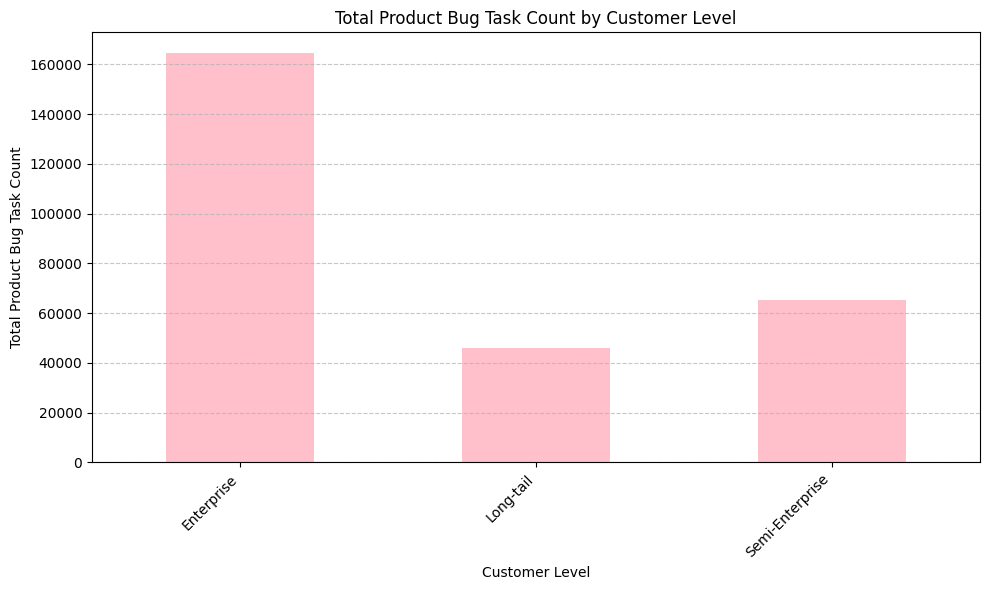

In [140]:
product = merged_df2.groupby('Customer Level')['Product Bug Task Count'].sum()

product.plot(kind='bar', color='pink', figsize=(10,6))

plt.title('Total Product Bug Task Count by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Total Product Bug Task Count')
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

plt.show()

✅ By creating bar graph, we visualized the distirbution of the product bug task counts among the customer level categories.

**Key Findings:**

* Enterprise customers dominates over rest of the levels in terms of product bug task counts. Enterprise is almost 4 times more than the Long-Tail customers.

**CONCLUSION / PROOF:**

🚨 There may be several scenerious:
   * Enterprise customers are large companies and use the product extensively, with different teams, and with greater use. More usage means more bug discovery and reporting.
   * Long-tail customers are typically individual users or small businesses. They may have limited interaction with the product and may stop using it rather than give feedback even if they experience a bug.

🚨 Again, considering the findings and evidence we obtained in previous analyses and possible scenarios, it can be said that long tail customers report less as a result of being exposed to fewer opportunities or worse service.

**GENERAL CONCLUSION FOR STATUS - CUSTOMER LEVEL ANALYSIS:**

🚨 Analyzing the status and customer level data within itself initially created several possible scenarios and expectations in our minds. As a result, we were able to effectively support the strong correlation we initially found by using evidence obtained from comparisons with other datasets.

## Should We Consider Differently About The Turkish Customers Because Of Their High Users Percentage? ##

We observed that Turkish people has highest percentage on our users,but are they actually that important to consider differently about them, we will ask those questions independently:

* Are Turkish customers really using our platform often?

* Does they affect enormously our economy?

* Are they satisfied with our platform?

* What are we going to do for Turkish customers if they have really big impact on our company?

First of all lets remember their high users capacity with pie chart.

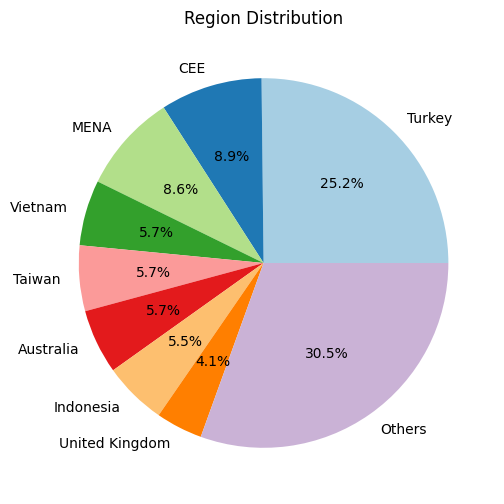

In [141]:
cc = RegionVertical['Region'].value_counts()  

total_count = cc.sum()
percentages = (cc/ total_count) * 100


threshold = 4
large_countries = cc[percentages >= threshold] 
small_countries = cc[percentages < threshold]   


others_total = small_countries.sum()
others= pd.Series({'Others': others_total})

final_counts = pd.concat([large_countries, others])

plt.figure(figsize=(8, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Region Distribution")
plt.show()

As you can observe,Turkey has highest solo percentage and it has a lead of nearly %16.3 over his closest competitor.Therfore we should dig more in our Turkish customers.

**Are They Really Our Active Users?**

We will analyze their:

* frequency
* Whether they answered our surveys or not (ekleyedebiliriz çıkaradabiliriz.)
* Newsletter Interaction Count

In [142]:
mergedr  = Survey.merge(RegionVertical,on = "Customer ID",how = "inner")
mapping = {"Once a Day" : 30, "Once a Week": 12,"Once a Month" : 2}
mergedr["frequency"] = mergedr["How frequently are you using our platform"].map(mapping)
turkish = mergedr[mergedr["Region"] == "Turkey"]
turkish.head()

Customer ID  Year  Quarter Survey Date Response Date  \
48  CRM-355050  2022        2  2022-04-01    2022-04-12   
49  CRM-355050  2022        3  2022-07-01    2022-09-20   
53  CRM-156400  2022        2  2022-04-01    2022-05-20   
54  CRM-165900  2022        1  2022-01-01    2022-02-01   
55  CRM-165900  2022        1  2022-01-01    2022-03-28   

    How likely are you to recommend insider to a friend or colleague   \
48                                                  5                   
49                                                  7                   
53                                                  9                   
54                                                 10                   
55                                                 10                   

    How would you rate the value you gain from our company  \
48                                                  4        
49                                                  3        
53                                                  5        
54                                                  3        
55                                                  5        

   How frequently are you using our platform  \
48                                Once a Day   
49                                Once a Day   
53                                Once a Day   
54                                Once a Day   
55                               Once a Week   

    Please rate the overall quality of our products  \
48                                                4   
49                                                3   
53                                                5   
54                                                5   
55                                                5   

    Please rate the usability of the panel  \
48                                     4.0   
49                                     4.0   
53                                     4.0   
54                                     4.0   
55                                     4.0   

   Please rate your understanding of our reporting capabilities in the panel  \
48  I can pull all the numbers, but don't understa...                          
49       I tried but could not find everything I need                          
53  I need someone from Insider team to provide me...                          
54  I need someone from Insider team to provide me...                          
55  I need someone from Insider team to provide me...                          

    response delay  Region Vertical       Subvertical  frequency  
48              11  Turkey   Retail  Fashion Retailer         30  
49              81  Turkey   Retail  Fashion Retailer         30  
53              49  Turkey   Retail  Fashion Retailer         30  
54              31  Turkey   Retail  Fashion Retailer         30  
55              86  Turkey   Retail  Fashion Retailer         12

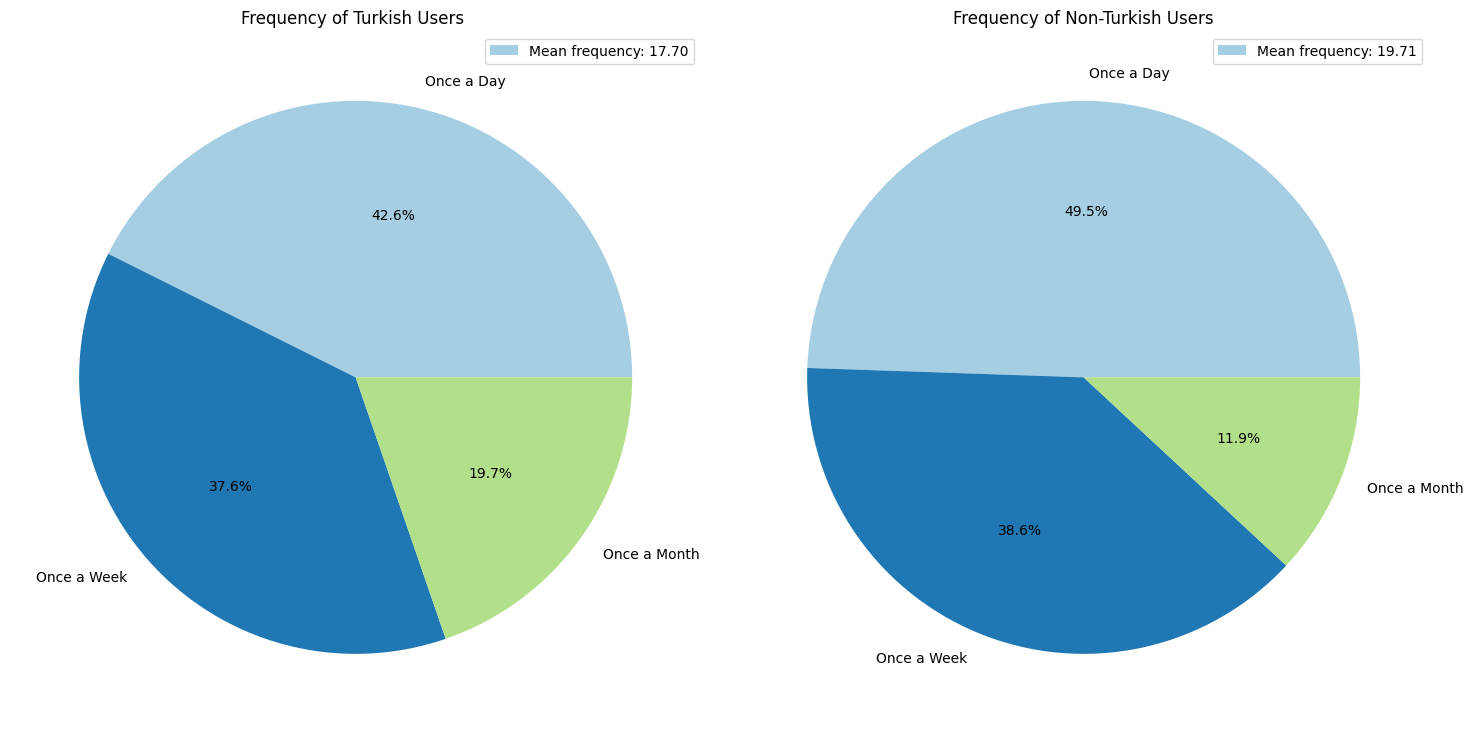

In [143]:
nont=mergedr[mergedr["Region"] != "Turkey"]


fig, axes = plt.subplots(1, 2, figsize=(15, 12))
turkish["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=plt.cm.Paired.colors, ax=axes[0]
)
axes[0].set_title("Frequency of Turkish Users ")
axes[0].set_ylabel("") 
axes[0].legend(["Mean frequency: " + "{:.2f}".format(turkish["frequency"].mean())])
nont["How frequently are you using our platform"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=plt.cm.Paired.colors, ax=axes[1]
)
axes[1].set_title("Frequency of Non-Turkish Users")
axes[1].set_ylabel("") 
axes[1].legend(["Mean frequency: " + "{:.2f}".format(nont["frequency"].mean())])

plt.tight_layout()
plt.show()

**Observations:**

* Turkish users are not active than rest of the region users and difference between turkish and non-turkish users' Once a day value is nearly 7 percent this difference is closed under directly Once a Month's graph.

* We calculated mean value of the frequency by assuming that:

   * Once a day -> 30(monthly)

   * Once a week -> 12(monthly)(because once a week may include twice a week or three a week)

   * Once a Month -> 2(monthly)(because people may think 1 or 2 as a once a month)

**Therefore we observed that Turkish users are averagely 2 day less active per month which is a significant lose.**

* Once a week values' count is nearly same with other regions so that our main focus should be the turkish users who use least our platform(once a month).

* After the analysis of their effects on our economy we should examine deeper for especially the behaviors of %19.7 turkish users.

**Turkish Users' Economic Affect on our platform.**

First of all we can directly go MRR and Revenue values for the turkish users.

* To get more trustable answers we need to leave outliers from MRR and Revenue values.

In [144]:
Revenue.head()

Customer ID  Total Revenue
0  CRM-1470950       732199.0
1  CRM-1526100            0.0
2  CRM-1506400       375135.0
3  CRM-1430550            0.0
4  CRM-1485600       116732.0

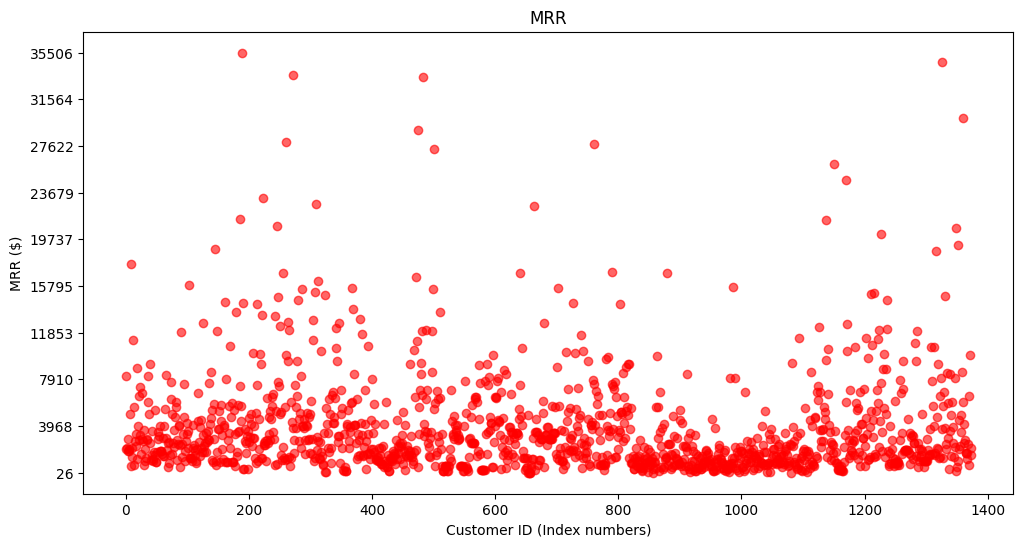

In [145]:
Revenue2 = Revenue[Revenue["Total Revenue"]<= 500000000]
MRR2 = MRR[MRR["MRR"] <= 40000]


plt.figure(figsize = (12,6))
plt.scatter(range(len(MRR2["Customer ID"])),MRR2["MRR"],color ="red",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("MRR ($)")
plt.title("MRR")
y_min = MRR2["MRR"].min()
y_max = MRR2["MRR"].max()
plt.yticks(np.linspace(y_min, y_max, num=10)) 
plt.show()

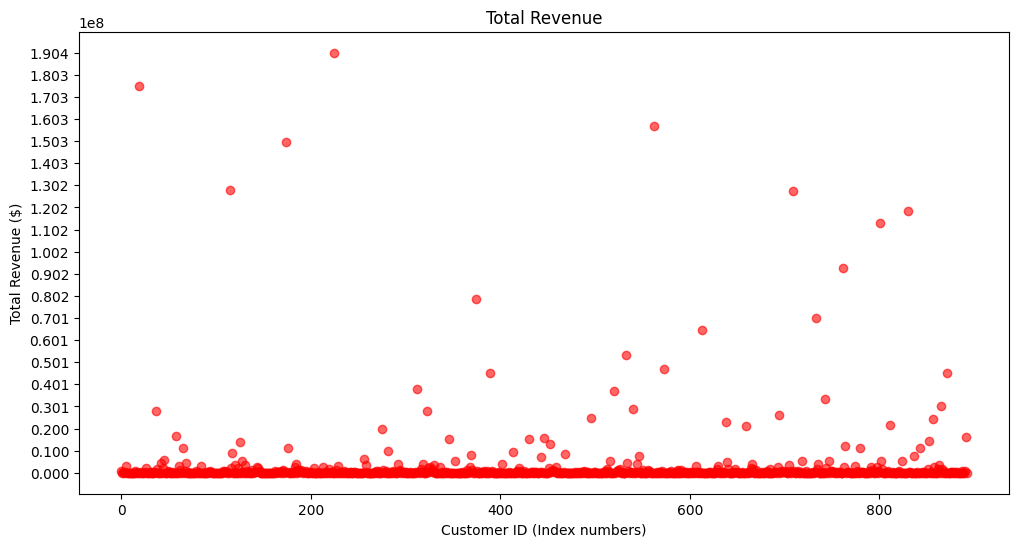

In [146]:
plt.figure(figsize = (12,6))
plt.scatter(range(len(Revenue2["Customer ID"])),Revenue2["Total Revenue"],color ="red",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue")
y_min =  Revenue2["Total Revenue"].min()
y_max = Revenue2["Total Revenue"].max()
plt.yticks(np.linspace(y_min, y_max, num=20)) 
plt.show()

**Now we can consider about the Turkish users's economy and total economy**

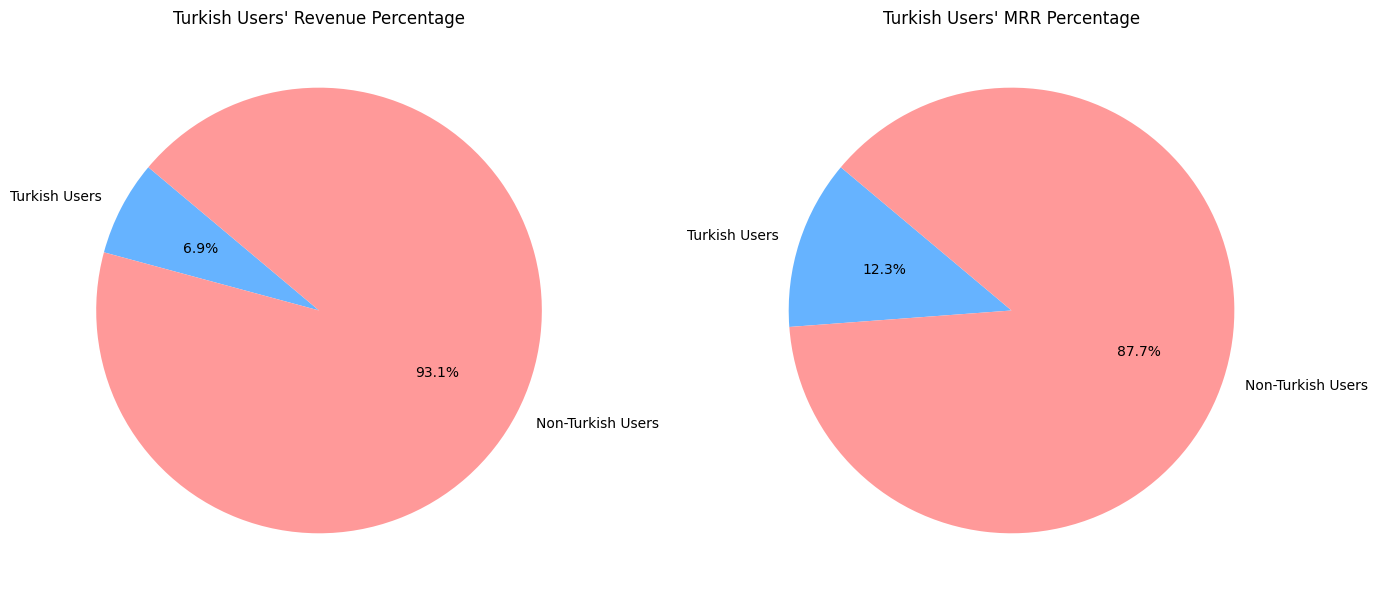

In [147]:
RST = turkish.merge(Revenue2,on = "Customer ID",how = "inner")
RS = mergedr.merge(Revenue2,on = "Customer ID",how = "inner")
MST = turkish.merge(MRR2,on = "Customer ID",how = "inner")
MS = Survey.merge(MRR2,on = "Customer ID",how = "inner")
total_revenue = RS["Total Revenue"].sum()
turkish_revenue = RST["Total Revenue"].sum()

total_mrr = MS["MRR"].sum()
turkish_mrr = MST["MRR"].sum()


revenue_data = [turkish_revenue, total_revenue - turkish_revenue]
mrr_data = [turkish_mrr, total_mrr - turkish_mrr]

labels = ["Turkish Users", "Non-Turkish Users"]
colors = ["#66b3ff", "#ff9999"]


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].pie(revenue_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title("Turkish Users' Revenue Percentage")


axes[1].pie(mrr_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Turkish Users' MRR Percentage")

plt.tight_layout()
plt.show()

**We can easily see that Turkish users for especially on creating revenue are very weak ,but to be more precise let's analyze them excluding some high revenue and high MRR customers.**

In [148]:
Revenue3 = Revenue[Revenue["Total Revenue"]<= 50000000]
MRR3 = MRR[MRR["MRR"] <= 20000]

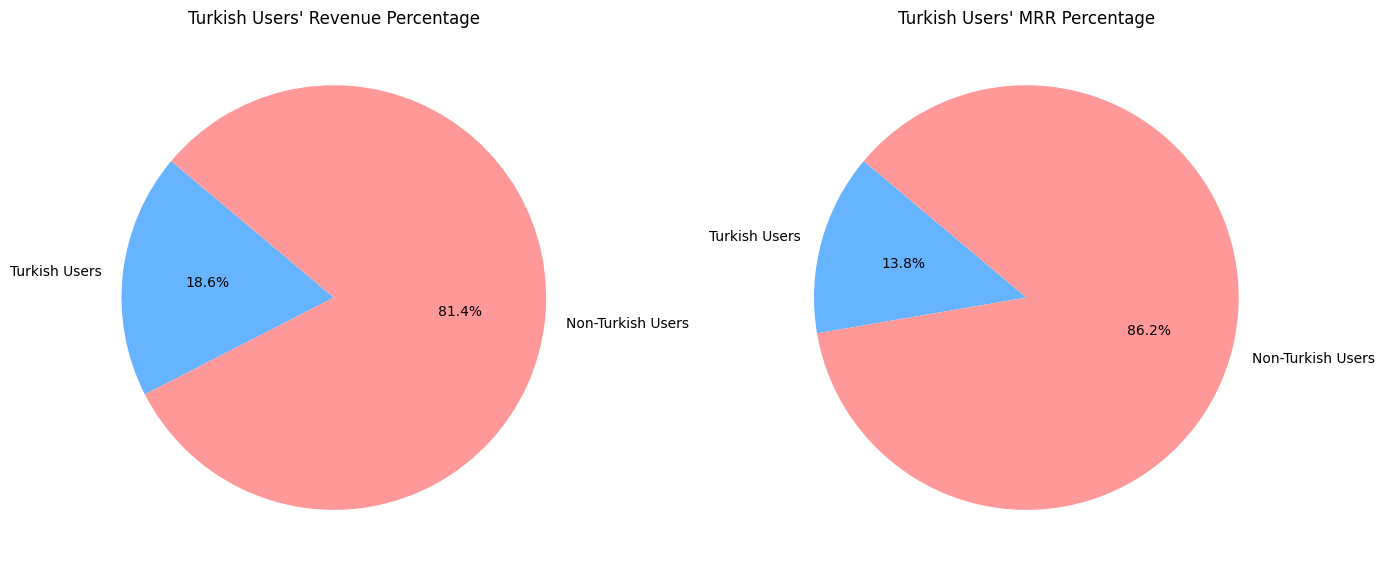

In [149]:
RST = turkish.merge(Revenue3,on = "Customer ID",how = "inner")
RS = mergedr.merge(Revenue3,on = "Customer ID",how = "inner")
MST = turkish.merge(MRR3,on = "Customer ID",how = "inner")
MS = Survey.merge(MRR3,on = "Customer ID",how = "inner")
total_revenue = RS["Total Revenue"].sum()
turkish_revenue = RST["Total Revenue"].sum()

total_mrr = MS["MRR"].sum()
turkish_mrr = MST["MRR"].sum()


revenue_data = [turkish_revenue, total_revenue - turkish_revenue]
mrr_data = [turkish_mrr, total_mrr - turkish_mrr]

labels = ["Turkish Users", "Non-Turkish Users"]
colors = ["#66b3ff", "#ff9999"]


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].pie(revenue_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title("Turkish Users' Revenue Percentage")


axes[1].pie(mrr_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Turkish Users' MRR Percentage")

plt.tight_layout()
plt.show()

**By excluding some customers that gained high revenue we get more turkish customers in the economy but still if we compare these percentage with the number of turkish users(%25) is significantly low.**

**Turkish Users' economic impact is low relative to the number of users.**

**Now Let's Check whether Turkish users are interested in our surveys.To do this we will calculate Turkish Customers' survey answer count then proportion to the whole.**

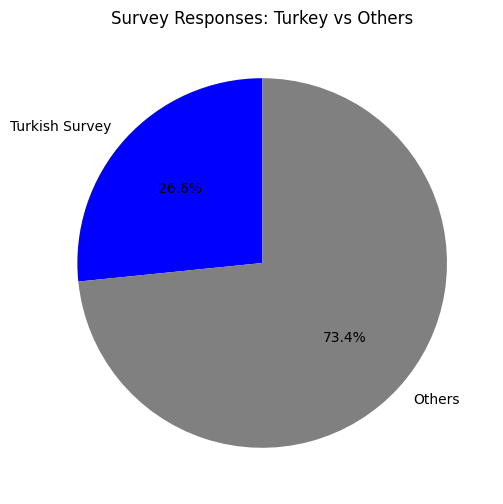

In [150]:
turkish_count = turkish.shape[0]
other_count = nont.shape[0]


labels = ['Turkish Survey', 'Others']
values = [turkish_count, other_count]


plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'gray'])
plt.title("Survey Responses: Turkey vs Others")
plt.show()

**This proportion is nearly same as the number of users in Turkey to whole, so that we cannot make any comment by using survey results in this context.Actually we can say Turkish users are more interested in comparing to their numbers in proportion bu it is negligble amount.**

**Now we can go deeper on the turkish customers which uses our app once a month.**

In [151]:
target = turkish[turkish["How frequently are you using our platform"] == "Once a Month"]
len(target)

99

99 turkish people use our app once a month which is not good frequency in terms of other region users.Therefore we may check firstly our Newsletter count which interacted with those people.

In [152]:
target = target.merge(Newsletter,on = "Customer ID",how = "inner")
target.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-690000  2022        1  2022-01-01    2022-02-01   
1  CRM-690000  2022        2  2022-04-01    2022-06-17   
2  CRM-690000  2022        3  2022-07-01    2022-09-06   
3  CRM-372100  2022        1  2022-01-01    2022-03-30   
4  CRM-372100  2022        3  2022-07-01    2022-07-01   

   How likely are you to recommend insider to a friend or colleague   \
0                                                  8                   
1                                                  9                   
2                                                  8                   
3                                                 10                   
4                                                 10                   

   How would you rate the value you gain from our company  \
0                                                  3        
1                                                  5        
2                                                  4        
3                                                  5        
4                                                  5        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                              Once a Month   
3                              Once a Month   
4                              Once a Month   

   Please rate the overall quality of our products  \
0                                                4   
1                                                4   
2                                                4   
3                                                5   
4                                                5   

   Please rate the usability of the panel  \
0                                     2.0   
1                                     3.0   
2                                     3.0   
3                                     5.0   
4                                     5.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0              I am able to report everything easily                          
1              I am able to report everything easily                          
2              I am able to report everything easily                          
3              I am able to report everything easily                          
4  I can pull all the numbers, but don't understa...                          

   response delay  Region    Vertical Subvertical  frequency  \
0              31  Turkey  Automotive  Automotive          2   
1              77  Turkey  Automotive  Automotive          2   
2              67  Turkey  Automotive  Automotive          2   
3              88  Turkey  Automotive  Automotive          2   
4               0  Turkey  Automotive  Automotive          2   

   Company Newsletter Interaction Count  
0                                     1  
1                                     1  
2                                     1  
3                                    13  
4                                    13

In [153]:
len(target)

43

We can think 56 customers didn't even a interact with a single company newsletter ,which shows us something and now let's look at the customers who take newsletter.

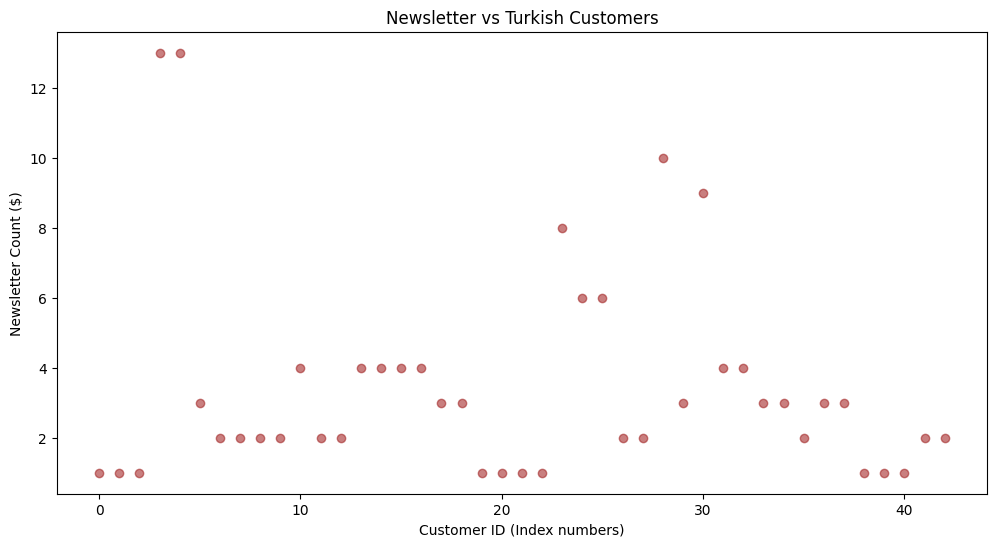

In [154]:
plt.figure(figsize = (12,6))
plt.scatter(range(len(target["Customer ID"])),target["Company Newsletter Interaction Count"],color ="brown",alpha = 0.6)
plt.xlabel("Customer ID (Index numbers)")
plt.ylabel("Newsletter Count ($)")
plt.title("Newsletter vs Turkish Customers")

plt.show()

In [155]:
target["Company Newsletter Interaction Count"].mean()

3.4651162790697674

**We can easily observe that most of the our target customers didn't interact with even 6 newsletter so we can conclude that:**

* As we expected Turkish customers who use platform once a month didn't interact our newsletter ,but the number is significantly low (3.47),even less than general users' average(4.41).

* Therefore we may think about some new newsletters for special to turkish people which is integrated with turkish culture.

* We didn't even make turkish people noticed that our platform sent you newsletter, maybe by using social media etc. we can create and announce our special campaigns to turkish people,I think it is better than just sending newsletters.

**Satisfaction of Turkish Customers from our platform.**

Firstly we will analyze their answers to our surveys.

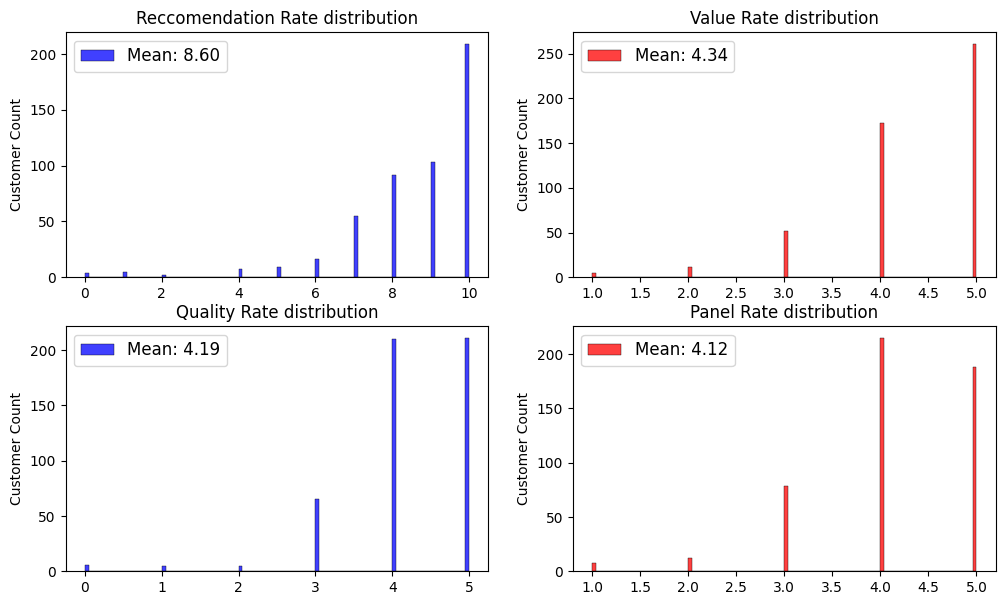

In [156]:
fig,axes = plt.subplots(2,2,figsize = (12,7))
sns.histplot(turkish["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Reccomendation Rate distribution")
mean_value1 = turkish["How likely are you to recommend insider to a friend or colleague "].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)


sns.histplot(turkish["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Value Rate distribution")
mean_value2 = turkish["How would you rate the value you gain from our company"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(turkish["Please rate the overall quality of our products"], bins=100, kde=False, color="blue",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Quality Rate distribution")
mean_value3 = turkish["Please rate the overall quality of our products"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(turkish["Please rate the usability of the panel"], bins=100, kde=False, color="red",ax = axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Panel Rate distribution")
mean_value4 = turkish["Please rate the usability of the panel"].mean()
axes[1,1].legend([f"Mean: {mean_value4:.2f}"], loc="upper left", fontsize=12, frameon=True)



plt.show()

**Interestingly Turkish Customers are more satisfied in terms of survey results than general customers we can conclude it by looking at meaning values ,but now let's check our target customers' survey data.**

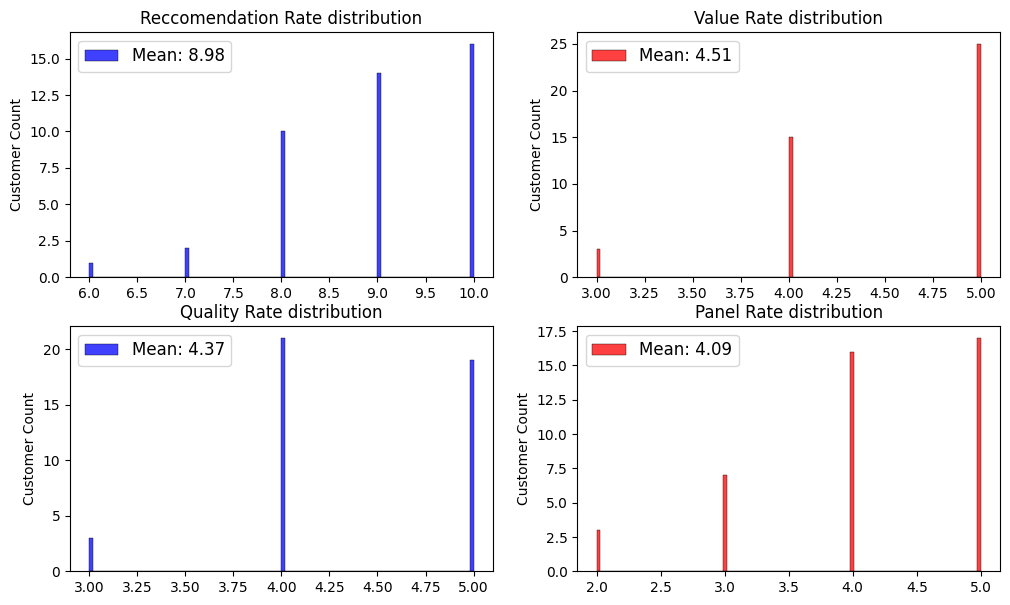

In [157]:
fig,axes = plt.subplots(2,2,figsize = (12,7))
sns.histplot(target["How likely are you to recommend insider to a friend or colleague "], bins=100, kde=False, color="blue",ax = axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Customer Count")
axes[0,0].set_title("Reccomendation Rate distribution")
mean_value1 = target["How likely are you to recommend insider to a friend or colleague "].mean()
axes[0,0].legend([f"Mean: {mean_value1:.2f}"], loc="upper left", fontsize=12, frameon=True)


sns.histplot(target["How would you rate the value you gain from our company"], bins=100, kde=False, color="red",ax = axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Customer Count")
axes[0,1].set_title("Value Rate distribution")
mean_value2 = target["How would you rate the value you gain from our company"].mean()
axes[0,1].legend([f"Mean: {mean_value2:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(target["Please rate the overall quality of our products"], bins=100, kde=False, color="blue",ax = axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Customer Count")
axes[1,0].set_title("Quality Rate distribution")
mean_value3 = target["Please rate the overall quality of our products"].mean()
axes[1,0].legend([f"Mean: {mean_value3:.2f}"], loc="upper left", fontsize=12, frameon=True)

sns.histplot(target["Please rate the usability of the panel"], bins=100, kde=False, color="red",ax = axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Customer Count")
axes[1,1].set_title("Panel Rate distribution")
mean_value4 = target["Please rate the usability of the panel"].mean()
axes[1,1].legend([f"Mean: {mean_value4:.2f}"], loc="upper left", fontsize=12, frameon=True)



plt.show()

Very Interestingly our target (turkish and who don't use our platform rarely ) customers are very satisfied with the platform it can be inferred differently lets create general overview on Final conclusion part.

**Our Final Conclusions About the Question:**
✅As we suspected The number of turkish users doesn't show directly they are really active users of the platform.Many of them use the platform once a month which is very rare.

⚠️Their economic contribution to both our platform and them too low with respect to their user capacity.

✅As we expected Turkish customers who use our platform once a month interact with our newsletter very little.

🙂‍↕️ Very interestingly turkish users are very satisfied with the platform ,and even more interestingly our target customers are more satisfied than general turkish users ,but which can be interpreted as two situation:

😟Maybe our target customers doesn't really care our surveys since they use our platform only once a month ,then their answers may misguide us.

😀They just love our platform ,but they cannot find any work in our platform that spend their time.

**Recommendations:**

* We should attract turkish people more.To do this, we should organize some activities,campaigns including turkish culture because user of turkish customers is not a negligible amount.

* We should make advertisements including some of our economic features for example,transaction simplicity,gaining revenue source,discount etc... to the turkish people especially because their activity on economy is too low and we just dont use these number of users' economic power efficently.

* We need to create new techniques rather than newsletter interaction it is kinda general problem but in the perspective of turkish users it is really big problem because we just cannot reach many of the turkish users we should make some targeted to turkish people campaigns and we should annonce them on social media etc.

* Reason of the problem that Turkish users use less than general users is not our platform system because they are more satisfied than general users, so it is because mostly our connection, interaction problem with Turkish customers.As I said above we need to really solve this connection problem.

----

# 🔑 KEY TAKEAWAYS AND RECOMMENDATIONS 🔑 #

## 📧The Engagement Rate Of Newsletters With Customers Is Significantly Low, With An Average Of Only 4.41, Which Is A Highly Unsatisfactory Figure. ##

Moreover as we observed number of customers whose status is churn is very high and one of the main reasons of this high number may be scarcity of newsletter's interaction count averagely.This situation should be avoided immediately ,because this weaken the connection between company and customers which can result in disastrous lose of customers in the future.

**Recommendations:**

📱 We need to find new techniques to announce our activations ,for example we can use social media ,but first of all we need to enlarge our company accounts on social media to do this maybe we can work with some specialist on social media.

⚠️ Sending a lot of newsletter's means nothing as you can see, so that we may decrease quantity of newsletter and increase the quality which means we should think hard about our interaction techniques more.We may add some effective visualizations or sent newsletters with a striking title to make customers more curious about the newsletter.

⬇️ We may add some discount codes in our newsletters, this technique certainly will increase our interaction with the customers.Moreover it doesn't need to high volume discounts ,even %10 discount code on the newsletter will attract the customers' attention.

## 🔴⚪Turkish Users Spend Significantly Less Time On This Application Relative To Their Numbers And Contribute To A Much Smaller Portion Of The Economy. ##

Our Turkish users constitute a remarkably high percentage, around 25%, and have outperformed their closest competitors by a significant margin. However, their engagement with the application—both in terms of time spent and financial contribution—remains lower compared to the overall user base. We must place extra emphasis on Turkish users, as we are not efficiently leveraging their economic potential relative to their numbers.

**Recommendations:**

🔴⚪ We should offer exclusive campaigns for Turkish users and promote them with specially designed banners in red and white colors to resonate with them.

🗣️ We should collaborate with the most trusted and beloved Turkish celebrities through endorsement deals and emphasize the platform's security and ease of use in these advertisements.

🍬 We should celebrate their religious and national holidays by offering special discounts and gifts on these occasions."

## 💰There Is A Significant Correlation Between Mrr And User Engagement With The Application. ##

We can observe the correlation between MRR and user engagement through the relationship between MRR and factors such as usage frequency, help ticket count, and newsletter interaction. At this point, by separately analyzing both high-MRR and low-MRR users and taking targeted actions, we can leverage this correlation to our advantage.

**Recommendations :**

🎇 We should leverage the strong engagement of high-MRR users by setting an MRR threshold and offering exclusive benefits and conveniences to those who exceed this limit, as they form the core of our economy. For example, we can negotiate partnerships with select brands to create special campaigns for users with an MRR above $5,000."

📈 For users with relatively lower MRR, we can encourage greater participation in our economy by offering special commission discounts, waiving shipping fees, or providing cashback opportunities on certain transactions."

## 📈Our Customers Mostly Loves Risky Projects.📉

The majority of our customers operate in enterprise roles, which indicates that they are typically involved in larger and riskier ventures. Such individuals hold a critical position for companies like ours because when they succeed, we gain significantly, while their losses do not directly translate into substantial losses for us. Therefore, we should take strategic actions to support them.

Additionally, the number of customers in long-tail roles is also considerable. These individuals tend to focus on high-volume transactions, and any increase in their potential sales volume can generate significant returns for our company. We should also consider specific actions tailored to this customer segment.

**Recommendations:**

💂 We need to create a sense of security for our enterprise-level customers by providing certain insurance options and partially sharing their risk. Since their success translates into our success, we should establish a protective coverage system that offers support in case of losses, preventing them from going bankrupt.

💰 At the same time, we should gradually increase our profit-sharing percentages. However, sudden and significant increases might push these customers toward competing platforms, so we should start with smaller percentage adjustments to maintain their trust and engagement.

🏷️ For our long-tail customers, we should offer product-specific advantages. For example, we can slightly reduce the percentage of our profit share from their earnings. However, this discount must be marketed aggressively to encourage these high-volume sellers to increase their investments and product inventory, ensuring a more stable and fluid platform economy.

🚛 Additionally, for products sold by these customers that exceed a certain price threshold, we should waive shipping fees to boost the sales volume of higher-value items.

💰 In short, by adopting a similar economic model to the one embraced by these two major user segments, we can establish a more linear and sustainable revenue strategy

## ⚠️ Our Platform Is Prone To Losing Customers ⚠️ ##

When examining the Status and Customer Level data, the first observation is that the large number of customers we have, almost half of all customers, tend to leave the platform for various possible reasons. The fact that the highest proportion of retained customers comes after churning customers is one of the promising factors that keeps this platform alive. However, having so many churning customers poses a significant risk for the future of the platform. Therefore, taking the necessary precautions is of vital importance both in the short term and in the long term.

The most effective factors in the formation of this customer loss trend are the unequal distribution of the services offered among the status groups, as a result of the analysis conducted.

Also, the fact that a large number of enterprise customers are retained is a very good indicator, but the other large part is in the churned category. It is also important to be able to convert these large-scale and long-term customers/companies from churn to retained.

*Recommendations:*
* 🚀 In the analysis, it is seen that churn customers send very few product bug tasks. In this case, one of the most effective solutions would be to encourage more bug reporting against this group. In the short term, it would make a significant difference if priority was given to churn customers in the solutions of the bug reports sent.
* 🚀 When newsletter interactions are examined, the fact that there is very little interaction with churn customers suggests that the importance given to these customers is insufficient. Therefore, if this interaction with churn customers is increased first, the service provided will be increased.
* 🚀 In addition, when comparing the average resolution times of the help tickets sent, it is seen that the tickets sent by churn customers are resolved in much longer times. For this reason, giving priority to churn customers in the first place and increasing the speed of the service provided will make a difference. In addition, the rapid resolution of these help tickets can also help increase the reports sent for the product bug task.
* 🚀 If the changes presented above for churn customers are also applied to long-tail level customers, it can be expected that they will develop at the same rate. Because the relationship and the factors that cause it are present at the same rate between enterprise&long-tail and churn-retained.
* 🚀 However, it is important to emphasize that the changes made should be made by taking the churn-retained category into consideration in the first place. Because it was seen that there was a much greater difference in this group than in the other.

## 📈 Our Help Ticket Lead Time And Count Are Extremely Large 📈 ##

When the help ticket data is examined, the results obtained do not exhibit any proportion. In fact, the expected result is expected to be directly proportional when the extreme points are ignored. However, it was observed that very large values were obtained in terms of both count and solving time. As a result, it is seen that people need a lot of help while using the platform and they solve this help late.

When we look at the extreme points in this data, it is seen that there are too many extreme points. In addition, the fact that these extreme points are very high shows that it is vital to take precautions in terms of help tickets on our platform.

Another important point is that the analysis of the help ticket data showed that the panel usability results in the survey may be far from reality. Because there are such extreme points, another thing to consider is that users give more than 4 out of 5 to the panel usability in the survey.

In addition, their reporting of these using the panel was lower compared to other survey results. When we examined this data, it made us think that some simplifications should be made on our platform or the help provided should be increased.

*Reccomendations:*

* 📝 First of all, in order to obtain more realistic results, presenting the panel usability question in the survey as a separate survey to the users would be a good start for a more realistic analysis of the help ticket data.
* ❎ To replace the need for so much help, we can simplify the use of the platform. By simplifying, we can create the potential for users to make fewer errors, which can reduce the number of help tickets sent.
* ❓ If we enrich the frequently asked questions section, when help is needed, there will be a quick solution for simple problems at first.
* 🆙 We can increase our investment in helping by increasing the number of support staff. Because our biggest shortcomings are in this helping area.

## 📉 We Have A Steady Deterioration Trend In 2022 📉 ##

When the survey data for 2022 is examined, a steady, albeit small, decline is seen between the quarters. While it can be considered normal for the number of users to initially decrease these scores as we move to the last quarter, the fact that the number of users was almost equal between the first two quarters but the ratings obtained were decreasing created a bad impression for our platform in 2022.

In fact, the fact that the declines obtained are very small is true, but while these decreases are small in the short term, the continuation of this downward trend will create major problems in the long term.

In addition, when the customers participating in the survey are examined, when we look at those with unique customer IDs, we have approximately 200 - 300 unique customers for each quarter, which is very few when compared to our total customer number.

In short, while there are no major problems that will cause concern in the short term, it is vital to take precautions for the long term.

*Recommendations:*

* 📈 In order to increase the number of survey participants as much as possible, the presence of incentive rewards for customers both increases the number of survey participants and increases the reliability of the findings we obtain as a result of the analysis of the survey data.
* 📊 The fact that the same customer gives more than one answer in the same quarter and these answers are different from each other causes confusion in the analysis process. In order to prevent this, conducting smaller scale surveys within quarters is a good step to obtain more accurate results.
* 🍀 In general, almost all of the survey results seem positive. In the scales made, 80% - 85% satisfaction was achieved. Therefore, the policies obtained should be continued and only minor improvements should be made to prevent the very small decline.

## 💸 Some Improvements Can Be Made Financially 💸 ##

When the MRR and Total Revenue datasets were analyzed, the first thing that was noticeable was that there was no direct relationship between them. Both showed a random spread which is not expected.

It was also found that there were too many outlier/extreme values in this data, and what was more interesting was that these extreme values were very high. In addition, it was found that there were too many users for Total Revnue, around 150 - 200, who do not earn money via platform.

After outlier detection was performed and these extreme values were eliminated, the remaining dataset was reanalyzed and a moderate correlation was detected after some amount of MRR and Total Revenue. We obtained the expected result as a result of these operations, but the high number of these extreme values may cause problems when making an evaluation for all users in general.

When we look at the average values in general, we can say that there is a high difference between MRR and Total Revenue. It would not be right to say that it is a very bad value in financial terms, but it seems possible to bring it to a better financial position with the improvements that will be made.

*Recommendations:*

* ✔️ Firstly, some flexibility can be applied to users who do not have any income to avoid random distribution and extreme differences between MRR and Total Revenue. This would be a very good way to incentivize users who do not have any income.
* ❗**It is important for the platform to replicate that high-income users reach very extreme values, but these values ••greatly increase the difference with the MRR. In order to prevent this, an application such as a gradual tax system can be introduced for those who earn income after a certain amount. For example, those whose total income is more than 10^5 should pay 1.25 times the normal MRR value, and when the income level is 10^7, this multiplier should be 1.5. However, the point to be considered in this system is to find a system that will not disrupt the supply-demand balance and will make both parties happy, accompanied by a financial advisor.**
* ⚠️ Also, since the platform tends to show churn in terms of status, these people can be identified and incentives can be offered to these users for a certain period of time. For example, discounts, supports, etc. can be offered to keep these users on the platform longer.
* 🔚 Possible incentives and aids may seem difficult in the short term, but in the long term, they will take the platform to much higher levels in terms of both reputation and financial income.

----

# 🏆 CONCLUSION 🏆 #

**In this analysis, we examined nine different datasets from the company E-Corp, discovering various correlations, insights, increases, and declines. We also provided solution recommendations for these findings. Although the company is generally on a successful path, there are some issues that could affect them in the long run, such as their communication skills with customers. To address these problems, they can implement our suggested solutions or keep them as insights for future analyses.**